In [1]:
# import general packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# to manage directories and save/load data
import glob
import pickle as pkl

# import pandas to manage xls files
import pandas as pd

# import optimizer
from scipy.optimize import curve_fit

In [2]:
from rt_module import rt_data_manage as rdm

In [3]:
# create the database or load the database file 
db_folder = 'Real_time_data/Database/'
db_filename = 'LAMP_COVID'        # current or new database name
#db_filename = 'database_BstLF'

db_name = 'BstLF COVID experiments'
db_description = 'this database include experiments and analysis performed around BstLF home made production and testing on RT-LAMP COVID detection'

database = rdm.load_or_create_database(db_folder, db_filename, db_name=db_name, db_description=db_description)
    


Database " LAMP_COVID.pkl " is currently in the folder

do you want to load it? (y/n): y

Database " LAMP_COVID.pkl " was succefully loaded


In [4]:
rdm.print_list(database.list_names)

[0] wells
[1] well_sets
[2] figures
[3] components
[4] reactions
[5] enzymes


to add elements to the previous list use  `database.append_objs()`<br>
to add new list elements use `database.add_element(element, list_name)`<br>
to save or uptdate the database use `database.save()`<br>

In [5]:
## Indicated by the user:
file_type ='xlsx' 
books_folder_path  = 'Real_time_data/Raw_data/BstLF_experiments/'  #folder where databooks are stored 
files =glob.glob1(books_folder_path,"*."+file_type)

## just to display
rdm.print_list(files)

[0] BstLF_MMLV_matrix_data_R1.xlsx
[1] BstLF_MMLV_matrix_R2_data.xlsx
[2] BstLF_MMLV_matrix_R3_data.xlsx
[3] Bst_Units_1_data.xlsx
[4] Bst_Units_2_data.xlsx
[5] Bst_Units_3_data.xlsx
[6] N2_dilutions_pretest.xlsx
[7] RT-LAMP_screaning_data.xlsx


In [6]:
fnumber = 5      # put the desired number from the previous list

################################################
fname = books_folder_path + files[fnumber]

p_file = pd.read_excel(fname, sheet_name = None, index_col=None, header=None)
sheet_names = list(p_file.keys())

## just to display

print(fname+'\n')
print('Available Sheets: \n')

rdm.print_list(sheet_names)

Real_time_data/Raw_data/BstLF_experiments/Bst_Units_3_data.xlsx

Available Sheets: 

[0] Sample Setup
[1] Results
[2] Raw Data
[3] Multicomponent Data
[4] Amplification Data
[5] BioGroup Analysis Result
[6] Technical Analysis Result
[7] Melt Region Temperature Data
[8] Melt Region Normalized Data
[9] Melt Region Derivative Data


In [7]:
#enter the number of the sheet of interest
ws_number = 1

### make the assignation ##
ws_name = sheet_names[ws_number]
s_sheet = p_file[ws_name]

# display
s_sheet

0   \
0                    Block Type   
1                     Chemistry   
2          Experiment File Name   
3       Experiment Run End Time   
4               Instrument Type   
5             Passive Reference   
6                           NaN   
7                          Well   
8                            A1   
9                            A2   
10                           A3   
11                           A4   
12                           B1   
13                           B2   
14                           B3   
15                           B4   
16                           C1   
17                           C2   
18                           C3   
19                           C4   
20                           D1   
21                           D2   
22                           D3   
23                           D4   
24                           E1   
25                           E2   
26                           E3   
27                           E4   
28                           F1   
29                           F2   
30                           F3   
31                           F4   
32                           G1   
33                           G2   
34                           G3   
35                           G4   
36                           H1   
37                           H2   
38                           H3   
39                           H4   
40                          NaN   
41                Analysis Type   
42           Endogenous Control   
43  RQ Min/Max Confidence Level   
44             Reference Sample   

                                                   1                   2   \
0                                              96well                 NaN   
1                                          SYBR_GREEN                 NaN   
2   D:\Applied Biosystems\StepOne Software v2.2\ex...                 NaN   
3                          2020-08-27 17:13:08 PM PDT                 NaN   
4                                         steponeplus                 NaN   
5                                                 NaN                 NaN   
6                                                 NaN                 NaN   
7                                         Sample Name         Target Name   
8                                             Bst2-B2  Gen N 10000 copies   
9                                             Bst2-B2  Gen N 10000 copies   
10                                           Bst2-BLF  Gen N 10000 copies   
11                                           Bst2-BLF  Gen N 10000 copies   
12                                           BstLF-B2  Gen N 10000 copies   
13                                           BstLF-B2  Gen N 10000 copies   
14                                          BstLF-BLF  Gen N 10000 copies   
15                                          BstLF-BLF  Gen N 10000 copies   
16                                           BstHM-B2  Gen N 10000 copies   
17                                           BstHM-B2  Gen N 10000 copies   
18                                          BstHM-BLF  Gen N 10000 copies   
19                                          BstHM-BLF  Gen N 10000 copies   
20                                        BstHM-D2-B2  Gen N 10000 copies   
21                                        BstHM-D2-B2  Gen N 10000 copies   
22                                       BstHM-D2-BLF  Gen N 10000 copies   
23                                       BstHM-D2-BLF  Gen N 10000 copies   
24                                        BstHM-D3-B2  Gen N 10000 copies   
25                                        BstHM-D3-B2  Gen N 10000 copies   
26                                       BstHM-D3-BLF  Gen N 10000 copies   
27                                       BstHM-D3-BLF  Gen N 10000 copies   
28                                        BstHM-D4-B2  Gen N 10000 copies   
29                                        BstHM-D4-B2  Gen N 10000 copies   
30                             

In [8]:
# enter the row number of desired row headers from previous displayed data
r_headers = 7

## create the header list and check it
headers = list(s_sheet.iloc[r_headers])
print(headers)

['Well', 'Sample Name', 'Target Name', 'Task', 'Reporter', 'Quencher', 'RQ', 'RQ Min', 'RQ Max', 'Cт', 'Cт Mean', 'Cт SD', 'ΔCт', 'ΔCт Mean', 'ΔCт SE', 'HK Control ΔCт Mean', 'HK Control ΔCт SE', 'ΔΔCт', 'Automatic Ct Threshold', 'Ct Threshold', 'Automatic Baseline', 'Baseline Start', 'Baseline End', 'Efficiency', 'Tm1', 'Tm2', 'Tm3', 'Comments', 'HIGHSD', 'EXPFAIL', 'MTP']


In [9]:
wells = []  #list to store the measurements objects

exp_name = 'Home made BstLF units estimation - rep 3'

# indicate the columns where each attribute is registered

c_well = 'Well'
c_sample = 'Sample Name'
c_reporter = 'Reporter'
c_target = 'Target Name'

## non template control definition
c_task = 'Task'       # it's not a direct attribute but here non-template controls are indicated
non_template = 'NTC'   # non template control data value asociated

# indicate some attribute(s) and value(s) which your are not interested in create the object
# otherwise all the rows between headers and null row will be created as objects (included empty wells)

ignore = {'Sample Name': ['']}  #dictionary with the cathegory and the element(s) value(s) list which exclude the well to be created

###########################
# create the well objects #
###########################

is_null = s_sheet.iloc[:, headers.index(c_well)].isnull()  # cells "null evaluation" based on c_well column

row = r_headers + 1   # start from the row next to headers

max_row = s_sheet.shape[0] 
while row < max_row and not is_null[row]:  # create objects until last row or "well name" row value is null
    
    ## check if it should be ignored
    include = True
    
    for ignored_header in list(ignore.keys()):
        
        obj_ex_value = s_sheet.iloc[row, headers.index(ignored_header)]
        ignored_values = ignore[ignored_header]
        
        if obj_ex_value in ignored_values:
            include = False  
    
    ## Get the values of interest
    if  include == True:
        
        # Get the attributes values
        pos_name      = s_sheet.iloc[row, headers.index(c_well)]
        sample_name   = s_sheet.iloc[row, headers.index(c_sample)]
        reporter_name = s_sheet.iloc[row, headers.index(c_reporter)] + '_GREEN'
        target_name   = s_sheet.iloc[row, headers.index(c_target)]
        task          = s_sheet.iloc[row, headers.index(c_task)]
        

        if task == non_template:
            target_name = task
        
        #############################
        # create the object
        
        obj = rdm.Well(fname=files[fnumber], exp = exp_name, wpos=pos_name, s_name = sample_name,
                       reporter=reporter_name, target= target_name, data = list(), analysis = list())
        
        wells.append(obj)
    row+=1

print(str(len(wells)) + ' objects where created')

32 objects where created


In [10]:
# display an element
rdm.inspect(wells[0])

{'analysis': [],
 'caths': [],
 'data': [],
 'exp': 'Home made BstLF units estimation - rep 3',
 'fname': 'Bst_Units_3_data.xlsx',
 'reporter': 'SYBR_GREEN',
 's_name': 'Bst2-B2',
 'target': 'Gen N 10000 copies',
 'wpos': 'A1'}

## create and/or assign reactions
You can start from pre-made reactions and complete them with the specific information<br>

If there are some nedded reactions which are not previously created, then you can define them using stored reactions as template<br><br>
In order to know which reactions should be defined, lets explore the names of the selected wells

In [11]:
nr_wnames = list()
for well in wells:
    nr_wnames.append(well.s_name)
nr_wnames = rdm.nr_list(nr_wnames)

non redundant list: 

0: 'Bst2-B2'
1: 'Bst2-BLF'
2: 'BstLF-B2'
3: 'BstLF-BLF'
4: 'BstHM-B2'
5: 'BstHM-BLF'
6: 'BstHM-D2-B2'
7: 'BstHM-D2-BLF'
8: 'BstHM-D3-B2'
9: 'BstHM-D3-BLF'
10: 'BstHM-D4-B2'
11: 'BstHM-D4-BLF'
12: 'BstHM-D5-B2'
13: 'BstHM-D5-BLF'
14: 'B2'
15: 'BLF'


In [12]:
# explore reactions stored in database
d_reactions = database.elements['reactions']
rdm.print_list(d_reactions)

[0] RT-LAMP_N2_HMB
[1] RT-LAMP_N2_DTT_HMB
[2] RT-LAMP_N2_DTT_HMB_enzymes
[3] RT-LAMP_N2_DTT_HMB_enzymes
[4] RT-LAMP_N2_DTT_HMB_enzymes
[5] RT-LAMP_N2_DTT_HMB_enzymes
[6] RT-LAMP_N2_DTT_HMB_enzymes
[7] RT-LAMP_N2_DTT_HMB_enzymes
[8] RT-LAMP_N2_DTT_HMB_enzymes
[9] RT-LAMP_N2_DTT_HMB_enzymes
[10] RT-LAMP_N2_DTT_HMB_enzymes
[11] RT-LAMP_N2_DTT_HMB_enzymes
[12] RT-LAMP_N2_DTT_HMB_enzymes
[13] RT-LAMP_N2_HMB_enzymes
[14] RT-LAMP_N2_DTT_HMB_enzymes
[15] RT-LAMP_N2_DTT_HMB_enzymes
[16] RT-LAMP_N2_DTT_HMB_enzymes
[17] LAMP_N2_NEBIAB
[18] LAMP_N2_TPRB
[19] LAMP_N2_NEB_IAB_Bst2
[20] LAMP_N2_NEB_IAB_BstLF
[21] LAMP_N2_NEB_IAB_BstHM
[22] LAMP_N2_NEB_IAB_BstHM-D2
[23] LAMP_N2_NEB_IAB_BstHM-D3
[24] LAMP_N2_NEB_IAB_BstHM-D4
[25] LAMP_N2_NEB_IAB_BstHM-D5
[26] LAMP_N2_NEB_IAB_BstHM-ND5
[27] LAMP_N2_NEB_IAB_w/o_Bst
[28] LAMP_N2_NEB_TPRB_Bst2
[29] LAMP_N2_NEB_TPRB_BstLF
[30] LAMP_N2_NEB_TPRB_BstHM
[31] LAMP_N2_NEB_TPRB_BstHM-D2
[32] LAMP_N2_NEB_TPRB_BstHM-D3
[33] LAMP_N2_NEB_TPRB_BstHM-D4
[34] LAMP_N2_NEB

In [13]:
# explore reaction of your interest #
rdm.inspect(d_reactions[22])

{'coded_names': ['ND', 'BstHM-D2-B2'],
 'components': {'BstLF': <rt_module.rt_data_manage.Enzyme at 0x26312465160>,
  'Evagreen': <rt_module.rt_data_manage.Component at 0x263124650b8>,
  'MgSO4': <rt_module.rt_data_manage.Component at 0x263124c6da0>,
  'N2 set primers Mix': <rt_module.rt_data_manage.Component at 0x263124c6ef0>,
  'NEB Isothermal Amplification Buffer': <rt_module.rt_data_manage.Component at 0x263124650f0>,
  'dNTPs': <rt_module.rt_data_manage.Component at 0x263124c6dd8>},
 'concentrations': {'BstLF': [0.042666666666666665, None],
  'Evagreen': 1.0,
  'MgSO4': 6.0,
  'N2 set primers Mix': 1.0,
  'NEB Isothermal Amplification Buffer': 1.0,
  'dNTPs': 1.4},
 'description': "LAMP reaction, NEB buffer plus N2 primers and 'BstLF' at 1.0666666666666667 $\\mu g/ \\mu L$",
 'name': 'LAMP_N2_NEB_IAB_BstHM-D2',
 'polymerase': <rt_module.rt_data_manage.Enzyme at 0x26312465160>,
 'units': {'BstLF': ['$\\mu g/ \\mu L$', 'U/uL'],
  'Evagreen': 'X',
  'MgSO4': 'mM',
  'N2 set primers M

In this case we aready have all the required reactions

##### assign reactions to wells

In [15]:
name_reaction_relation = rdm.find_reaction(nr_wnames, d_reactions, attr= 'coded_names')

'Bst2-B2' : 19 ,
'Bst2-BLF' : 28 ,
'BstLF-B2' : 20 ,
'BstLF-BLF' : 29 ,
'BstHM-B2' : 21 ,
'BstHM-BLF' : 30 ,
'BstHM-D2-B2' : 22 ,
'BstHM-D2-BLF' : 31 ,
'BstHM-D3-B2' : 23 ,
'BstHM-D3-BLF' : 32 ,
'BstHM-D4-B2' : 24 ,
'BstHM-D4-BLF' : 33 ,
'BstHM-D5-B2' : 25 ,
'BstHM-D5-BLF' : 34 ,
'B2' : 27 ,
'BLF' : 36 ,


In [16]:
for well in wells:
    
    well_name = well.s_name
    
    reaction_idx = name_reaction_relation[well_name]
    reaction = d_reactions[reaction_idx]
    
    setattr(well, 'reaction', reaction)
    
    try:
        included_names = reaction.coded_names
        if well_name not in included_names:
            reaction.coded_names.append(well_name)
    except:
        setattr(reaction, 'coded_names', [well_name])
        

In [17]:
rdm.inspect(wells[-1])

{'analysis': [],
 'caths': [],
 'data': [],
 'exp': 'Home made BstLF units estimation - rep 3',
 'fname': 'Bst_Units_3_data.xlsx',
 'reaction': <rt_module.rt_data_manage.Reaction at 0x2631257f240>,
 'reporter': 'SYBR_GREEN',
 's_name': 'BLF',
 'target': 'Gen N 10000 copies',
 'wpos': 'H4'}

###### Now it's time to add some data

In [18]:
#enter the number of the sheet of interest
ws_number = 4

### make the assignation ##
ws_name = sheet_names[ws_number]
s_sheet = p_file[ws_name]

# display
print(ws_name)
p_file[ws_name]    
#print(p_file[ws_name])  # or print it

Amplification Data


0  \
0                  Block Type   
1                   Chemistry   
2        Experiment File Name   
3     Experiment Run End Time   
4             Instrument Type   
5           Passive Reference   
6                         NaN   
7                        Well   
8                          A1   
9                          A1   
10                         A1   
11                         A1   
12                         A1   
13                         A1   
14                         A1   
15                         A1   
16                         A1   
17                         A1   
18                         A1   
19                         A1   
20                         A1   
21                         A1   
22                         A1   
23                         A1   
24                         A1   
25                         A1   
26                         A1   
27                         A1   
28                         A1   
29                         A1   
...                       ...   
2858                      H12   
2859                      H12   
2860                      H12   
2861                      H12   
2862                      H12   
2863                      H12   
2864                      H12   
2865                      H12   
2866                      H12   
2867                      H12   
2868                      H12   
2869                      H12   
2870                      H12   
2871                      H12   
2872                      H12   
2873                      H12   
2874                      H12   
2875                      H12   
2876                      H12   
2877                      H12   
2878                      H12   
2879                      H12   
2880                      H12   
2881                      H12   
2882                      H12   
2883                      H12   
2884                      H12   
2885                      H12   
2886                      H12   
2887                      H12   

                                                      1                   2  \
0                                                96well                 NaN   
1                                            SYBR_GREEN                 NaN   
2     D:\Applied Biosystems\StepOne Software v2.2\ex...                 NaN   
3                            2020-08-27 17:13:08 PM PDT                 NaN   
4                                           steponeplus                 NaN   
5                                                   NaN                 NaN   
6                                                   NaN                 NaN   
7                                                 Cycle         Target Name   
8                                                     1  Gen N 10000 copies   
9                                                     2  Gen N 10000 copies   
10                                                    3  Gen N 10000 copies   
11                                                    4  Gen N 10000 copies   
12                                                    5  Gen N 10000 copies   
13                                                    6  Gen N 10000 copies   
14                                                    7  Gen N 10000 copies   
15                                                    8  Gen N 10000 copies   
16                                                    9  Gen N 10000 copies   
17                                                   10  Gen N 10000 copies   
18                                                   11  Gen N 10000 copies   
19                                                   12  Gen N 10000 copies   
20                                                   13  Gen N 10000 copies   
21                                                   14  Gen N 10000 copies   
22                                                   15  Gen N 10000 copies   
23                                                   16  Gen N 10000 copies   
24    

In [19]:
# enter the row number of desired row headers from previous displayed data
r_headers = 7

## create the header list and check it
headers = list(s_sheet.iloc[r_headers])
print(headers)

['Well', 'Cycle', 'Target Name', 'Rn', 'ΔRn']


In [20]:
# fill with any name you want to assing to the reading
reading_name = 'Amplification data' 
signal_name = 'Whole DNA Fluorescence'

# indicate the columns where each attribute is registered
c_well = 'Well'          # well position (e.g. 'A1') column name or header 
d_headers = ['Cycle','ΔRn']    # put it or them inside brackets. it has to be a list element

#create the reading and assign/append them to each well (in well.data list)
rdm.create_readings(wells, p_file, ws_name, headers, r_headers, c_well, d_headers, reading_name, signal_name)#, d_units='', display = True)

Amplification data  was added to  A1  in position  0
Amplification data  was added to  A2  in position  0
Amplification data  was added to  A3  in position  0
Amplification data  was added to  A4  in position  0
Amplification data  was added to  B1  in position  0
Amplification data  was added to  B2  in position  0
Amplification data  was added to  B3  in position  0
Amplification data  was added to  B4  in position  0
Amplification data  was added to  C1  in position  0
Amplification data  was added to  C2  in position  0
Amplification data  was added to  C3  in position  0
Amplification data  was added to  C4  in position  0
Amplification data  was added to  D1  in position  0
Amplification data  was added to  D2  in position  0
Amplification data  was added to  D3  in position  0
Amplification data  was added to  D4  in position  0
Amplification data  was added to  E1  in position  0
Amplification data  was added to  E2  in position  0
Amplification data  was added to  E3  in posit

In [21]:
# unconment next line to reset wells data
#rdm.reset_wells_data(wells)

as LAMP reaction is continuous in time, its better to assign to its data a time serie instead of cycles serie. To do it, the next step creates the time serie from cycle number and the elapsed time between each measurement.

In [22]:
### fill the information ###
time_per_cycle = 2
t_units = 'min'
cycle_header = 'Cycle'

# add the time series to each of the recently created reading object (based on "reading name")
rdm.add_time(wells, reading_name, cycle_header, time_per_cycle, t_units)

Time serie was added to Bst2-B2 in data 0
Time serie was added to Bst2-B2 in data 0
Time serie was added to Bst2-BLF in data 0
Time serie was added to Bst2-BLF in data 0
Time serie was added to BstLF-B2 in data 0
Time serie was added to BstLF-B2 in data 0
Time serie was added to BstLF-BLF in data 0
Time serie was added to BstLF-BLF in data 0
Time serie was added to BstHM-B2 in data 0
Time serie was added to BstHM-B2 in data 0
Time serie was added to BstHM-BLF in data 0
Time serie was added to BstHM-BLF in data 0
Time serie was added to BstHM-D2-B2 in data 0
Time serie was added to BstHM-D2-B2 in data 0
Time serie was added to BstHM-D2-BLF in data 0
Time serie was added to BstHM-D2-BLF in data 0
Time serie was added to BstHM-D3-B2 in data 0
Time serie was added to BstHM-D3-B2 in data 0
Time serie was added to BstHM-D3-BLF in data 0
Time serie was added to BstHM-D3-BLF in data 0
Time serie was added to BstHM-D4-B2 in data 0
Time serie was added to BstHM-D4-B2 in data 0
Time serie was add

###### Get melting data

In [23]:
#enter the number of the sheet of interest
ws_number = 9

### make the assignation ##
ws_name = sheet_names[ws_number]

# display
print(ws_name)
p_file[ws_name]    
#print(p_file[ws_name])  # or print it

Melt Region Derivative Data


0    \
0                Block Type   
1                 Chemistry   
2      Experiment File Name   
3   Experiment Run End Time   
4           Instrument Type   
5         Passive Reference   
6                       NaN   
7                      Well   
8                         1   
9                         2   
10                        3   
11                        4   
12                       13   
13                       14   
14                       15   
15                       16   
16                       25   
17                       26   
18                       27   
19                       28   
20                       37   
21                       38   
22                       39   
23                       40   
24                       49   
25                       50   
26                       51   
27                       52   
28                       61   
29                       62   
30                       63   
31                       64   
32                       73   
33                       74   
34                       75   
35                       76   
36                       85   
37                       86   
38                       87   
39                       88   

                                                  1                   2    \
0                                              96well                 NaN   
1                                          SYBR_GREEN                 NaN   
2   D:\Applied Biosystems\StepOne Software v2.2\ex...                 NaN   
3                          2020-08-27 17:13:08 PM PDT                 NaN   
4                                         steponeplus                 NaN   
5                                                 NaN                 NaN   
6                                                 NaN                 NaN   
7                                       Well Location              Target   
8                                                  A1  Gen N 10000 copies   
9                                                  A2  Gen N 10000 copies   
10                                                 A3  Gen N 10000 copies   
11                                                 A4  Gen N 10000 copies   
12                                                 B1  Gen N 10000 copies   
13                                                 B2  Gen N 10000 copies   
14                                                 B3  Gen N 10000 copies   
15                                                 B4  Gen N 10000 copies   
16                                                 C1  Gen N 10000 copies   
17                                                 C2  Gen N 10000 copies   
18                                                 C3  Gen N 10000 copies   
19                                                 C4  Gen N 10000 copies   
20                                                 D1  Gen N 10000 copies   
21                                                 D2  Gen N 10000 copies   
22                                                 D3  Gen N 10000 copies   
23                                                 D4  Gen N 10000 copies   
24                                                 E1  Gen N 10000 copies   
25                                                 E2  Gen N 10000 copies   
26                                                 E3  Gen N 10000 copies   
27                                                 E4  Gen N 10000 copies   
28                                                 F1  Gen N 10000 copies   
29                                                 F2  Gen N 10000 copies   
30                                                 F3  Gen N 10000 copies   
31                                                 F4  Gen N 10000 copies   
32                                                 G1  Gen N 10000 copies   
33                                                 G2  Gen N 10000 copies   
34                                                 G3  Ge

Melting data is scattered in three sheets

In [24]:
melt_sheets = sheet_names[7:10]
print(melt_sheets)

['Melt Region Temperature Data', 'Melt Region Normalized Data', 'Melt Region Derivative Data']


In [25]:
# fill with any name you want to assing to the reading
reading_name = 'Melting data' 
signal_name = 'Melting DNA Fluorescence'

# indicate the proper values
c_well_value = 'Well Location'          # well position (e.g. 'A1') column name or header 
c_data_idx = 4                          #starting column data index
melt_sheets = melt_sheets
data_names = ['Temperature','Normalized F', 'dF/dT']    # put it or them inside brackets. it has to be a list element
data_units = ['°C','','']

# create the reading and assing/append them to each well (in well.data list)
rdm.melting_readings(wells, p_file, melt_sheets, c_well_value, c_data_idx,
                     data_names, reading_name, signal_name, data_units)#, d_units='', display = True)

Melting data  was added to  A1  in position  2
Melting data  was added to  A2  in position  2
Melting data  was added to  A3  in position  2
Melting data  was added to  A4  in position  2
Melting data  was added to  B1  in position  2
Melting data  was added to  B2  in position  2
Melting data  was added to  B3  in position  2
Melting data  was added to  B4  in position  2
Melting data  was added to  C1  in position  2
Melting data  was added to  C2  in position  2
Melting data  was added to  C3  in position  2
Melting data  was added to  C4  in position  2
Melting data  was added to  D1  in position  2
Melting data  was added to  D2  in position  2
Melting data  was added to  D3  in position  2
Melting data  was added to  D4  in position  2
Melting data  was added to  E1  in position  2
Melting data  was added to  E2  in position  2
Melting data  was added to  E3  in position  2
Melting data  was added to  E4  in position  2
Melting data  was added to  F1  in position  2
Melting data 

**Now the logic is:**<br> 
<ol>
<li>select the wells of interests based on some attribute(s) value(s) using `select_objects`</li> (see next example for AND/OR logic selection)
<li>create some "labels" of concatenate attributes values to group them in some cathegories of interest using `get_attribute_labels` function. For example, you can create groups labels based on the values of *"s_name"* and *"target"*. e.g: if for well1.s_name = *'Enzime 1'* and well1.target = *'gen N'*, then the label of him will be *'Enzime 1 - gen N'*.<br>Anyway, you can create a custom "non-attibute based" cathegory classification by input it directly on `assign_caths_to_wells` function</li>
<li>create the classifications.They are objects wich include lists with the cathegories and the wells inside them.</li>
</ol>

In [26]:
## just wells with buffer B2
s_wells = rdm.select_objects(wells, 's_name',['B2','BLF'])

#just to check the name of selected wells
for well in s_wells:
    print(well.s_name)

#print('\n',str(len(s_wells)), 'wells were selected')

32 objects were selected based on ['s_name'] attribute

Bst2-B2
Bst2-B2
Bst2-BLF
Bst2-BLF
BstLF-B2
BstLF-B2
BstLF-BLF
BstLF-BLF
BstHM-B2
BstHM-B2
BstHM-BLF
BstHM-BLF
BstHM-D2-B2
BstHM-D2-B2
BstHM-D2-BLF
BstHM-D2-BLF
BstHM-D3-B2
BstHM-D3-B2
BstHM-D3-BLF
BstHM-D3-BLF
BstHM-D4-B2
BstHM-D4-B2
BstHM-D4-BLF
BstHM-D4-BLF
BstHM-D5-B2
BstHM-D5-B2
BstHM-D5-BLF
BstHM-D5-BLF
B2
B2
BLF
BLF


##### Create Well_Set

In [27]:
well_sets = list()

In [28]:
## Create a Well set using the selected wells ##
## complete the information
name = 'Rep3, BstHM, Bst2.0 and BstLF in IA and TPR buffers NEB'
ws_wells = s_wells
ws_fname = fname.split('/')[-1]
description = "Test different [BstHM] in IA buffer and TPR buffer from NEB."\
            "Also includes Bst2.0 and BstLF from NEB as reference"
    
# create it #
well_set = rdm.Well_set(ws_wells, name, ws_fname, description)

In [29]:
well_sets.append(well_set)

##### Create Classifications inside Well_set

use `well_set.remove_clf()` to remove classification objects from it and well_caths from the proper wells.

In [48]:
# use this box to reset classifications from well_set and from each well.
well_set.clfs = []

for well in wells:
    well.clfs =[]

create classification based on the concentration of the Polymerase in the reactions

In [30]:
bst_well_values = []
for well in s_wells:
    if well.reaction.polymerase != None:
    
        bst_name = well.reaction.polymerase.name
        bst_value = well.reaction.concentrations[bst_name][0]
        bst_units = well.reaction.units[bst_name][0]
        
    else:
        bst_value = 0
        bst_units = '$\\mu g/ \\mu L$'
        
    bst_well_values.append(str(bst_value)+' '+str(bst_units))
print(bst_well_values)

['0.008875569772138514 $\\mu g/ \\mu L$', '0.008875569772138514 $\\mu g/ \\mu L$', '0.008875569772138514 $\\mu g/ \\mu L$', '0.008875569772138514 $\\mu g/ \\mu L$', 'None $\\mu g/ \\mu L$', 'None $\\mu g/ \\mu L$', 'None $\\mu g/ \\mu L$', 'None $\\mu g/ \\mu L$', '0.08 $\\mu g/ \\mu L$', '0.08 $\\mu g/ \\mu L$', '0.08 $\\mu g/ \\mu L$', '0.08 $\\mu g/ \\mu L$', '0.042666666666666665 $\\mu g/ \\mu L$', '0.042666666666666665 $\\mu g/ \\mu L$', '0.042666666666666665 $\\mu g/ \\mu L$', '0.042666666666666665 $\\mu g/ \\mu L$', '0.021333333333333333 $\\mu g/ \\mu L$', '0.021333333333333333 $\\mu g/ \\mu L$', '0.021333333333333333 $\\mu g/ \\mu L$', '0.021333333333333333 $\\mu g/ \\mu L$', '0.010666666666666666 $\\mu g/ \\mu L$', '0.010666666666666666 $\\mu g/ \\mu L$', '0.010666666666666666 $\\mu g/ \\mu L$', '0.010666666666666666 $\\mu g/ \\mu L$', '0.005333333333333333 $\\mu g/ \\mu L$', '0.005333333333333333 $\\mu g/ \\mu L$', '0.005333333333333333 $\\mu g/ \\mu L$', '0.00533333333333333

In [31]:
clf_name = 'Polymerase concentration in the reaction'
well_cath_values = bst_well_values
included_wells = s_wells
rdm.create_classification(well_set, included_wells, well_cath_values, clf_name)


8 Well_cath objects where created


wells in classification groups:

[ 0.008875569772138514 $\mu g/ \mu L$ ] -->  ['A1', 'A2', 'A3', 'A4']
[ None $\mu g/ \mu L$ ] -->  ['B1', 'B2', 'B3', 'B4']
[ 0.08 $\mu g/ \mu L$ ] -->  ['C1', 'C2', 'C3', 'C4']
[ 0.042666666666666665 $\mu g/ \mu L$ ] -->  ['D1', 'D2', 'D3', 'D4']
[ 0.021333333333333333 $\mu g/ \mu L$ ] -->  ['E1', 'E2', 'E3', 'E4']
[ 0.010666666666666666 $\mu g/ \mu L$ ] -->  ['F1', 'F2', 'F3', 'F4']
[ 0.005333333333333333 $\mu g/ \mu L$ ] -->  ['G1', 'G2', 'G3', 'G4']
[ 0 $\mu g/ \mu L$ ] -->  ['H1', 'H2', 'H3', 'H4']

'Polymerase concentration in the reaction' classification was append to 'Rep3, BstHM, Bst2.0 and BstLF in IA and TPR buffers NEB' well_set


create classification based on the polymerase name

In [32]:
ename_well_values = []
for well in s_wells:
    try: 
        e_name = well.reaction.polymerase.name
    except:
        e_name = 'w/o polymerase'
    ename_well_values.append(str(e_name))

print(ename_well_values)

['Bst2.0 warmstart', 'Bst2.0 warmstart', 'Bst2.0 warmstart', 'Bst2.0 warmstart', 'BstLF NEB', 'BstLF NEB', 'BstLF NEB', 'BstLF NEB', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'w/o polymerase', 'w/o polymerase', 'w/o polymerase', 'w/o polymerase']


In [33]:
clf_name = 'Polymerase name'
well_cath_values = ename_well_values
included_wells = s_wells
rdm.create_classification(well_set, included_wells, well_cath_values, clf_name)


4 Well_cath objects where created


wells in classification groups:

[ Bst2.0 warmstart ] -->  ['A1', 'A2', 'A3', 'A4']
[ BstLF NEB ] -->  ['B1', 'B2', 'B3', 'B4']
[ BstLF ] -->  ['C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4', 'E1', 'E2', 'E3', 'E4', 'F1', 'F2', 'F3', 'F4', 'G1', 'G2', 'G3', 'G4']
[ w/o polymerase ] -->  ['H1', 'H2', 'H3', 'H4']

'Polymerase name' classification was append to 'Rep3, BstHM, Bst2.0 and BstLF in IA and TPR buffers NEB' well_set


create classification based on the included buffer

In [34]:
bname_well_values = []
for well in s_wells:
    components = list(well.reaction.components.keys())
    
    for component in components:
        if 'Buffer' in component:
            bname_well_values.append(component)
            break

print(bname_well_values)

['NEB Isothermal Amplification Buffer', 'NEB Isothermal Amplification Buffer', 'ThermoPol® Reaction Buffer', 'ThermoPol® Reaction Buffer', 'NEB Isothermal Amplification Buffer', 'NEB Isothermal Amplification Buffer', 'ThermoPol® Reaction Buffer', 'ThermoPol® Reaction Buffer', 'NEB Isothermal Amplification Buffer', 'NEB Isothermal Amplification Buffer', 'ThermoPol® Reaction Buffer', 'ThermoPol® Reaction Buffer', 'NEB Isothermal Amplification Buffer', 'NEB Isothermal Amplification Buffer', 'ThermoPol® Reaction Buffer', 'ThermoPol® Reaction Buffer', 'NEB Isothermal Amplification Buffer', 'NEB Isothermal Amplification Buffer', 'ThermoPol® Reaction Buffer', 'ThermoPol® Reaction Buffer', 'NEB Isothermal Amplification Buffer', 'NEB Isothermal Amplification Buffer', 'ThermoPol® Reaction Buffer', 'ThermoPol® Reaction Buffer', 'NEB Isothermal Amplification Buffer', 'NEB Isothermal Amplification Buffer', 'ThermoPol® Reaction Buffer', 'ThermoPol® Reaction Buffer', 'NEB Isothermal Amplification Buf

In [35]:
clf_name = 'Buffer'
well_cath_values = bname_well_values
included_wells = s_wells
rdm.create_classification(well_set, included_wells, well_cath_values, clf_name)


2 Well_cath objects where created


wells in classification groups:

[ NEB Isothermal Amplification Buffer ] -->  ['A1', 'A2', 'B1', 'B2', 'C1', 'C2', 'D1', 'D2', 'E1', 'E2', 'F1', 'F2', 'G1', 'G2', 'H1', 'H2']
[ ThermoPol® Reaction Buffer ] -->  ['A3', 'A4', 'B3', 'B4', 'C3', 'C4', 'D3', 'D4', 'E3', 'E4', 'F3', 'F4', 'G3', 'G4', 'H3', 'H4']

'Buffer' classification was append to 'Rep3, BstHM, Bst2.0 and BstLF in IA and TPR buffers NEB' well_set


create classification based on the polymerase presence or absecense

In [36]:
presence_well_values = []
for well in s_wells:
    if well.reaction.polymerase != None:
    
        bst_presence = 'with polymerase'
        
    else:
        bst_presence = 'w/o polymerase'
        
    presence_well_values.append(bst_presence)
print(presence_well_values)

['with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'w/o polymerase', 'w/o polymerase', 'w/o polymerase', 'w/o polymerase']


In [37]:
clf_name = 'Polymerase presence'
well_cath_values = presence_well_values
included_wells = s_wells
rdm.create_classification(well_set, included_wells, well_cath_values, clf_name)


2 Well_cath objects where created


wells in classification groups:

[ with polymerase ] -->  ['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4', 'E1', 'E2', 'E3', 'E4', 'F1', 'F2', 'F3', 'F4', 'G1', 'G2', 'G3', 'G4']
[ w/o polymerase ] -->  ['H1', 'H2', 'H3', 'H4']

'Polymerase presence' classification was append to 'Rep3, BstHM, Bst2.0 and BstLF in IA and TPR buffers NEB' well_set


Check them

In [38]:
rdm.inspect(wells[0])

{'analysis': [],
 'caths': [<rt_module.rt_data_manage.Well_cath at 0x2631284ed30>,
 'data': [<rt_module.rt_data_manage.Reading at 0x2631281ba20>,
 'exp': 'Home made BstLF units estimation - rep 3',
 'fname': 'Bst_Units_3_data.xlsx',
 'reaction': <rt_module.rt_data_manage.Reaction at 0x2631232ccc0>,
 'reporter': 'SYBR_GREEN',
 's_name': 'Bst2-B2',
 'target': 'Gen N 10000 copies',
 'wpos': 'A1'}

In [39]:
rdm.print_list(well_set.clfs)

[0] 'Polymerase concentration in the reaction' classification
[1] 'Polymerase name' classification
[2] 'Buffer' classification
[3] 'Polymerase presence' classification


#### join classifications
Create new classifications by joining the previous ones

In [40]:
clfs_idx = [0,1]
clf_name = 'Polymerase name and concentration'
included_wells = s_wells
rdm.join_clfs(well_set, included_wells, clfs_idx, clf_name, append = True)


8 Well_cath objects where created


wells in classification groups:

[ 0.008875569772138514 $\mu g/ \mu L$&Bst2.0 warmstart ] -->  ['A1', 'A2', 'A3', 'A4']
[ None $\mu g/ \mu L$&BstLF NEB ] -->  ['B1', 'B2', 'B3', 'B4']
[ 0.08 $\mu g/ \mu L$&BstLF ] -->  ['C1', 'C2', 'C3', 'C4']
[ 0.042666666666666665 $\mu g/ \mu L$&BstLF ] -->  ['D1', 'D2', 'D3', 'D4']
[ 0.021333333333333333 $\mu g/ \mu L$&BstLF ] -->  ['E1', 'E2', 'E3', 'E4']
[ 0.010666666666666666 $\mu g/ \mu L$&BstLF ] -->  ['F1', 'F2', 'F3', 'F4']
[ 0.005333333333333333 $\mu g/ \mu L$&BstLF ] -->  ['G1', 'G2', 'G3', 'G4']
[ 0 $\mu g/ \mu L$&w/o polymerase ] -->  ['H1', 'H2', 'H3', 'H4']

'Polymerase name and concentration' classification was append to 'Rep3, BstHM, Bst2.0 and BstLF in IA and TPR buffers NEB' well_set


In [41]:
clfs_idx = [0,1,2]
clf_name = 'Polymerase name, concentration and buffer'
included_wells = s_wells
rdm.join_clfs(well_set, included_wells, clfs_idx, clf_name, append = True)


16 Well_cath objects where created


wells in classification groups:

[ 0.008875569772138514 $\mu g/ \mu L$&Bst2.0 warmstart&NEB Isothermal Amplification Buffer ] -->  ['A1', 'A2']
[ 0.008875569772138514 $\mu g/ \mu L$&Bst2.0 warmstart&ThermoPol® Reaction Buffer ] -->  ['A3', 'A4']
[ None $\mu g/ \mu L$&BstLF NEB&NEB Isothermal Amplification Buffer ] -->  ['B1', 'B2']
[ None $\mu g/ \mu L$&BstLF NEB&ThermoPol® Reaction Buffer ] -->  ['B3', 'B4']
[ 0.08 $\mu g/ \mu L$&BstLF&NEB Isothermal Amplification Buffer ] -->  ['C1', 'C2']
[ 0.08 $\mu g/ \mu L$&BstLF&ThermoPol® Reaction Buffer ] -->  ['C3', 'C4']
[ 0.042666666666666665 $\mu g/ \mu L$&BstLF&NEB Isothermal Amplification Buffer ] -->  ['D1', 'D2']
[ 0.042666666666666665 $\mu g/ \mu L$&BstLF&ThermoPol® Reaction Buffer ] -->  ['D3', 'D4']
[ 0.021333333333333333 $\mu g/ \mu L$&BstLF&NEB Isothermal Amplification Buffer ] -->  ['E1', 'E2']
[ 0.021333333333333333 $\mu g/ \mu L$&BstLF&ThermoPol® Reaction Buffer ] -->  ['E3', 'E4']
[ 0.0106

In [42]:
clfs_idx = [2,3]
clf_name = 'Buffer and polymerase presence/absence'
included_wells = s_wells
rdm.join_clfs(well_set, included_wells, clfs_idx, clf_name, append = True)


4 Well_cath objects where created


wells in classification groups:

[ NEB Isothermal Amplification Buffer&with polymerase ] -->  ['A1', 'A2', 'B1', 'B2', 'C1', 'C2', 'D1', 'D2', 'E1', 'E2', 'F1', 'F2', 'G1', 'G2']
[ ThermoPol® Reaction Buffer&with polymerase ] -->  ['A3', 'A4', 'B3', 'B4', 'C3', 'C4', 'D3', 'D4', 'E3', 'E4', 'F3', 'F4', 'G3', 'G4']
[ NEB Isothermal Amplification Buffer&w/o polymerase ] -->  ['H1', 'H2']
[ ThermoPol® Reaction Buffer&w/o polymerase ] -->  ['H3', 'H4']

'Buffer and polymerase presence/absence' classification was append to 'Rep3, BstHM, Bst2.0 and BstLF in IA and TPR buffers NEB' well_set


##### add Data_sets to Well_set

In [ ]:
#well_set.dsets = list()  #to reset

In [43]:
dset_name = "Amplification data ΔRn vs Time" # 'Amplification data vs Cycle'
rdm.create_dataset(well_set, dset_name = dset_name )#,dset_name = None, append = False)

choose the data to use: 

[ 0 ] Amplification data
[ 1 ] Melting data

input the number: 0

" Amplification data " was selected

current series are: 

[ 0 ] Cycle
[ 1 ] ΔRn
[ 2 ] Time

choose x data index: 2

choose y data index: 1

"Amplification data ΔRn vs Time" was added to well_set


In [44]:
dset_name = "Melting data" # 
rdm.create_dataset(well_set, dset_name = dset_name )#,dset_name = None, append = False)

choose the data to use: 

[ 0 ] Amplification data
[ 1 ] Melting data

input the number: 1

" Melting data " was selected

current series are: 

[ 0 ] Temperature
[ 1 ] Normalized F
[ 2 ] dF/dT

choose x data index: 0

choose y data index: 2

"Melting data" was added to well_set


#### add/define some useful information for plotting
1) define Label<br>
2) define group colors

In [45]:
rdm.print_list(well_set.clfs)

[0] 'Polymerase concentration in the reaction' classification
[1] 'Polymerase name' classification
[2] 'Buffer' classification
[3] 'Polymerase presence' classification
[4] 'Polymerase name and concentration' classification
[5] 'Polymerase name, concentration and buffer' classification
[6] 'Buffer and polymerase presence/absence' classification


#### --- this is a debbuging section ---

In [46]:
previous_labels = [
    '0.32 $U/ \mu L$ Bst2.0 warmstart, IA Buffer',
    '0.32 $U/ \mu L$ Bst2.0 warmstart, ThermoPol Buffer',
    '0.32 $U/ \mu L$ BstLF (NEB), IA Buffer',
    '0.32 $U/ \mu L$ BstLF (NEB), ThermoPol Buffer',
    '0.08 $\mu g/ \mu L$ hmBstLF, IA Buffer',
    '0.08 $\mu g/ \mu L$ hmBstLF, ThermoPol Buffer',
    '0.0427 $\mu g/ \mu L$ hmBstLF, IA Buffer',
    '0.0427 $\mu g/ \mu L$ hmBstLF, ThermoPol Buffer',
    '0.0213 $\mu g/ \mu L$ hmBstLF, IA Buffer',
    '0.0213 $\mu g/ \mu L$ hmBstLF, ThermoPol Buffer',
    '0.0107 $\mu g/ \mu L$ hmBstLF, IA Buffer',
    '0.0107 $\mu g/ \mu L$ hmBstLF, ThermoPol Buffer',
    '0.0053 $\mu g/ \mu L$ hmBstLF, IA Buffer',
    '0.0053 $\mu g/ \mu L$ hmBstLF, ThermoPol Buffer',
    'IA Buffer w/o polymerase',
    'ThermoPol Buffer w/o polymerase'
    ]

In [47]:
clf_idx = 5
label_keys = list(well_set.clfs[clf_idx].labels.keys())
for i in range(0,len(label_keys)):
    key = label_keys[i]
    prev_l = previous_labels[i]
    well_set.clfs[clf_idx].labels[key] = prev_l

##### --- end of debbuging ---

In [48]:
# select a classification
clf_idx = 5
rdm.clf_labels(well_set.clfs[clf_idx])


There are 16 labels to define:


Group:  0.008875569772138514 $\mu g/ \mu L$&Bst2.0 warmstart&NEB Isothermal Amplification Buffer

current label: 0.32 $U/ \mu L$ Bst2.0 warmstart, IA Buffer
Press enter to keep it or input new one: 

---------------------------------------------------

Group:  0.008875569772138514 $\mu g/ \mu L$&Bst2.0 warmstart&ThermoPol® Reaction Buffer

current label: 0.32 $U/ \mu L$ Bst2.0 warmstart, ThermoPol Buffer
Press enter to keep it or input new one: 

---------------------------------------------------

Group:  None $\mu g/ \mu L$&BstLF NEB&NEB Isothermal Amplification Buffer

current label: 0.32 $U/ \mu L$ BstLF (NEB), IA Buffer
Press enter to keep it or input new one: 

---------------------------------------------------

Group:  None $\mu g/ \mu L$&BstLF NEB&ThermoPol® Reaction Buffer

current label: 0.32 $U/ \mu L$ BstLF (NEB), ThermoPol Buffer
Press enter to keep it or input new one: 

---------------------------------------------------

Group:  0.08 $

In [49]:
previous_labels = [
    'Isothermal Amplification Buffer',
    'ThermoPol® Reaction Buffer',
    'Isothermal Amplification Buffer w/o polymerase',
    'ThermoPol® Reaction Buffer w/o polymerase'
    ]

In [50]:
clf_idx = 6
label_keys = list(well_set.clfs[clf_idx].labels.keys())
for i in range(0,len(label_keys)):
    key = label_keys[i]
    prev_l = previous_labels[i]
    well_set.clfs[clf_idx].labels[key] = prev_l

In [51]:
# select a classification
clf_idx = 6
rdm.clf_labels(well_set.clfs[clf_idx])


There are 4 labels to define:


Group:  NEB Isothermal Amplification Buffer&with polymerase

current label: Isothermal Amplification Buffer
Press enter to keep it or input new one: 

---------------------------------------------------

Group:  ThermoPol® Reaction Buffer&with polymerase

current label: ThermoPol® Reaction Buffer
Press enter to keep it or input new one: 

---------------------------------------------------

Group:  NEB Isothermal Amplification Buffer&w/o polymerase

current label: Isothermal Amplification Buffer w/o polymerase
Press enter to keep it or input new one: 

---------------------------------------------------

Group:  ThermoPol® Reaction Buffer&w/o polymerase

current label: ThermoPol® Reaction Buffer w/o polymerase
Press enter to keep it or input new one: 

---------------------------------------------------


Color is defined for each group of classification and is custom in each case

In [52]:
# initialize the dictionary with the cathegory colors
caths_colors = dict()

clf_idx = 5
clfx =  well_set.clfs[clf_idx]
caths = list(clfx.groups.keys())

for i in range(0,len(caths)):
    caths_colors[caths[i]] = [0., 0., 0., 1.]  # assign black color by default

In [53]:
cmap_name = 'Greens_r'
color_nums = 5*2          # Multiply all colors by 2 to avoid too light colors
greens = plt.get_cmap(cmap_name)(np.linspace(0, 1, color_nums))

In [54]:
cmap_name = 'Purples_r'
color_nums = 5*2
purples = plt.get_cmap(cmap_name)(np.linspace(0, 1, color_nums))

In [55]:
cmap_name = 'Reds_r'
color_nums = 2*2
reds = plt.get_cmap(cmap_name)(np.linspace(0, 1, color_nums))

In [56]:
cmap_name = 'Blues_r'
color_nums = 2*2
blues = plt.get_cmap(cmap_name)(np.linspace(0, 1, color_nums))

In [57]:
cmap_name = 'Greys_r'
color_nums = 2*2
greys = plt.get_cmap(cmap_name)(np.linspace(0, 1, color_nums))

In [58]:
color_list = [
reds[0],
reds[1],
blues[0],
blues[1],
greens[0],
purples[0],
greens[1],
purples[1],
greens[2],
purples[2],
greens[3],
purples[3],
greens[4],
purples[4],
greys[0],
greys[1]
]

In [59]:
for i in range(0,len(caths)):
    caths_colors[caths[i]] = color_list[i]   # assign the proper color
    
setattr(clfx,'colors',caths_colors)

##### Plotting
for this it's necessary to choose a `classification` and a `data_set` from `well_set`.<br>
then for each `well` included in the `classification`, its `data_serie` from selected `data_set` will be used.

In [60]:
print('Classifications available:')
rdm.print_list(well_set.clfs)
print('\nData_sets available:')
rdm.print_list(well_set.dsets)

Classifications available:
[0] 'Polymerase concentration in the reaction' classification
[1] 'Polymerase name' classification
[2] 'Buffer' classification
[3] 'Polymerase presence' classification
[4] 'Polymerase name and concentration' classification
[5] 'Polymerase name, concentration and buffer' classification
[6] 'Buffer and polymerase presence/absence' classification

Data_sets available:
[0] 'Amplification data ΔRn vs Time' dataset
[1] 'Melting data' dataset


In [61]:
figures = list()

In [62]:
## first select classification and dataset to be used ##
clf_idx = 5
dset_idx = 0

# obtain proper values with them
f_ds = well_set.dsets[dset_idx]  
f_clf = well_set.clfs[clf_idx]
#f_groups = f_clf.groups
groups_keys = f_clf.groups.keys()

## Define parameters to create a figure  ##

f_title = "Amplification data Bst Units R3"
f_xtext = f_ds.x_name +' ['+f_ds.x_units+']'
f_ytext = f_ds.y_name + f_ds.y_units
f_ax_text_size = 12
f_x_lim = None
f_y_lim = None
f_log_scale = False          # True or False

################################################
################################################
## this section could be inside Figure definition...
#####################################
## Create lists of series and colors
f_series = list()
f_colors = list()

f_lgd_lines = list()
f_lgd_text = list()

for key in groups_keys:
    group = f_clf.groups[key]  
    g_color = f_clf.colors[key]
    
    for well in group:
        
        serie = f_ds.series[well]
        
        f_series.append(serie)
        f_colors.append(g_color)   # same color for the whole group
    
    #create legend lines and text
    lgd_line = Line2D([0], [0], color = g_color , lw=4)
    txt = f_clf.labels[key]
    
    f_lgd_lines.append(lgd_line)
    f_lgd_text.append(txt)
      
#######################################
###### create the figure element ###### 

#figures.append(rdm.Figure(f_ds, f_clf, f_series, f_colors, f_title, f_xtext, f_ytext, f_ax_text_size, f_x_lim, f_y_lim , f_lgd_text, f_lgd_lines, f_log_scale))
figure = rdm.Figure(f_ds, f_clf, f_series, f_colors, f_title, f_xtext, 
                    f_ytext, f_ax_text_size, f_x_lim, f_y_lim , f_lgd_text, 
                    f_lgd_lines, f_log_scale, lgd_loc = 'upper left', lgd_anchor=[1.01, 1.03])

32  lines were plotted



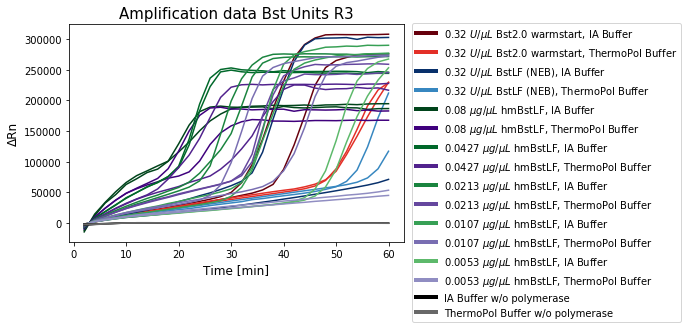

In [63]:
#fig_idx = -1
rdm.display_figure(figure, filename = 'Real_time_data/Plots/'+figure.title) # )#

In [64]:
# append to figures and to well_set
figures.append(figure)
well_set.fgs.append(figure)

In [65]:
## first select classification and dataset to be used ##
clf_idx = 6
dset_idx = 1

# obtain proper values with them
f_ds = well_set.dsets[dset_idx]  
f_clf = well_set.clfs[clf_idx]
#f_groups = f_clf.groups
groups_keys = f_clf.groups.keys()

## Define parameters to create a figure  ##

f_title = "Bst Units R3 - Melting"
f_xtext = f_ds.x_name +' ['+f_ds.x_units+']'
f_ytext = f_ds.y_name + f_ds.y_units
f_ax_text_size = 12
f_x_lim = None
f_y_lim = None
f_log_scale = False          # True or False

################################################
################################################
## this section could be inside Figure definition...
#####################################
## Create lists of series and colors
f_series = list()
f_colors = list()

f_lgd_lines = list()
f_lgd_text = list()

for key in groups_keys:
    group = f_clf.groups[key]  
    g_color = f_clf.colors[key]
    
    for well in group:
        
        serie = f_ds.series[well]
        
        f_series.append(serie)
        f_colors.append(g_color)   # same color for the whole group
    
    #create legend lines and text
    lgd_line = Line2D([0], [0], color = g_color , lw=4)
    txt = f_clf.labels[key]
    
    f_lgd_lines.append(lgd_line)
    f_lgd_text.append(txt)
      
#######################################
###### create the figure element ###### 

#figures.append(rdm.Figure(f_ds, f_clf, f_series, f_colors, f_title, f_xtext, f_ytext, f_ax_text_size, f_x_lim, f_y_lim , f_lgd_text, f_lgd_lines, f_log_scale))
figure = rdm.Figure(f_ds, f_clf, f_series, f_colors, f_title, f_xtext, 
                    f_ytext, f_ax_text_size, f_x_lim, f_y_lim , f_lgd_text, 
                    f_lgd_lines, f_log_scale, lgd_loc = 'upper left', lgd_anchor=[1.01, 1.03])

32  lines were plotted



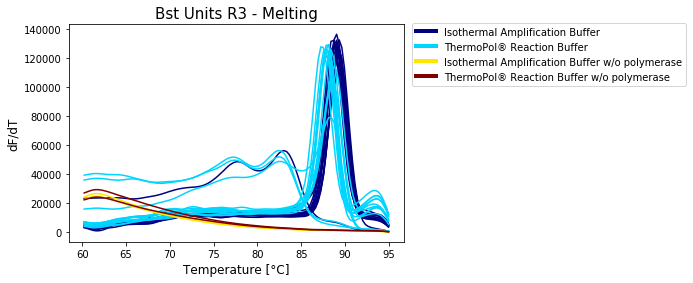

In [66]:
#fig_idx = -1
rdm.display_figure(figure,filename = 'Real_time_data/Plots/'+figure.title+'2') # )#

In [67]:
# append to figures and to well_set
figures.append(figure)
well_set.fgs.append(figure)

Melting curves analysis

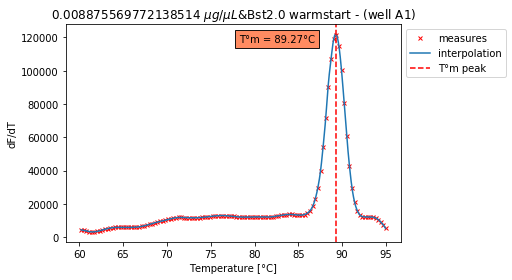

T°m peak : 89.27 °C


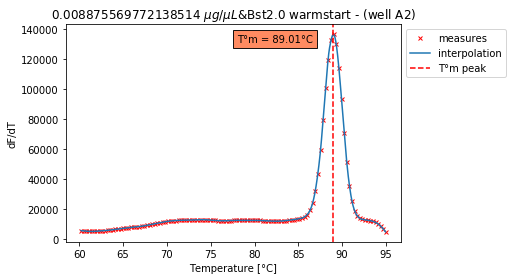

T°m peak : 89.01 °C


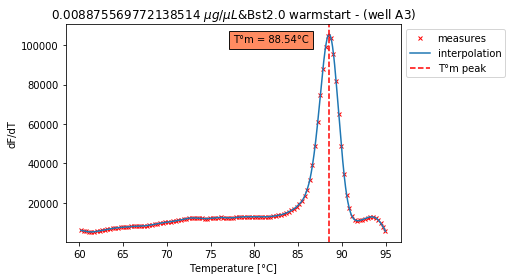

T°m peak : 88.54 °C


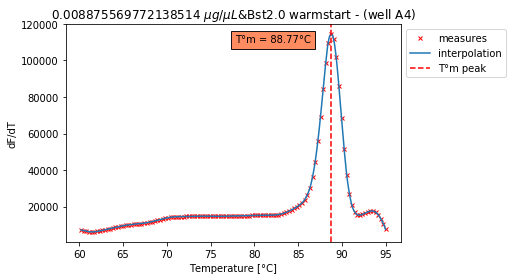

T°m peak : 88.77 °C


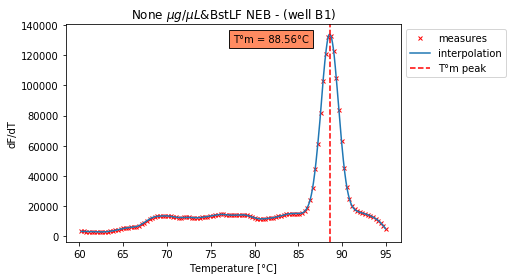

T°m peak : 88.56 °C


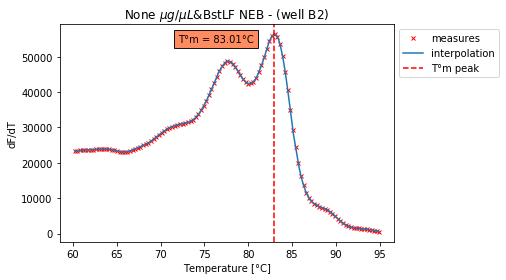

T°m peak : 83.01 °C


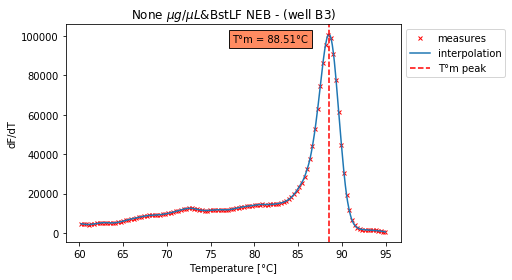

T°m peak : 88.51 °C


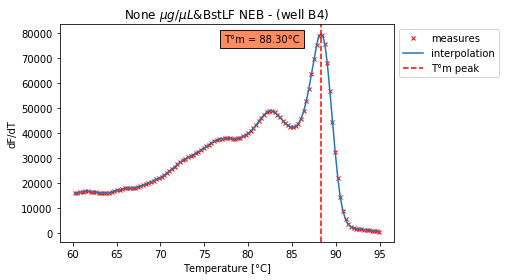

T°m peak : 88.30 °C


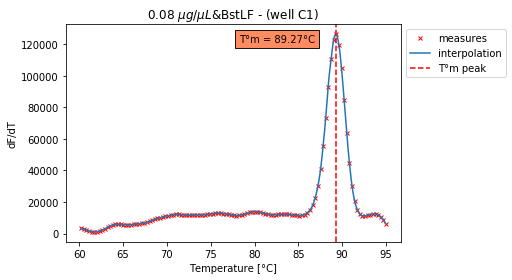

T°m peak : 89.27 °C


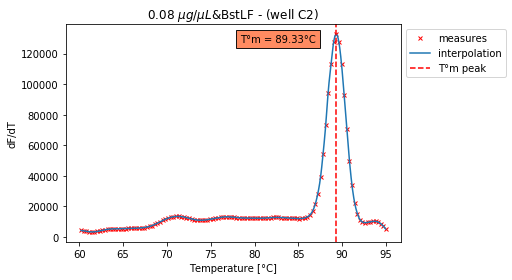

T°m peak : 89.33 °C


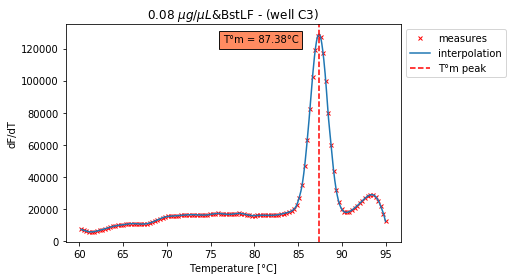

T°m peak : 87.38 °C


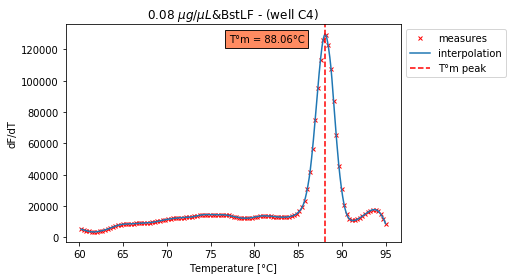

T°m peak : 88.06 °C


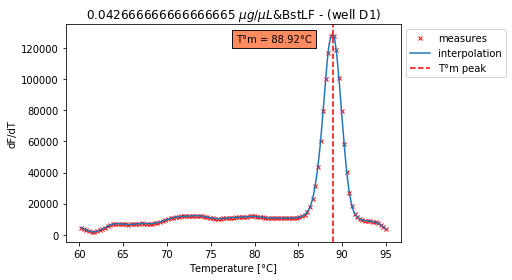

T°m peak : 88.92 °C


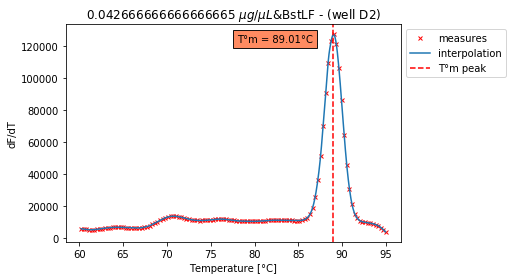

T°m peak : 89.01 °C


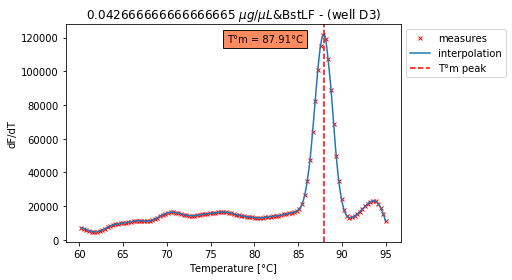

T°m peak : 87.91 °C


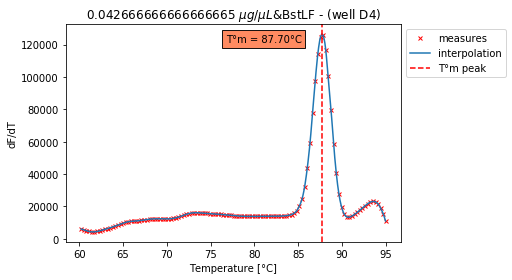

T°m peak : 87.70 °C


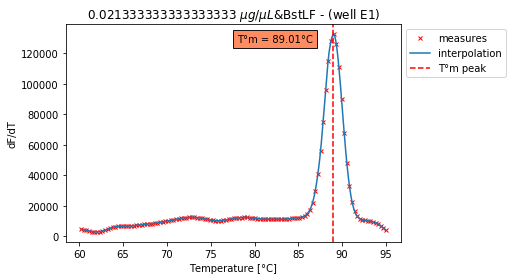

T°m peak : 89.01 °C


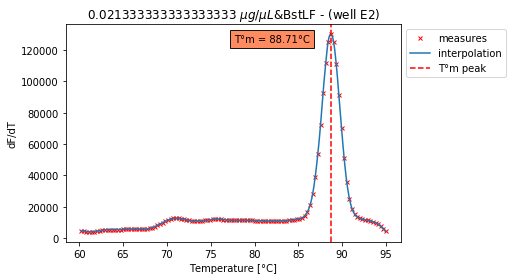

T°m peak : 88.71 °C


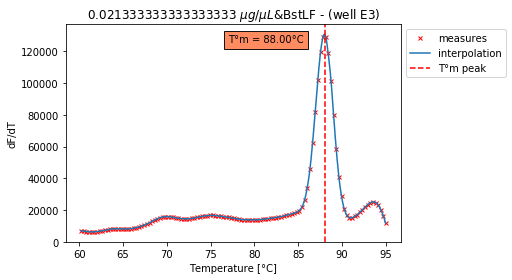

T°m peak : 88.00 °C


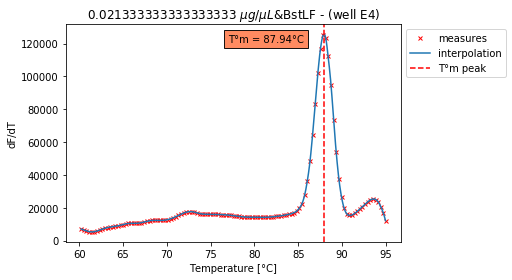

T°m peak : 87.94 °C


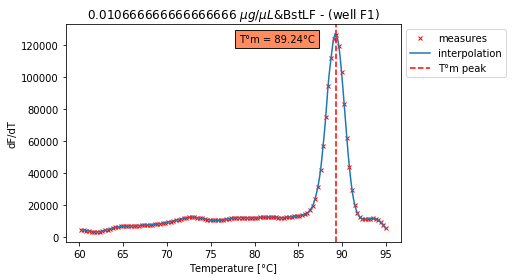

T°m peak : 89.24 °C


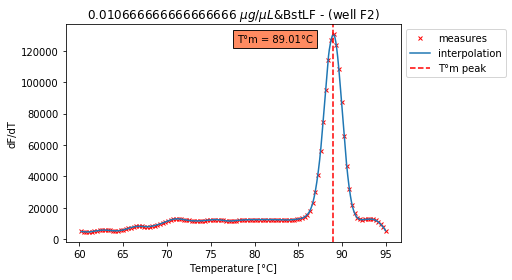

T°m peak : 89.01 °C


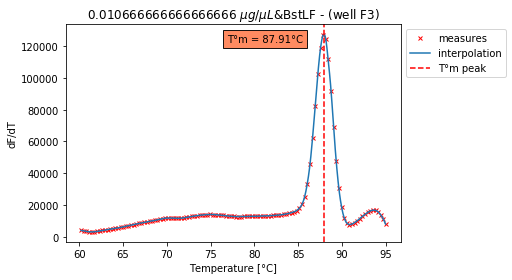

T°m peak : 87.91 °C


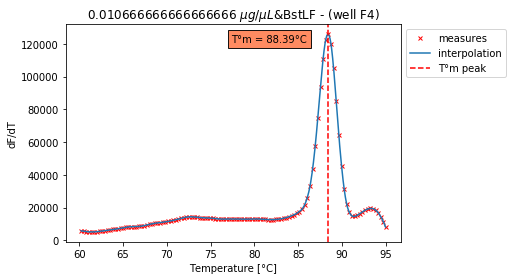

T°m peak : 88.39 °C


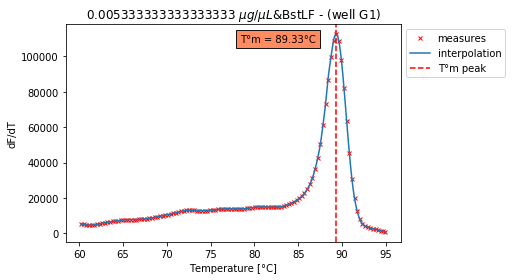

T°m peak : 89.33 °C


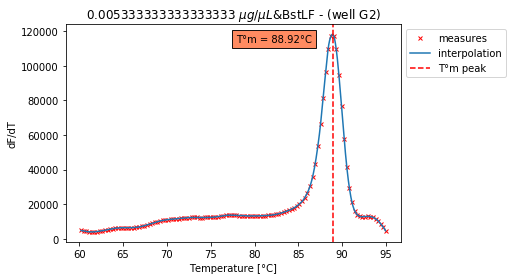

T°m peak : 88.92 °C


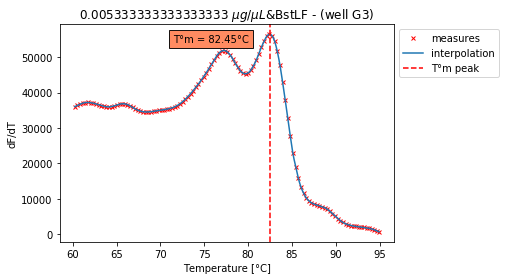

T°m peak : 82.45 °C


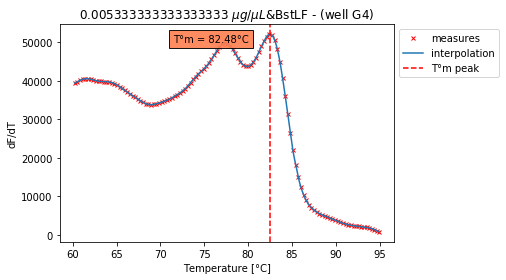

T°m peak : 82.48 °C


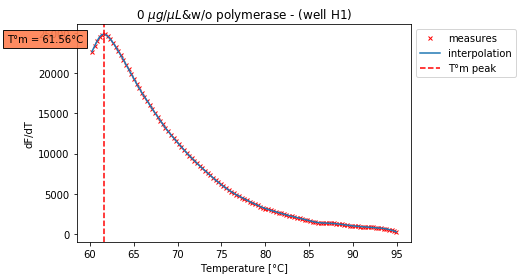

T°m peak : 61.56 °C


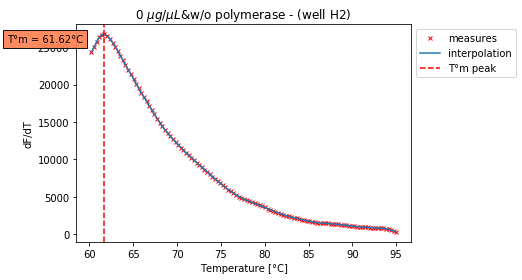

T°m peak : 61.62 °C


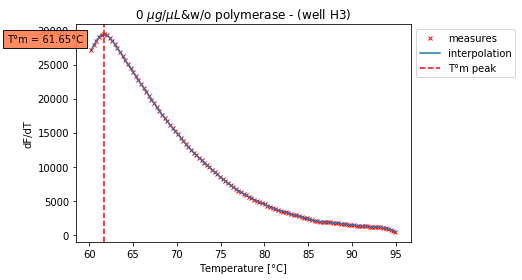

T°m peak : 61.65 °C


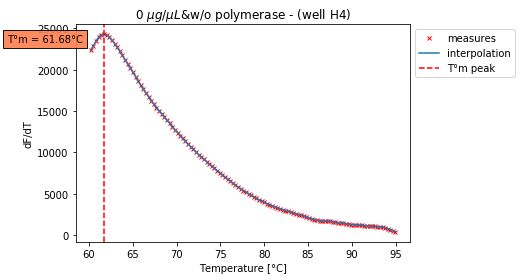

T°m peak : 61.68 °C


In [68]:
# fill with desired values
dset_idx = 1
clf_idx = 4

#################################
mdset = well_set.dsets[dset_idx]
mclf = well_set.clfs[clf_idx]

#rdm.get_Tm_peak(mdset, mclf, save = True)
well_peaks = rdm.get_Tm_peak(mdset, mclf, save = False)

assign the T°m peak values to data_set and to each well

In [69]:
mdset.peaks = well_peaks

In [70]:
pTm_name = "T°m peak"
pTm_descrip = "T°m peak value [T°, dF/dT]"
for well in list(mdset.peaks.keys()):    
    peak = mdset.peaks[well]
    Tm_p = rdm.Parameter(pTm_name , pTm_descrip, units = ['T°', 'dF/dT'], value=peak, properties='')
    rdm.well_param_assignation(Tm_p, well, ask = False)

In [71]:
list(mdset.peaks.keys())[0].analysis[0].__dict__

{'description': 'T°m peak value [T°, dF/dT]',
 'name': 'T°m peak',
 'properties': '',
 'units': ['T°', 'dF/dT'],
 'value': [89.27323797730119, 121901.90191922356]}

##### get mean T°m values

In [72]:
clf_idx = 6
for cls in well_set.clfs[clf_idx].classes:
    sum_val = 0
    count = 0
    clf_label = well_set.clfs[clf_idx].labels[cls]
    print('\n',clf_label)
    print('Class values: ')
    for well in well_set.clfs[clf_idx].groups[cls]:
        print(well.analysis[0].value[0])
        sum_val+=well.analysis[0].value[0]
        count+=1
    mean = sum_val/count
    print('T°m mean value = ',mean, ' °C')
        


 Isothermal Amplification Buffer
Class values: 
89.27323797730119
89.00588332699138
88.56029224314172
83.00525673114917
89.27323797730119
89.33265012181448
88.91676511022145
89.00588332699138
89.00588332699138
88.70882260442494
89.24353190504455
89.00588332699138
89.33265012181448
88.91676511022145
T°m mean value =  88.61333880074288  °C

 ThermoPol® Reaction Buffer
Class values: 
88.5362783518482
88.77394951134283
88.50656945691136
88.29860719235357
87.37763144931189
88.06093603285895
87.9123915581748
87.70442929361701
88.00151824298528
87.94210045311164
87.9123915581748
88.38773387716405
82.44595488979839
82.47566378473522
T°m mean value =  87.30972540374201  °C

 Isothermal Amplification Buffer w/o polymerase
Class values: 
61.557472561851746
61.616884706365035
T°m mean value =  61.58717863410839  °C

 ThermoPol® Reaction Buffer w/o polymerase
Class values: 
61.64972843401854
61.67943732895537
T°m mean value =  61.66458288148696  °C


###### get threshold values

In [73]:
# check available data_sets
rdm.print_list(well_set.dsets)

[0] 'Amplification data ΔRn vs Time' dataset
[1] 'Melting data' dataset


##### --- debugging section ---

In [104]:
previous_values = [
[17, 20, 23],
[17, 20, 22],
[12, 19, 21],
[20, 23, 27],
[22, 26, 28],
[24, 27, 29],
[22, 26, 28],
[19, 23, 25],
[6, 9, 11],
[6, 9, 10],
[9, 12, 14],
[10, 16, 19],
[7, 10, 12],
[9, 12, 14],
[10, 13, 15],
[11, 14, 16],
[10, 13, 16],
[13, 16, 18],
[13, 16, 18],
[18, 21, 23],
[11, 14, 18],
[16, 19, 23],
[16, 20, 23],
[14, 18, 19],
[22, 25, 29],
[21, 25, 29],
[25, 29, 29],
[17, 21, 25]
]


In [112]:
for i in range(0,len(previous_values)):
    p_value = previous_values[i]
    value = list()
    for val in p_value:
        value.append(val)
    well = well_set.wells[i]
    p_name = 'Amplification response region' 
    p_description = 'x vector index of exponential response region of the well amplification data'

    rr_parameter = rdm.Parameter(p_name, p_description, units = '', value=value, properties='') 

    rdm.well_param_assignation(rr_parameter, well, ask = False)

##### ------- end deb ----------

In [74]:
for well in well_set.wells:
    print(well.wpos+':','()')

A1: ()
A2: ()
A3: ()
A4: ()
B1: ()
B2: ()
B3: ()
B4: ()
C1: ()
C2: ()
C3: ()
C4: ()
D1: ()
D2: ()
D3: ()
D4: ()
E1: ()
E2: ()
E3: ()
E4: ()
F1: ()
F2: ()
F3: ()
F4: ()
G1: ()
G2: ()
G3: ()
G4: ()
H1: ()
H2: ()
H3: ()
H4: ()


fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631A23EC80> parameter values [0.87637131]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.07461325 -3.52564494]


D:\Github\BstLF\rt_module\rt_data_manage.py:2195: RuntimeWarning: invalid value encountered in log10
  log10y = np.log10(y)


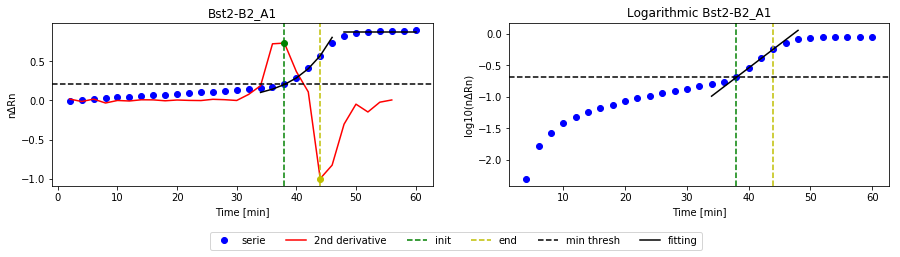


* init (green) = [ 38 , 0.7336738636194778 ]
* end (yellow) = [ 44 , -1.0 ]
* maximum region beggining : x = 48
R^2 value (exp fitting) = 0.999014131153515

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): n
enter new x start position: 50
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x0000026323C92048> parameter values [0.88521906]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.07461325 -3.52564494]


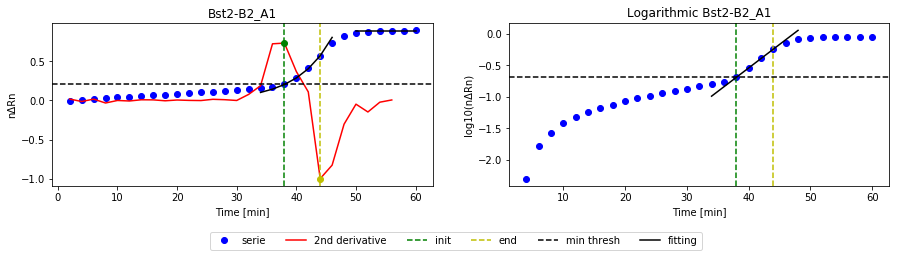


* init (green) = [ 38 , 0.7336738636194778 ]
* end (yellow) = [ 44 , -1.0 ]
* maximum region beggining : x = 50
R^2 value (exp fitting) = 0.999014131153515

is the new value appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631433F378> parameter values [0.99009603]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.06929371 -2.86985909]


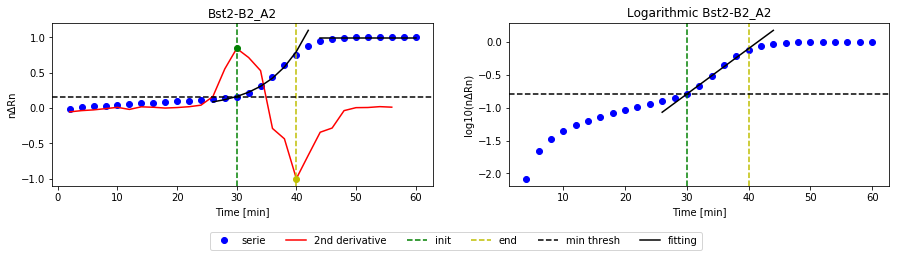


* init (green) = [ 30 , 0.8413716077314437 ]
* end (yellow) = [ 40 , -1.0 ]
* maximum region beggining : x = 44
R^2 value (exp fitting) = 0.9944944199512121

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): n
enter new x start position: 46
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x0000026318AAF6A8> parameter values [0.99570227]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.06929371 -2.86985909]


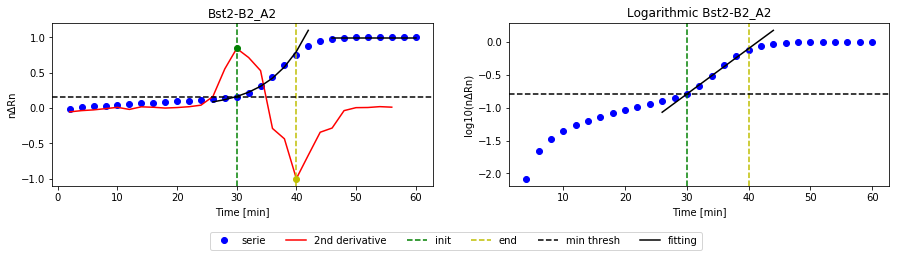


* init (green) = [ 30 , 0.8413716077314437 ]
* end (yellow) = [ 40 , -1.0 ]
* maximum region beggining : x = 46
R^2 value (exp fitting) = 0.9944944199512121

is the new value appropiate?
(y/n): y
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.0502958  -3.06141494]


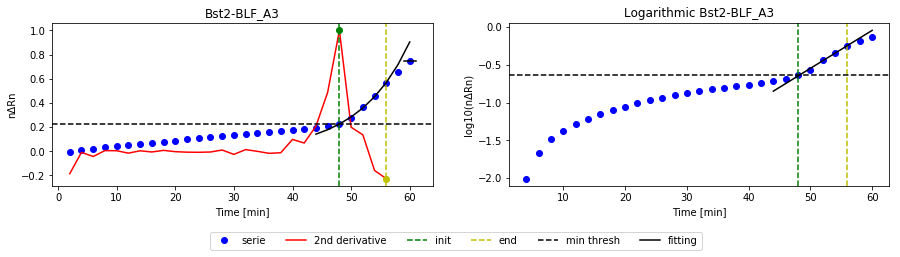


* init (green) = [ 48 , 1.0 ]
* end (yellow) = [ 56 , -0.22596307535500013 ]
* maximum region beggining : x = 60
R^2 value (exp fitting) = 0.9959037262023446

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.05582845 -3.32776322]


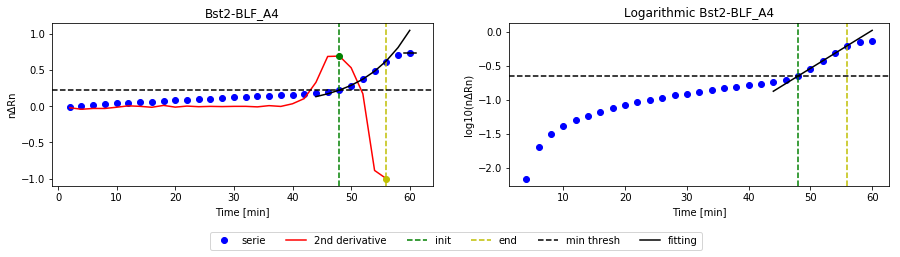


* init (green) = [ 48 , 0.6954756283103213 ]
* end (yellow) = [ 56 , -1.0 ]
* maximum region beggining : x = 60
R^2 value (exp fitting) = 0.9987266516565549

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 48
enter new x position of yellow line: 54
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.05735106 -3.40389384]


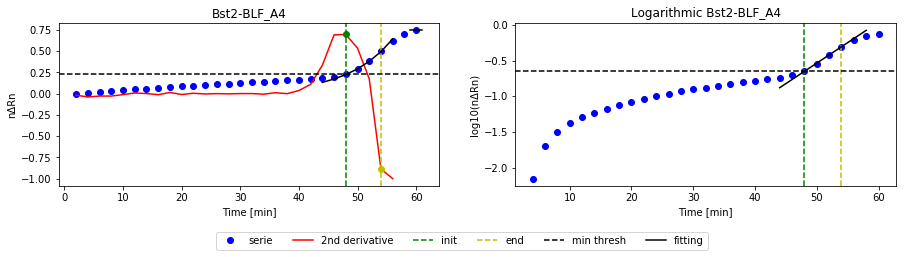


* init (green) = [ 48 , 0.6954756283103213 ]
* end (yellow) = [ 54 , -0.8870088185672431 ]
* maximum region beggining : x = 60
R^2 value (exp fitting) = 0.9989943652290593

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631CB83488> parameter values [0.97563708]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.07237696 -3.03033189]


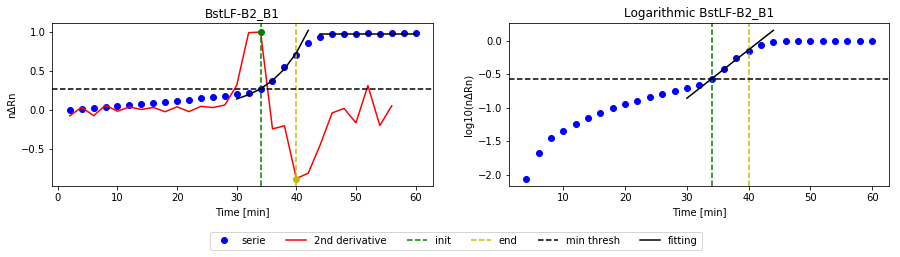


* init (green) = [ 34 , 1.0 ]
* end (yellow) = [ 40 , -0.8879523789316123 ]
* maximum region beggining : x = 44
R^2 value (exp fitting) = 0.9937127562464265

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 34
enter new x position of yellow line: 38
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x0000026319D2F598> parameter values [0.97563708]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.07918299 -3.27081147]


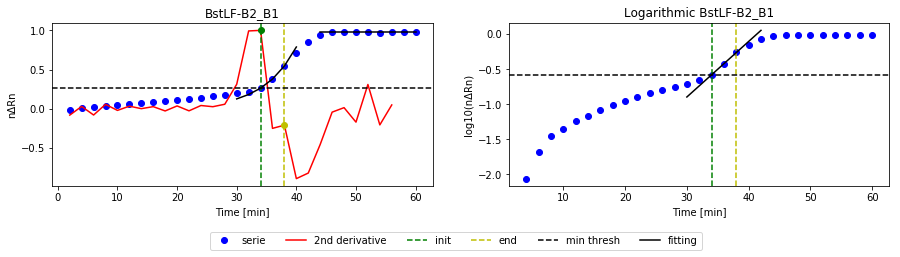


* init (green) = [ 34 , 1.0 ]
* end (yellow) = [ 38 , -0.20724423543572273 ]
* maximum region beggining : x = 44
R^2 value (exp fitting) = 0.9990987677722595

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): n
enter new x start position: 46
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002632276B598> parameter values [0.97979429]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.07918299 -3.27081147]


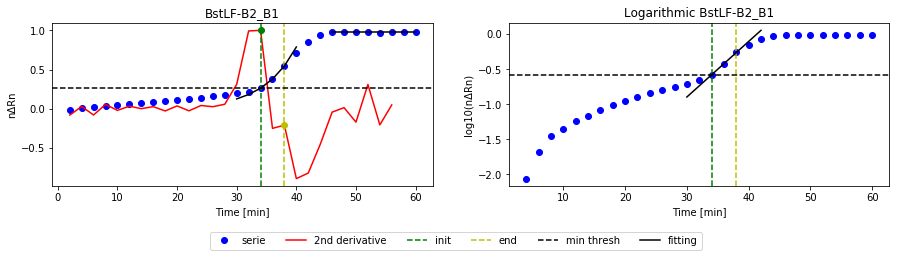


* init (green) = [ 34 , 1.0 ]
* end (yellow) = [ 38 , -0.20724423543572273 ]
* maximum region beggining : x = 46
R^2 value (exp fitting) = 0.9990987677722595

is the new value appropiate?
(y/n): y
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [  0.28749084 -16.79612134]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
D:\Github\BstLF\rt_module\rt_data_manage.py:1984: RuntimeWarning: divide by zero encountered in double_scalars
  r_s = 1 - (ss_res / ss_tot)


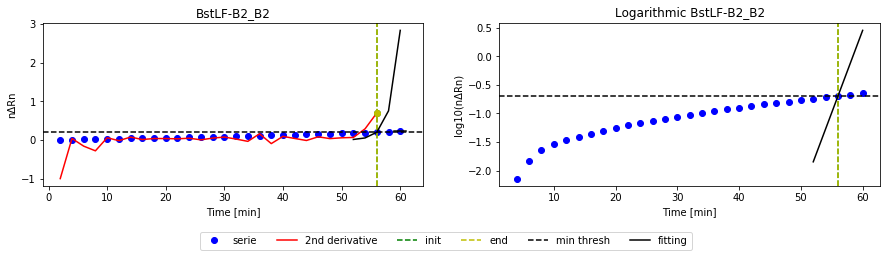


* init (green) = [ 56 , 0.7001858916836868 ]
* end (yellow) = [ 56 , 0.7001858916836868 ]
* maximum region beggining : x = 60
R^2 value (exp fitting) = -inf

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 52
enter new x position of yellow line: 60
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.01323301 -1.43445195]


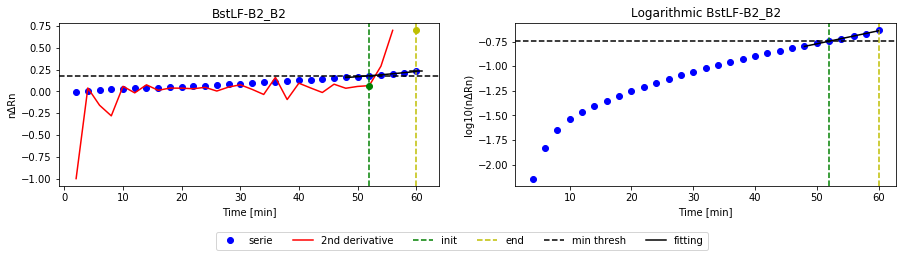


* init (green) = [ 52 , 0.0663925085467968 ]
* end (yellow) = [ 60 , 0.7001858916836868 ]
* maximum region beggining : x = 60
R^2 value (exp fitting) = 0.9934598727514067

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.06540639 -4.06648673]


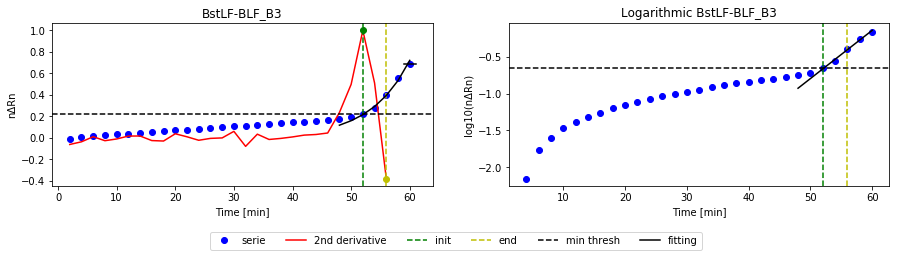


* init (green) = [ 52 , 1.0 ]
* end (yellow) = [ 56 , -0.3782815441741699 ]
* maximum region beggining : x = 60
R^2 value (exp fitting) = 0.9863822317618038

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 52
enter new x position of yellow line: 58
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.06826416 -4.21890132]


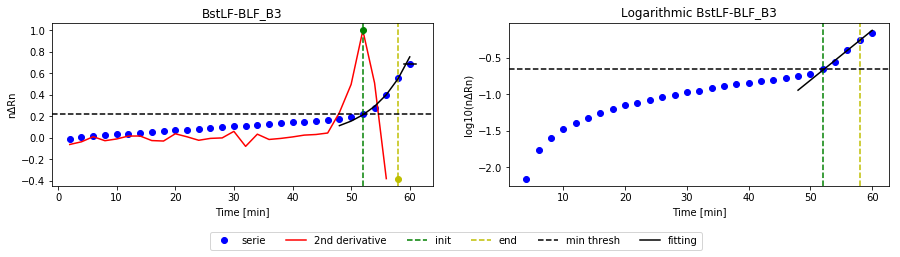


* init (green) = [ 52 , 1.0 ]
* end (yellow) = [ 58 , -0.3782815441741699 ]
* maximum region beggining : x = 60
R^2 value (exp fitting) = 0.9938006841769333

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [  0.2888248  -16.79615078]


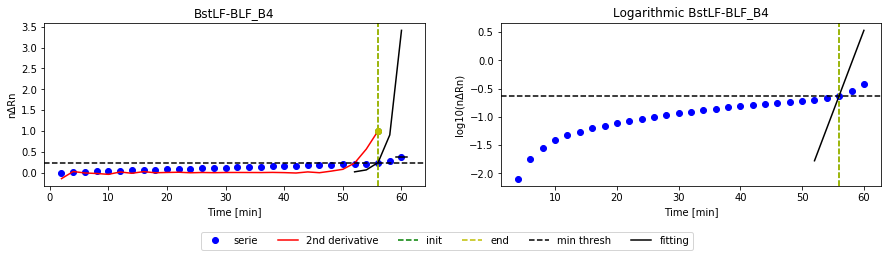


* init (green) = [ 56 , 1.0 ]
* end (yellow) = [ 56 , 1.0 ]
* maximum region beggining : x = 60
R^2 value (exp fitting) = -inf

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 56
enter new x position of yellow line: 60
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.0504745  -3.45555205]


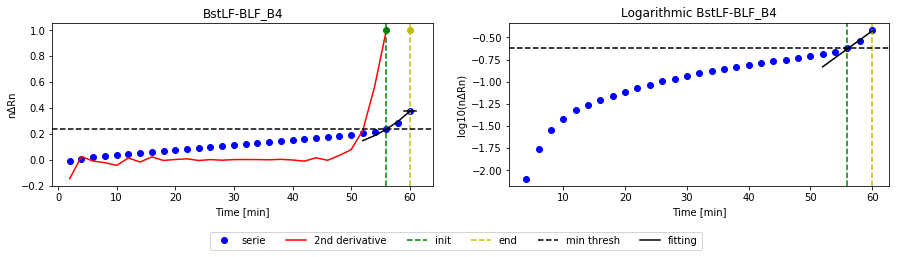


* init (green) = [ 56 , 1.0 ]
* end (yellow) = [ 60 , 1.0 ]
* maximum region beggining : x = 60
R^2 value (exp fitting) = 0.9856967213372146

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C3F0400> parameter values [0.61151461]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.04427882 -1.26452648]


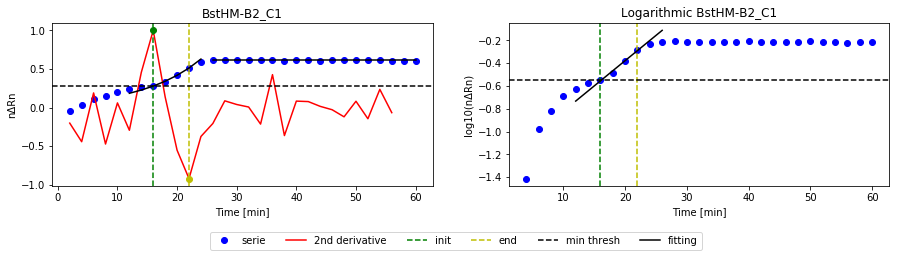


* init (green) = [ 16 , 1.0 ]
* end (yellow) = [ 22 , -0.9207048721210058 ]
* maximum region beggining : x = 26
R^2 value (exp fitting) = 0.9875378650942505

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C430730> parameter values [0.62451456]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.02481281 -0.91921363]


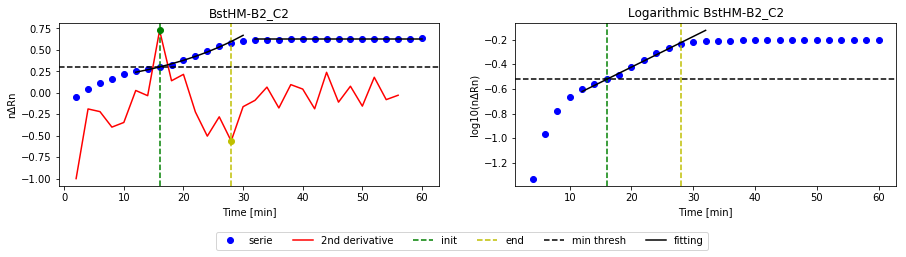


* init (green) = [ 16 , 0.7264882556919141 ]
* end (yellow) = [ 28 , -0.5618892975745763 ]
* maximum region beggining : x = 32
R^2 value (exp fitting) = 0.991471257242689

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 18
enter new x position of yellow line: 24
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C4A7598> parameter values [0.62451456]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.02882325 -1.00237605]


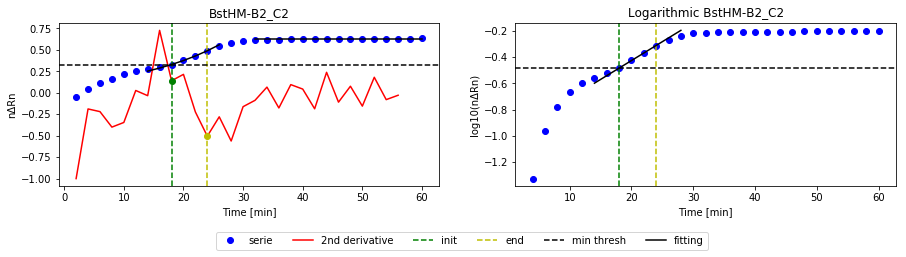


* init (green) = [ 18 , 0.13977050508659494 ]
* end (yellow) = [ 24 , -0.5054024136203987 ]
* maximum region beggining : x = 32
R^2 value (exp fitting) = 0.9998307436819099

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C4CB510> parameter values [0.60030838]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.05333342 -1.4884175 ]


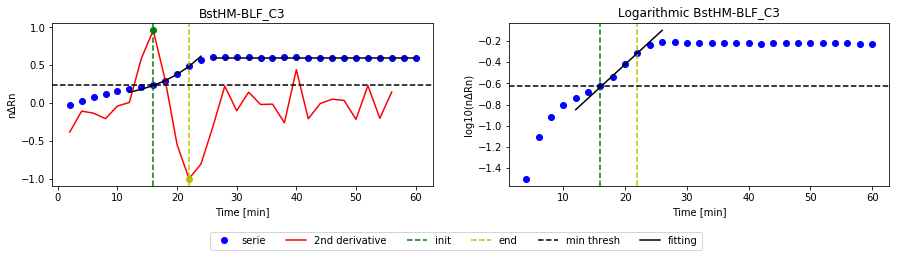


* init (green) = [ 16 , 0.9610946330982297 ]
* end (yellow) = [ 22 , -1.0 ]
* maximum region beggining : x = 26
R^2 value (exp fitting) = 0.9956892548837402

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C545158> parameter values [0.53696828]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.03018782 -1.21596108]


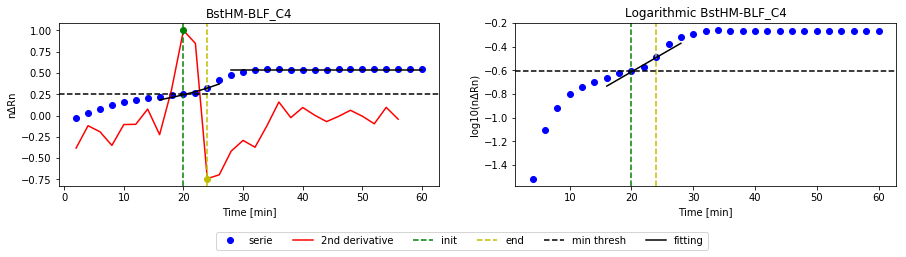


* init (green) = [ 20 , 1.0 ]
* end (yellow) = [ 24 , -0.7398647878331851 ]
* maximum region beggining : x = 28
R^2 value (exp fitting) = 0.9519828366768182

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 22
enter new x position of yellow line: 26
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C58A488> parameter values [0.53696828]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.046701  -1.5980884]


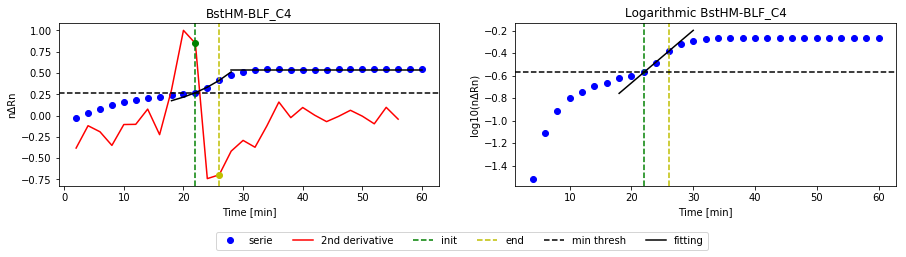


* init (green) = [ 22 , 0.8471452675741615 ]
* end (yellow) = [ 26 , -0.6952196912693527 ]
* maximum region beggining : x = 28
R^2 value (exp fitting) = 0.9965342065061339

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): n
enter new x start position: 32
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C5CA7B8> parameter values [0.5424227]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.046701  -1.5980884]


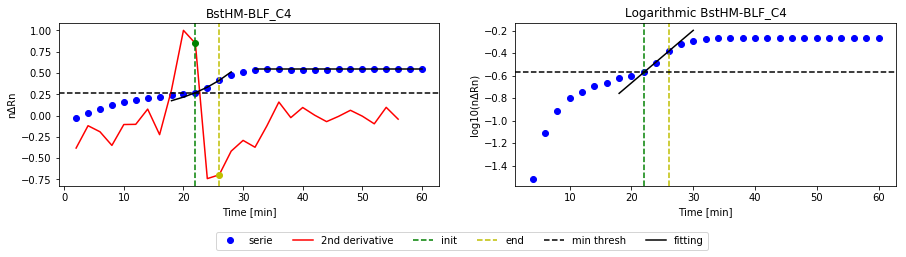


* init (green) = [ 22 , 0.8471452675741615 ]
* end (yellow) = [ 26 , -0.6952196912693527 ]
* maximum region beggining : x = 32
R^2 value (exp fitting) = 0.9965342065061339

is the new value appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C5FD378> parameter values [0.80500606]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.06967196 -1.88413626]


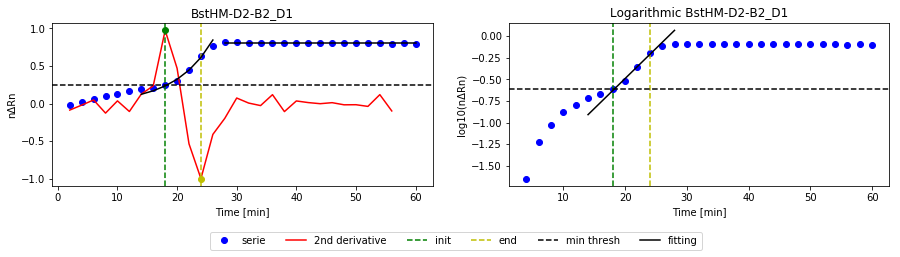


* init (green) = [ 18 , 0.9746441661694826 ]
* end (yellow) = [ 24 , -1.0 ]
* maximum region beggining : x = 28
R^2 value (exp fitting) = 0.9840021253648127

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 20
enter new x position of yellow line: 24
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C5FDB70> parameter values [0.80500606]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.08038098 -2.12687402]


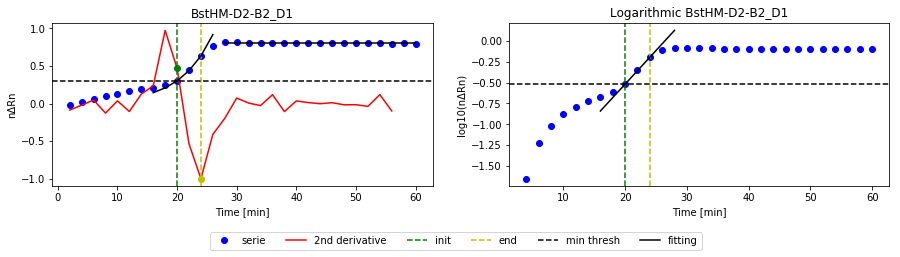


* init (green) = [ 20 , 0.4696273285714762 ]
* end (yellow) = [ 24 , -1.0 ]
* maximum region beggining : x = 28
R^2 value (exp fitting) = 0.9990476066460571

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C6BC1E0> parameter values [0.79637261]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.06224344 -1.74811428]


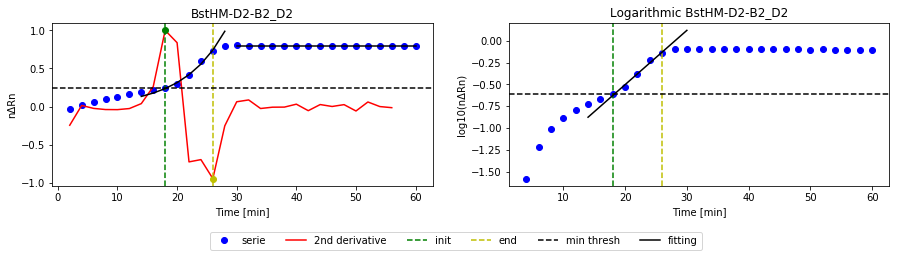


* init (green) = [ 18 , 1.0 ]
* end (yellow) = [ 26 , -0.9464009198281078 ]
* maximum region beggining : x = 30
R^2 value (exp fitting) = 0.9864462822982036

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 20
enter new x position of yellow line: 24
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C701510> parameter values [0.79637261]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.07668696 -2.06791943]


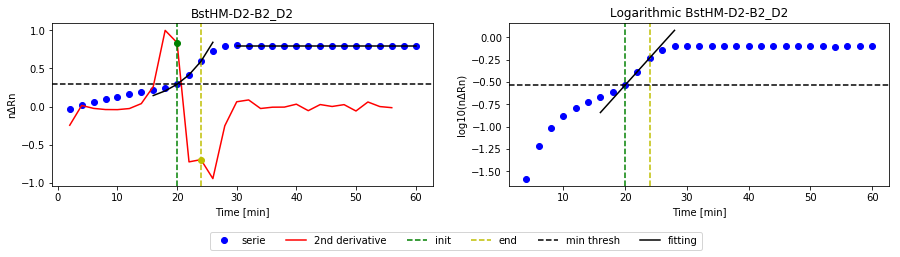


* init (green) = [ 20 , 0.8382340760374389 ]
* end (yellow) = [ 24 , -0.696956508921013 ]
* maximum region beggining : x = 30
R^2 value (exp fitting) = 0.9997518225147906

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C73E0D0> parameter values [0.71550234]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.03644301 -1.57140568]


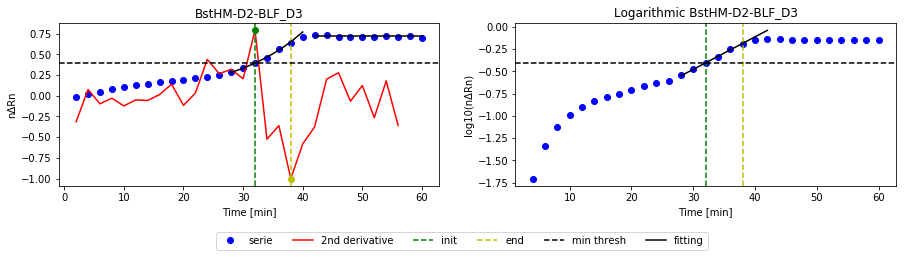


* init (green) = [ 32 , 0.7894910128975772 ]
* end (yellow) = [ 38 , -1.0 ]
* maximum region beggining : x = 42
R^2 value (exp fitting) = 0.9947281651632752

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 28
enter new x position of yellow line: 36
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C76C378> parameter values [0.71550234]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.03668661 -1.57704151]


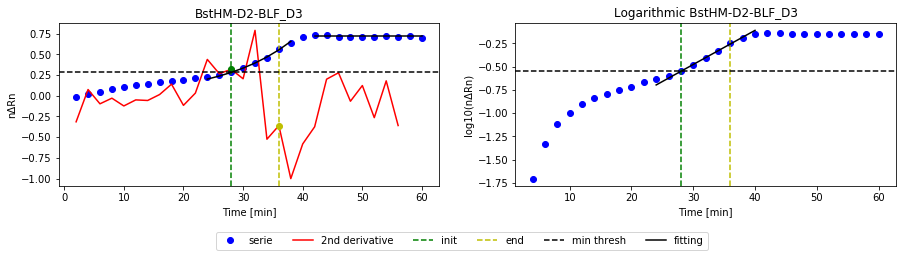


* init (green) = [ 28 , 0.3194118469359977 ]
* end (yellow) = [ 36 , -0.3602615321605588 ]
* maximum region beggining : x = 42
R^2 value (exp fitting) = 0.9977532583220481

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C73ED90> parameter values [0.73343563]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.04672475 -1.46915936]


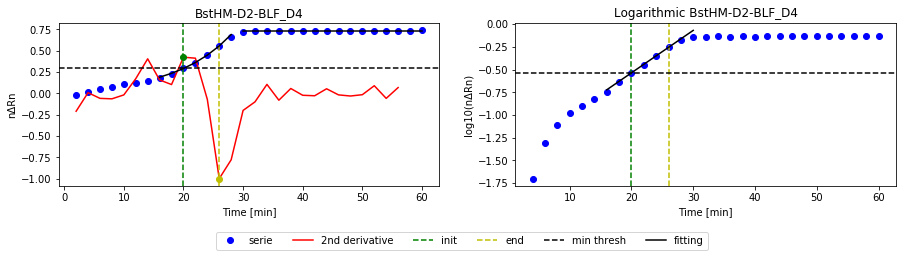


* init (green) = [ 20 , 0.4244159982144678 ]
* end (yellow) = [ 26 , -1.0 ]
* maximum region beggining : x = 30
R^2 value (exp fitting) = 0.9996373314099073

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 16
enter new x position of yellow line: 26
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C73E378> parameter values [0.73343563]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.04854965 -1.51207958]


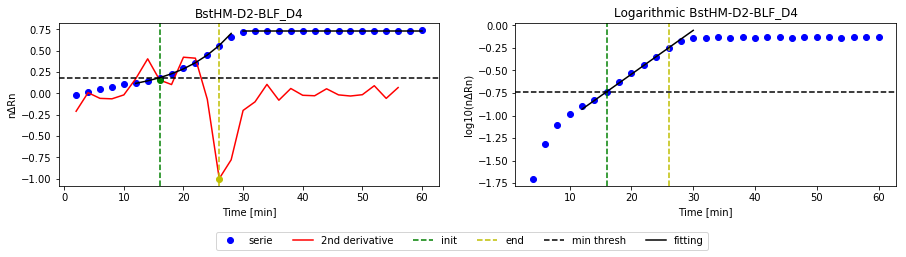


* init (green) = [ 16 , 0.1575811522454799 ]
* end (yellow) = [ 26 , -1.0 ]
* maximum region beggining : x = 30
R^2 value (exp fitting) = 0.9988628330772956

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x00000263209C1510> parameter values [0.88089141]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.08104836 -2.6067303 ]


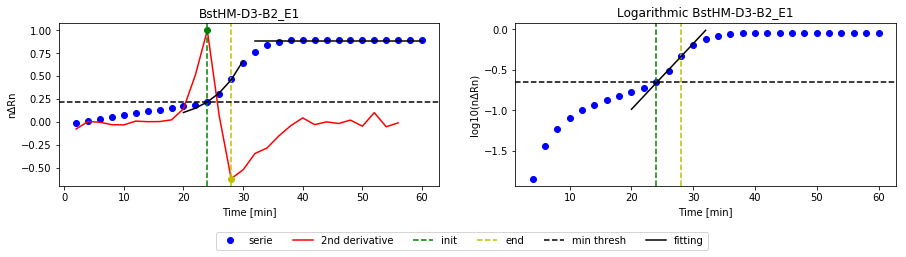


* init (green) = [ 24 , 1.0 ]
* end (yellow) = [ 28 , -0.6187211266171216 ]
* maximum region beggining : x = 32
R^2 value (exp fitting) = 0.9883001204674736

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 24
enter new x position of yellow line: 30
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631CB83EA0> parameter values [0.88089141]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.0788056  -2.54991385]


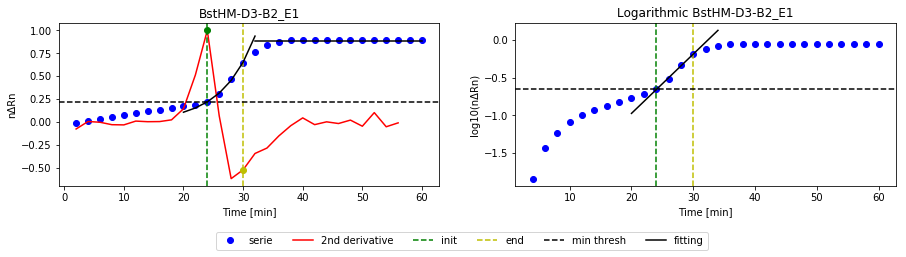


* init (green) = [ 24 , 1.0 ]
* end (yellow) = [ 30 , -0.5228109979829298 ]
* maximum region beggining : x = 32
R^2 value (exp fitting) = 0.9944819420093978

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): n
enter new x start position: 38
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x0000026321C07048> parameter values [0.89456585]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.0788056  -2.54991385]


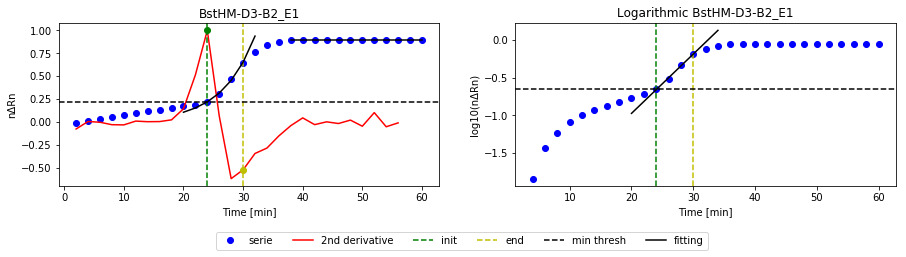


* init (green) = [ 24 , 1.0 ]
* end (yellow) = [ 30 , -0.5228109979829298 ]
* maximum region beggining : x = 38
R^2 value (exp fitting) = 0.9944819420093978

is the new value appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x0000026318AAF378> parameter values [0.87685784]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.05098799 -1.84420991]


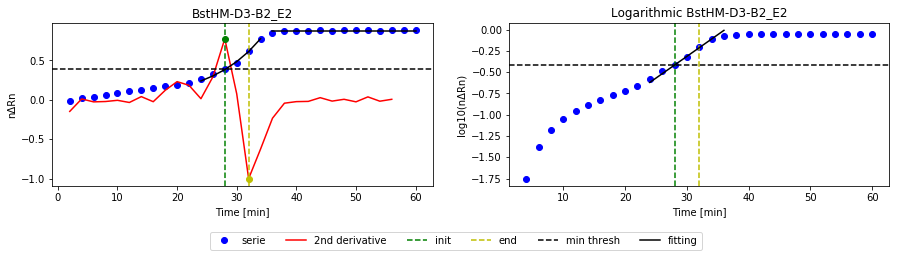


* init (green) = [ 28 , 0.7744643894854727 ]
* end (yellow) = [ 32 , -1.0 ]
* maximum region beggining : x = 36
R^2 value (exp fitting) = 0.9924759257240056

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 22
enter new x position of yellow line: 34
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x00000263163DE6A8> parameter values [0.87685784]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.04574672 -1.67889797]


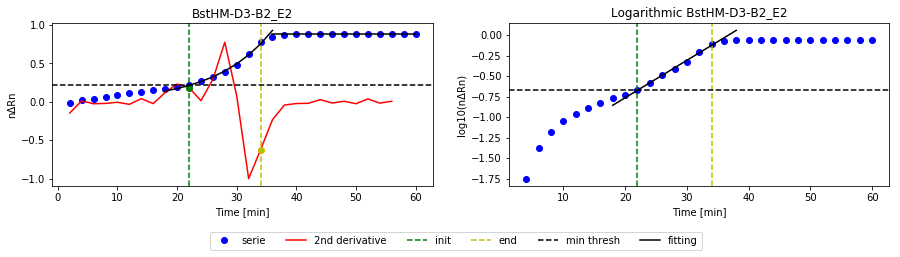


* init (green) = [ 22 , 0.18426656540920117 ]
* end (yellow) = [ 34 , -0.6245883742917215 ]
* maximum region beggining : x = 36
R^2 value (exp fitting) = 0.996625398795365

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): n
enter new x start position: 38
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x0000026313BB09D8> parameter values [0.87935634]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.04574672 -1.67889797]


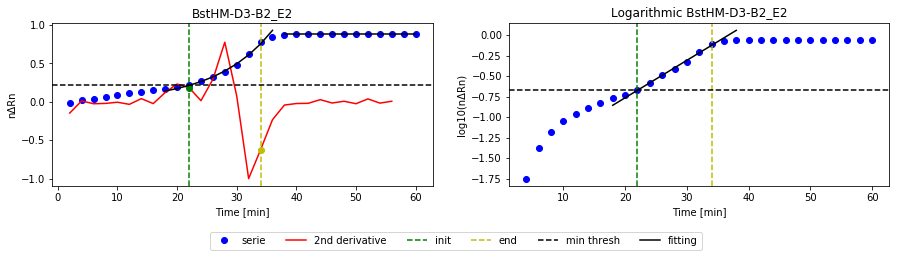


* init (green) = [ 22 , 0.18426656540920117 ]
* end (yellow) = [ 34 , -0.6245883742917215 ]
* maximum region beggining : x = 38
R^2 value (exp fitting) = 0.996625398795365

is the new value appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x0000026325D7C400> parameter values [0.83084351]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.07483746 -3.00845117]


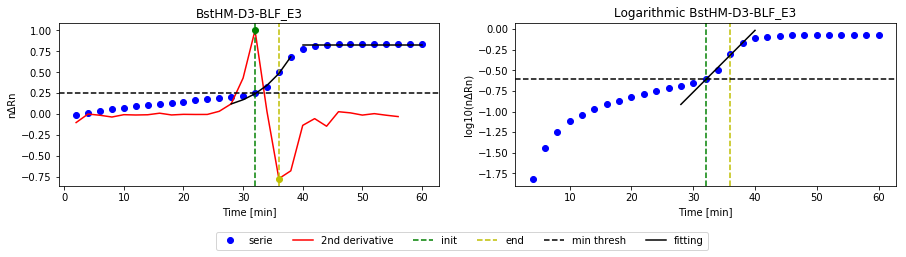


* init (green) = [ 32 , 1.0 ]
* end (yellow) = [ 36 , -0.7686510451852187 ]
* maximum region beggining : x = 40
R^2 value (exp fitting) = 0.9785845454228219

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 32
enter new x position of yellow line: 38
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C69B0D0> parameter values [0.83084351]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.07425427 -2.98901129]


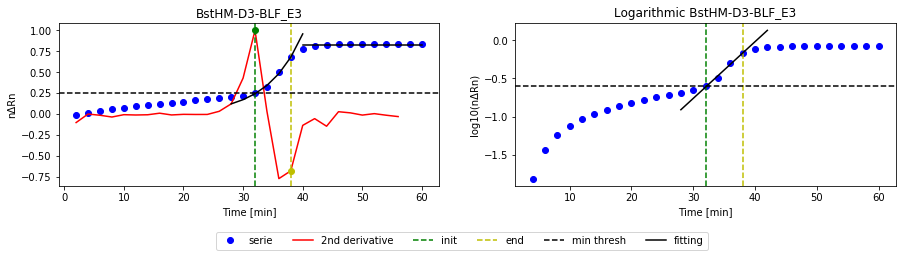


* init (green) = [ 32 , 1.0 ]
* end (yellow) = [ 38 , -0.6756503338844715 ]
* maximum region beggining : x = 40
R^2 value (exp fitting) = 0.9911462764470623

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): n
enter new x start position: 42
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C483400> parameter values [0.8360521]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.07425427 -2.98901129]


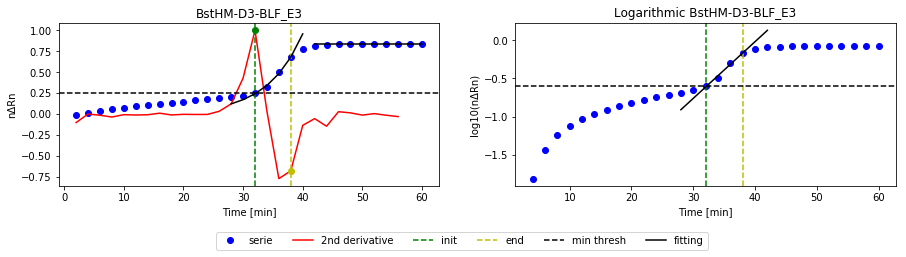


* init (green) = [ 32 , 1.0 ]
* end (yellow) = [ 38 , -0.6756503338844715 ]
* maximum region beggining : x = 42
R^2 value (exp fitting) = 0.9911462764470623

is the new value appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C68C730> parameter values [0.78433865]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.08469512 -3.30174118]


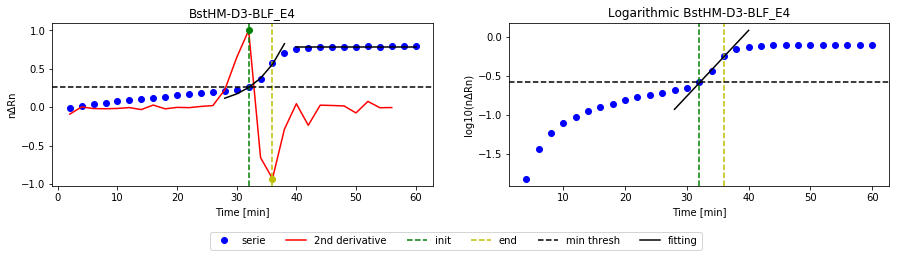


* init (green) = [ 32 , 1.0 ]
* end (yellow) = [ 36 , -0.9288206369893781 ]
* maximum region beggining : x = 40
R^2 value (exp fitting) = 0.993359962745789

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C7F1A60> parameter values [0.87616077]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.08272465 -3.36388654]


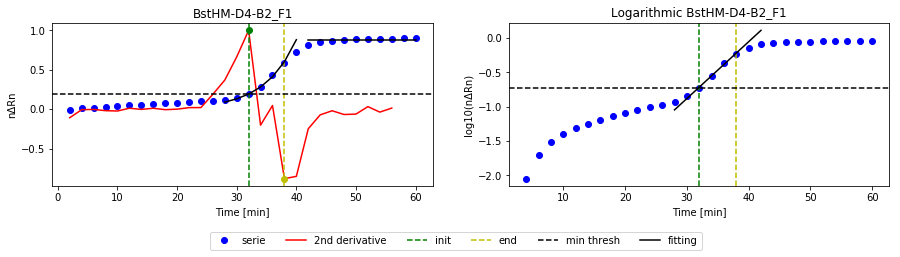


* init (green) = [ 32 , 1.0 ]
* end (yellow) = [ 38 , -0.8813076139194591 ]
* maximum region beggining : x = 42
R^2 value (exp fitting) = 0.9928444821475729

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 30
enter new x position of yellow line: 38
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C5BC1E0> parameter values [0.87616077]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.07948413 -3.24722758]


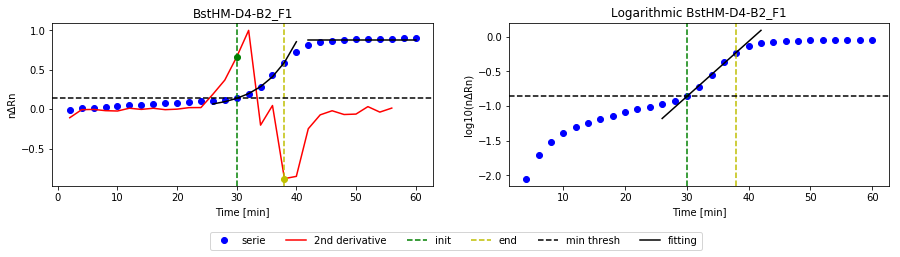


* init (green) = [ 30 , 0.6630716038647586 ]
* end (yellow) = [ 38 , -0.8813076139194591 ]
* maximum region beggining : x = 42
R^2 value (exp fitting) = 0.9944652897129298

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): n
enter new x start position: 46
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C609158> parameter values [0.88750257]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.07948413 -3.24722758]


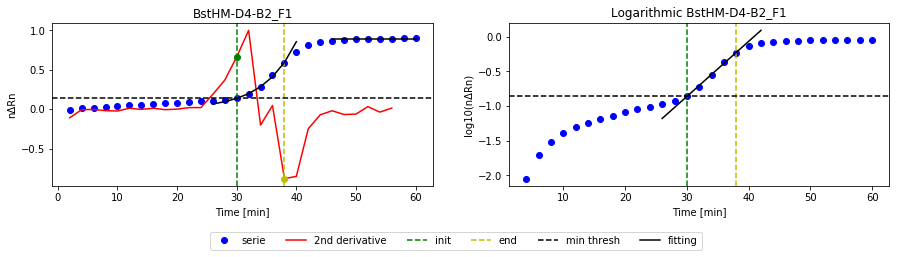


* init (green) = [ 30 , 0.6630716038647586 ]
* end (yellow) = [ 38 , -0.8813076139194591 ]
* maximum region beggining : x = 46
R^2 value (exp fitting) = 0.9944652897129298

is the new value appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C3E6488> parameter values [0.9276451]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.08849712 -3.51371944]


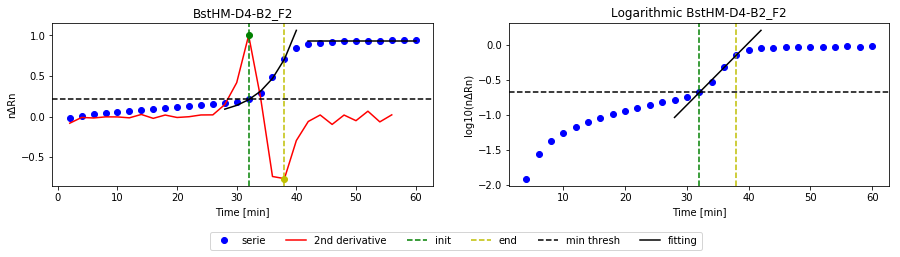


* init (green) = [ 32 , 1.0 ]
* end (yellow) = [ 38 , -0.7633857854327751 ]
* maximum region beggining : x = 42
R^2 value (exp fitting) = 0.9931337172841904

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): n
enter new x start position: 44
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C4E67B8> parameter values [0.93173896]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.08849712 -3.51371944]


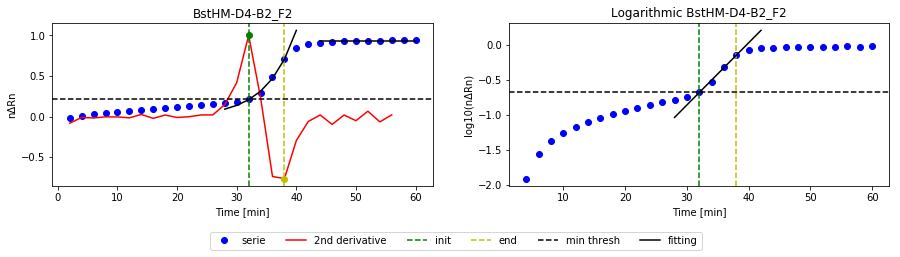


* init (green) = [ 32 , 1.0 ]
* end (yellow) = [ 38 , -0.7633857854327751 ]
* maximum region beggining : x = 44
R^2 value (exp fitting) = 0.9931337172841904

is the new value appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C4BB400> parameter values [0.87098137]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.08429521 -3.03308086]


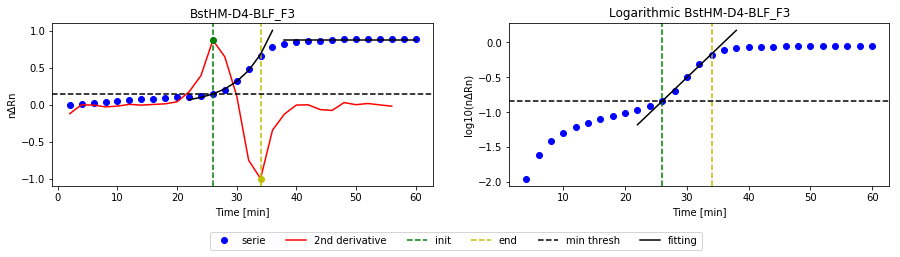


* init (green) = [ 26 , 0.8708004747935215 ]
* end (yellow) = [ 34 , -1.0 ]
* maximum region beggining : x = 38
R^2 value (exp fitting) = 0.9952545866336918

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 26
enter new x position of yellow line: 32
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C2E41E0> parameter values [0.87098137]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.08780463 -3.13134456]


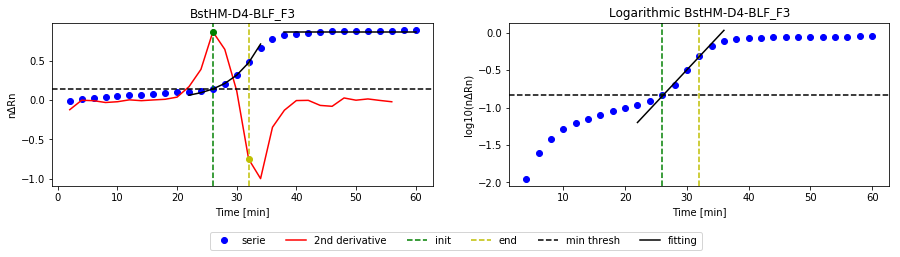


* init (green) = [ 26 , 0.8708004747935215 ]
* end (yellow) = [ 32 , -0.7513690386536647 ]
* maximum region beggining : x = 38
R^2 value (exp fitting) = 0.9944370514249238

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C3B71E0> parameter values [0.86134263]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.06461613 -3.14467289]


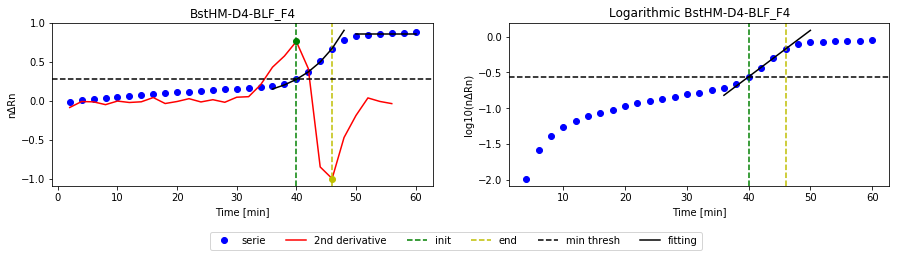


* init (green) = [ 40 , 0.7626550708452117 ]
* end (yellow) = [ 46 , -1.0 ]
* maximum region beggining : x = 50
R^2 value (exp fitting) = 0.9993799005059357

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 38
enter new x position of yellow line: 46
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C58B510> parameter values [0.86134263]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.06122749 -2.99557267]


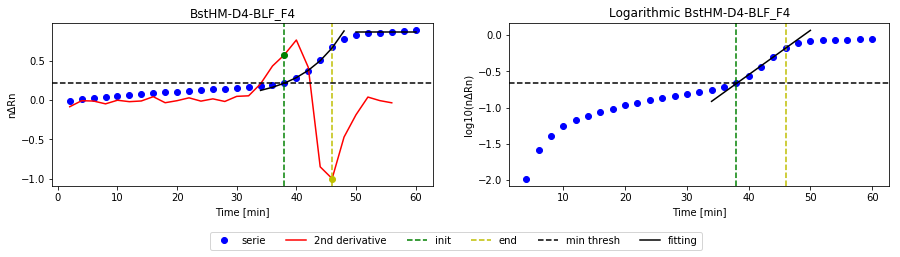


* init (green) = [ 38 , 0.5754512116670095 ]
* end (yellow) = [ 46 , -1.0 ]
* maximum region beggining : x = 50
R^2 value (exp fitting) = 0.9966029659659009

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C441598> parameter values [0.75057385]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.08773428 -4.93198172]


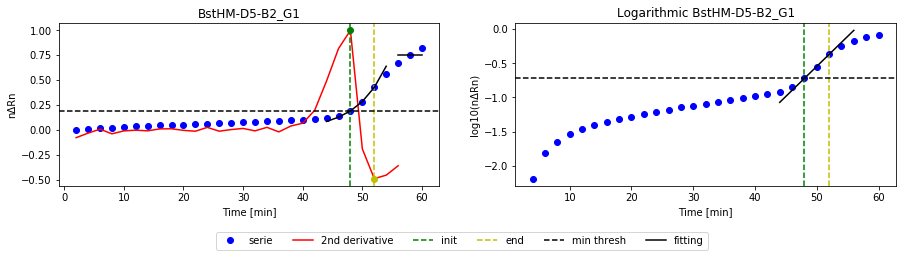


* init (green) = [ 48 , 1.0 ]
* end (yellow) = [ 52 , -0.4901712099636404 ]
* maximum region beggining : x = 56
R^2 value (exp fitting) = 0.9997365746433285

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 46
enter new x position of yellow line: 54
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C375048> parameter values [0.75057385]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.07710462 -4.40109224]


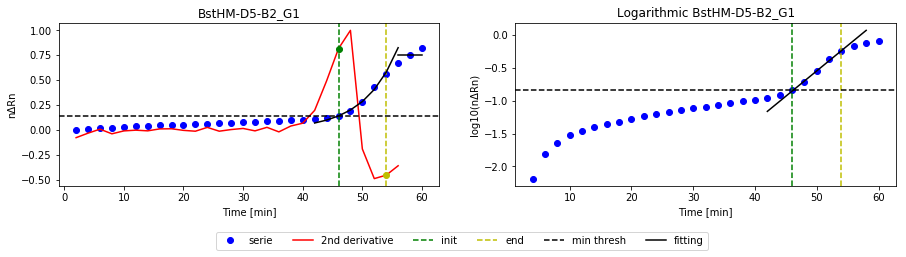


* init (green) = [ 46 , 0.8166841717365313 ]
* end (yellow) = [ 54 , -0.4553941566095086 ]
* maximum region beggining : x = 56
R^2 value (exp fitting) = 0.9951925478089066

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): n
enter new x start position: 60
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.07710462 -4.40109224]


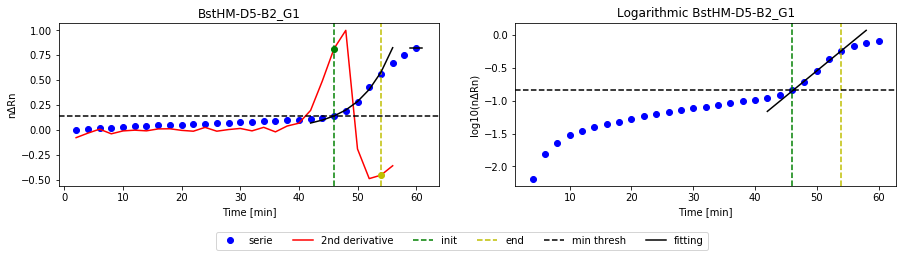


* init (green) = [ 46 , 0.8166841717365313 ]
* end (yellow) = [ 54 , -0.4553941566095086 ]
* maximum region beggining : x = 60
R^2 value (exp fitting) = 0.9951925478089066

is the new value appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C32FBF8> parameter values [0.84676412]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.09042652 -4.89896463]


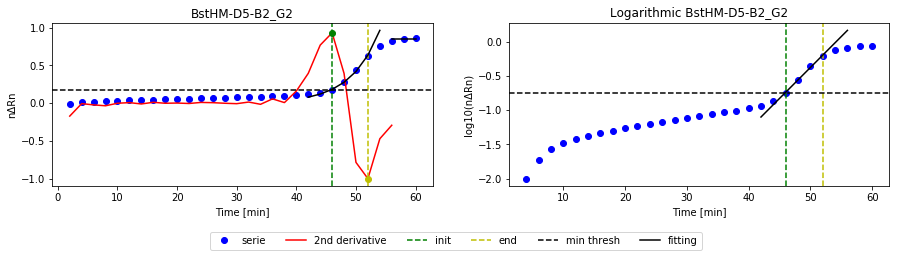


* init (green) = [ 46 , 0.9312447849329262 ]
* end (yellow) = [ 52 , -1.0 ]
* maximum region beggining : x = 56
R^2 value (exp fitting) = 0.9974624269002701

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 44
enter new x position of yellow line: 52
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x00000263207EED90> parameter values [0.84676412]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.08561149 -4.65821306]


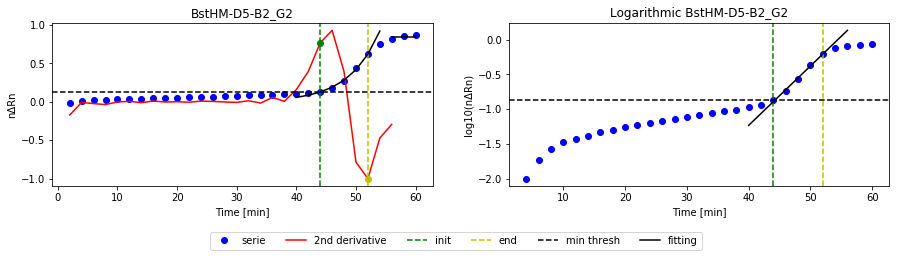


* init (green) = [ 44 , 0.7685625823331103 ]
* end (yellow) = [ 52 , -1.0 ]
* maximum region beggining : x = 56
R^2 value (exp fitting) = 0.995438528127321

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): n
enter new x start position: 58
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631CB83488> parameter values [0.8609073]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.08561149 -4.65821306]


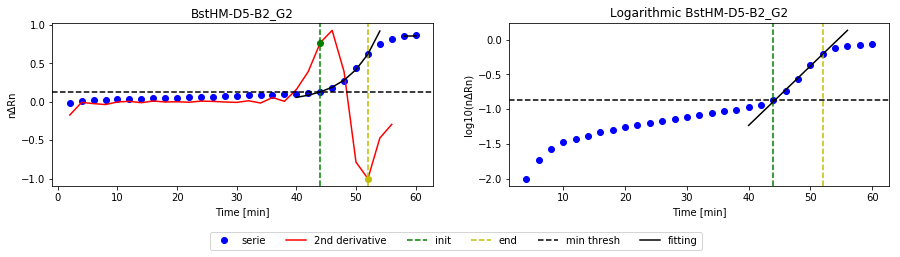


* init (green) = [ 44 , 0.7685625823331103 ]
* end (yellow) = [ 52 , -1.0 ]
* maximum region beggining : x = 58
R^2 value (exp fitting) = 0.995438528127321

is the new value appropiate?
(y/n): y
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [  0.28559579 -16.79607379]


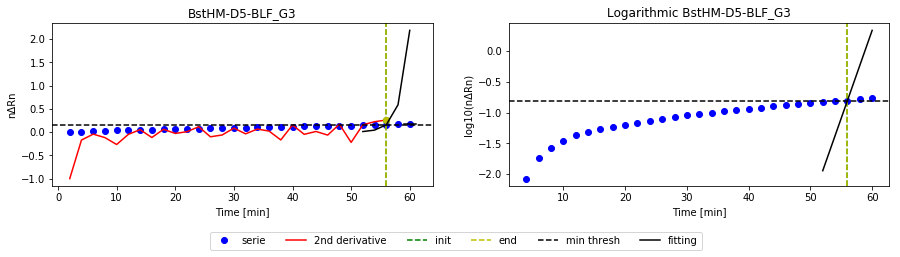


* init (green) = [ 56 , 0.26046647062629863 ]
* end (yellow) = [ 56 , 0.26046647062629863 ]
* maximum region beggining : x = 60
R^2 value (exp fitting) = -inf

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 52
enter new x position of yellow line: 60
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.0088355  -1.29402325]


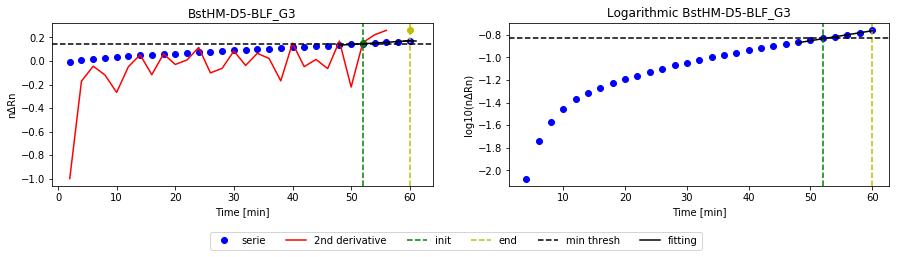


* init (green) = [ 52 , 0.156639369603198 ]
* end (yellow) = [ 60 , 0.26046647062629863 ]
* maximum region beggining : x = 60
R^2 value (exp fitting) = 0.9871061812020527

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631E194048> parameter values [0.114463]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.01116716 -1.44413989]


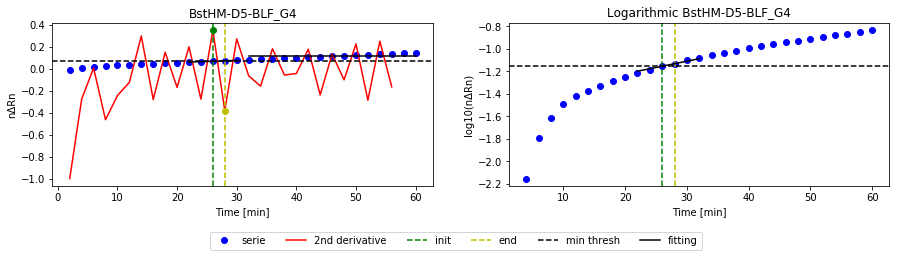


* init (green) = [ 26 , 0.35203226856593856 ]
* end (yellow) = [ 28 , -0.37894391378110204 ]
* maximum region beggining : x = 32
R^2 value (exp fitting) = 0.9999999995525284

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): n
enter new x position of green line: 52
enter new x position of yellow line: 60
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631EAD2378> parameter values [0.114463]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.00733965 -1.27473713]


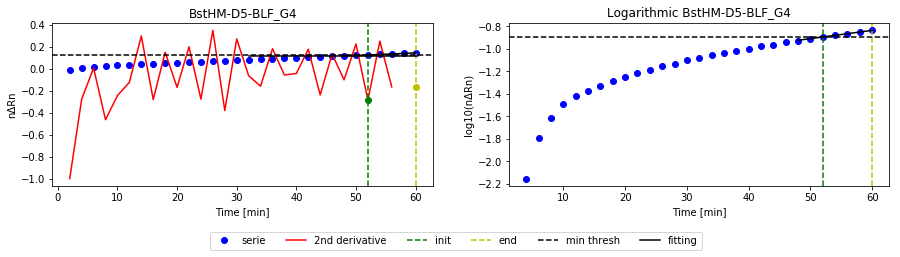


* init (green) = [ 52 , -0.28469492812886255 ]
* end (yellow) = [ 60 , -0.1629890770692562 ]
* maximum region beggining : x = 32
R^2 value (exp fitting) = 0.9973387004272464

are the new values appropiate?
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): n
enter new x start position: 60
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 0.00733965 -1.27473713]


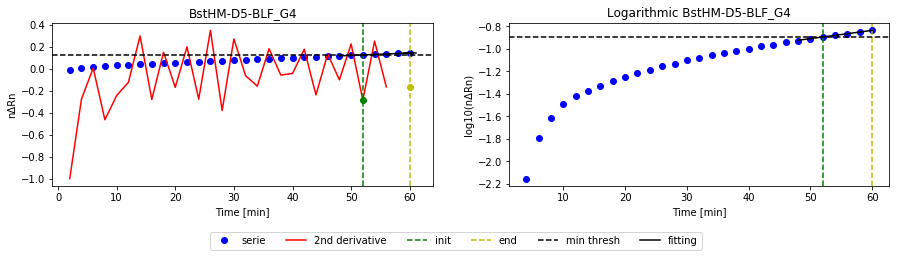


* init (green) = [ 52 , -0.28469492812886255 ]
* end (yellow) = [ 60 , -0.1629890770692562 ]
* maximum region beggining : x = 60
R^2 value (exp fitting) = 0.9973387004272464

is the new value appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C513598> parameter values [0.00013448]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 1.51985125e-05 -5.67409564e+00]


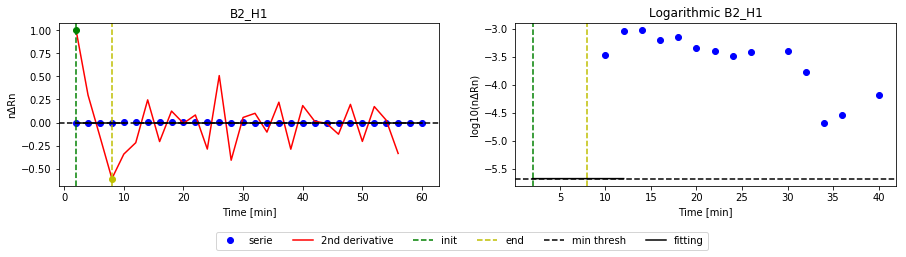


* init (green) = [ 2 , 1.0 ]
* end (yellow) = [ 8 , -0.608699215016 ]
* maximum region beggining : x = 12
R^2 value (exp fitting) = -inf

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): NE
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C3202F0> parameter values [0.00013448]


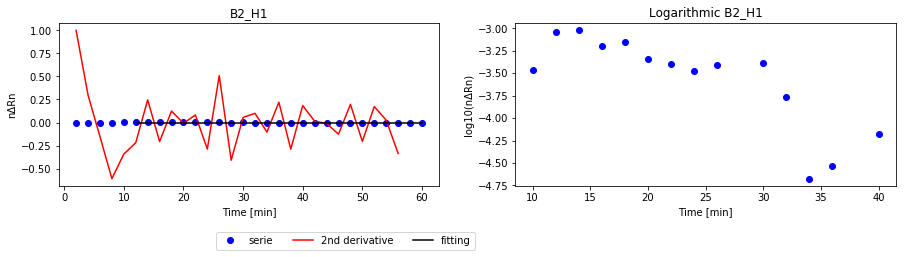

* maximum region beggining : x = 12
No exponential region is defined

Is the start of maximum region appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C455AE8> parameter values [-0.0005549]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 3.72874509e-05 -6.25180030e+00]


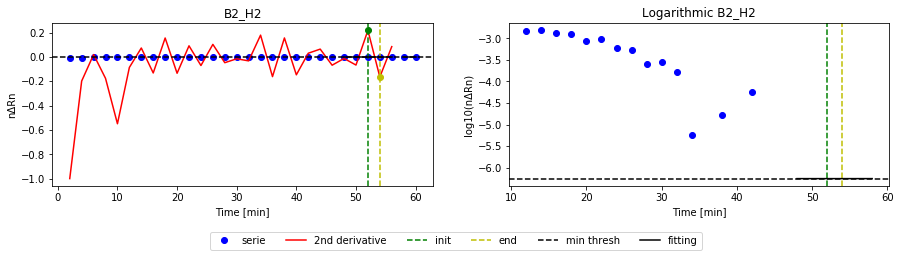


* init (green) = [ 52 , 0.21808427029346178 ]
* end (yellow) = [ 54 , -0.16467879530622542 ]
* maximum region beggining : x = 58
R^2 value (exp fitting) = -inf

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): NE
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C41D488> parameter values [-0.0005549]


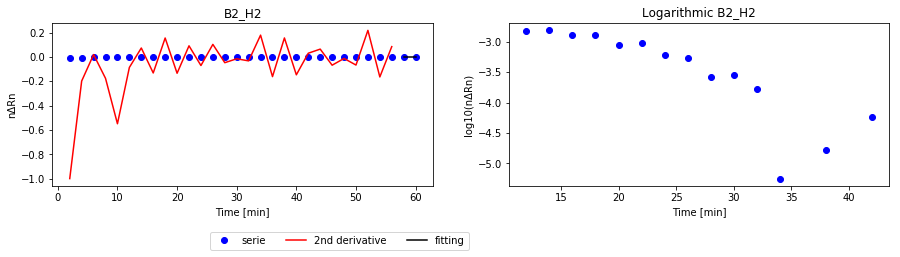

* maximum region beggining : x = 58
No exponential region is defined

Is the start of maximum region appropiate?
(y/n): n
enter new x start position: 40
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C81A950> parameter values [-0.00030996]


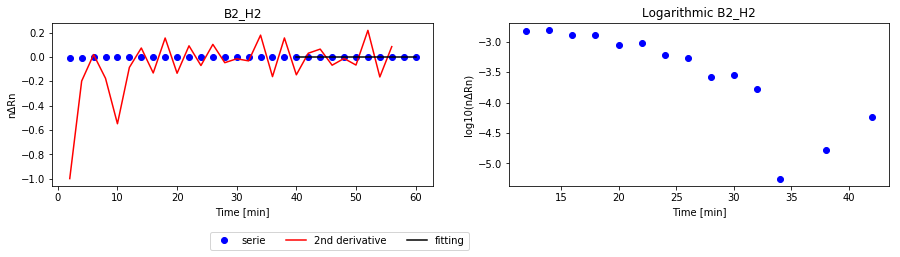

* maximum region beggining : x = 40

is the new value appropiate?
(y/n): n
enter new x start position: 15

values out of range, posible values are:

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
 50 52 54 56 58 60]


enter new x start position: 14
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C555730> parameter values [0.00017381]


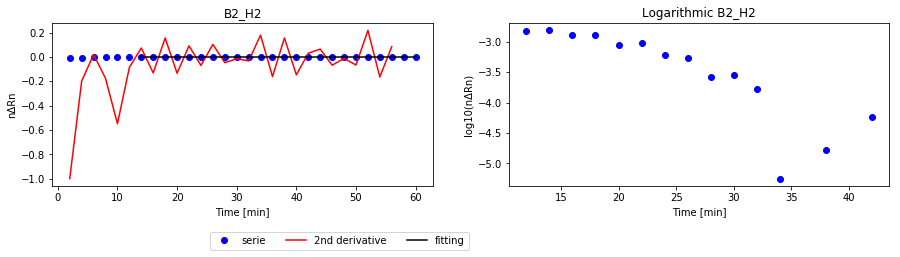

* maximum region beggining : x = 14

is the new value appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C3C17B8> parameter values [0.00011427]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 1.45174521e-05 -6.03502603e+00]


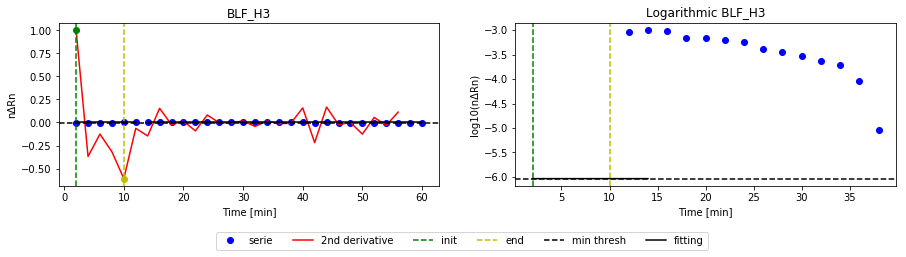


* init (green) = [ 2 , 1.0 ]
* end (yellow) = [ 10 , -0.6092955042902215 ]
* maximum region beggining : x = 14
R^2 value (exp fitting) = -inf

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): NE
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C3CD620> parameter values [0.00011427]


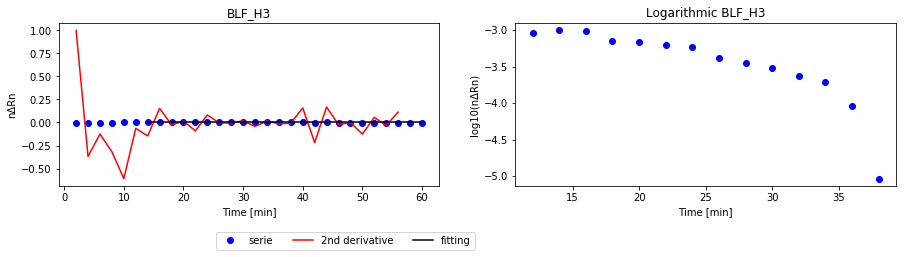

* maximum region beggining : x = 14
No exponential region is defined

Is the start of maximum region appropiate?
(y/n): y
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C75B8C8> parameter values [0.00025337]
exponential fit
fitted <function f_linear at 0x00000263123CDC80> parameter values [ 1.54265092e-05 -5.44765580e+00]


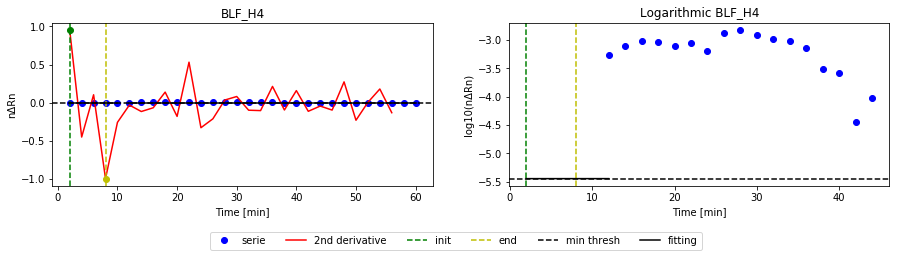


* init (green) = [ 2 , 0.9490126476212081 ]
* end (yellow) = [ 8 , -1.0 ]
* maximum region beggining : x = 12
R^2 value (exp fitting) = -inf

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): NE
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002631C7797B8> parameter values [0.00025337]


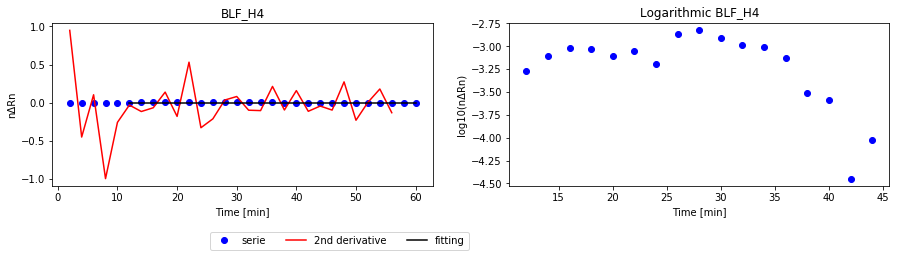

* maximum region beggining : x = 12
No exponential region is defined

Is the start of maximum region appropiate?
(y/n): y


In [75]:
dset_idx = 0
wset_idx = 0

thr_lims, points = rdm.exponential_region(well_sets[wset_idx].dsets[dset_idx], derivative ='forward')

In [76]:
#check current well analysis parameters
rdm.print_list(well_set.wells[5].analysis)

[0] T°m peak has a value of [83.00525673114917, 56341.44639837024] ['T°', 'dF/dT']
[1] max signal has a value of [0.23105563409492497, 71126.765625] 
[2] ['a', 'b', 'N'] has a value of [0.013233006454941841, -1.4344519538122216, 307833.9375] 
[3] Amplification response region has a value of [25, 29, 29] 


In [77]:
points

[[18, 21, 24],
 [14, 19, 22],
 [23, 27, 29],
 [23, 26, 29],
 [16, 18, 22],
 [25, 29, 29],
 [25, 28, 29],
 [27, 29, 29],
 [7, 10, 12],
 [8, 11, 15],
 [7, 10, 12],
 [10, 12, 15],
 [9, 11, 13],
 [9, 11, 14],
 [13, 17, 20],
 [7, 12, 14],
 [11, 14, 18],
 [10, 16, 18],
 [15, 18, 20],
 [15, 17, 19],
 [14, 18, 22],
 [15, 18, 21],
 [12, 15, 18],
 [18, 22, 24],
 [22, 26, 29],
 [21, 25, 28],
 [25, 29, 29],
 [25, 29, 29],
 [-1, -1, 5],
 [-1, -1, 6],
 [-1, -1, 6],
 [-1, -1, 5]]

In [81]:
for i in range(0,len(thr_lims)):
    print(well_set.wells[i].wpos,'is',thr_lims[i])

A1 is [62990.3359375, 174723.8125]
A2 is [49799.078125, 231366.40625]
A3 is [70526.3515625, 173308.78125]
A4 is [69437.921875, 152564.390625]
B1 is [81747.171875, 169513.65625]
B2 is [55537.265625, 71126.765625]
B3 is [67894.703125, 171574.21875]
B4 is [73511.8515625, 117018.7265625]
C1 is [87886.2265625, 159622.125]
C2 is [100889.890625, 150315.734375]
C3 is [72637.6875, 149983.765625]
C4 is [83335.53125, 128125.09375]
D1 is [92511.625, 193963.59375]
D2 is [90267.515625, 182927.640625]
D3 is [87746.7578125, 173281.90625]
D4 is [55495.51953125, 171968.859375]
E1 is [68695.671875, 198648.453125]
E2 is [66760.953125, 237988.09375]
E3 is [77169.859375, 208833.859375]
E4 is [80318.390625, 175224.765625]
F1 is [43508.56640625, 178442.375]
F2 is [65949.171875, 216983.765625]
F3 is [45226.9140625, 149231.8125]
F4 is [68067.9765625, 206080.875]
G1 is [44032.8671875, 173522.046875]
G2 is [41330.3515625, 190802.671875]
G3 is [45396.734375, 53448.171875]
G4 is [39266.390625, 44994.703125]
H1 is [

In [78]:
# compute threshold value selectable range
thr_range = [0,np.inf]

for lim in thr_lims:
    
    inf_lim = lim[0]
    sup_lim = lim[1]
    
    if inf_lim  > thr_range[0]:
        thr_range[0] = inf_lim
    
    if sup_lim  < thr_range[1]:
        thr_range[1] = sup_lim

print('theshold valid range is:',thr_range)

theshold valid range is: [100889.890625, 44994.703125]


Use the lowest possible value:

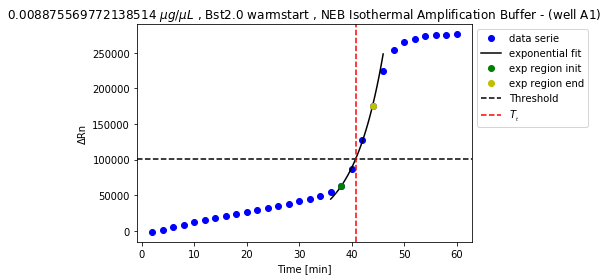

Tt value is: 40.75919412546064


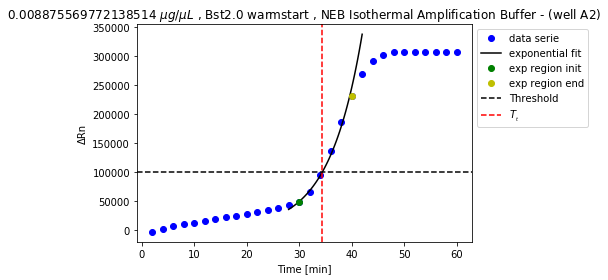

Tt value is: 34.424339880338515


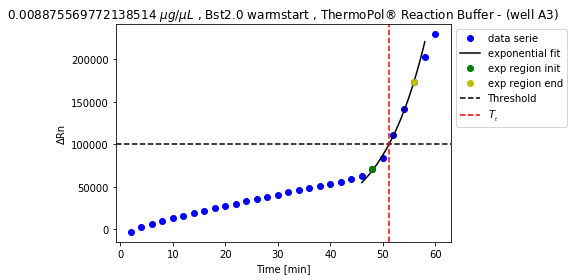

Tt value is: 51.235811386506825


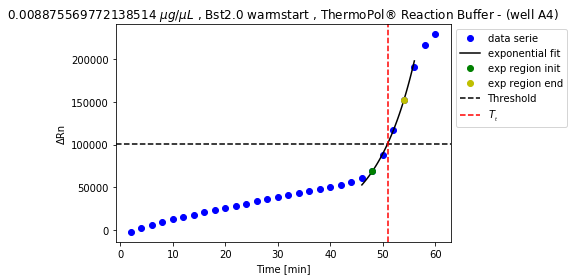

Tt value is: 50.904460870811384


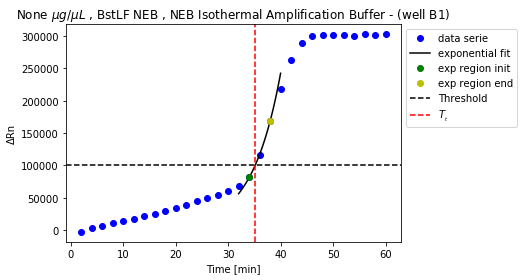

Tt value is: 35.188651882359736


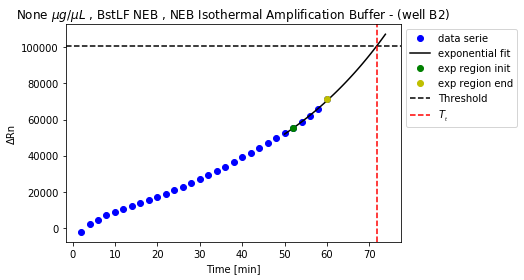

Tt value is: 71.7889098627162


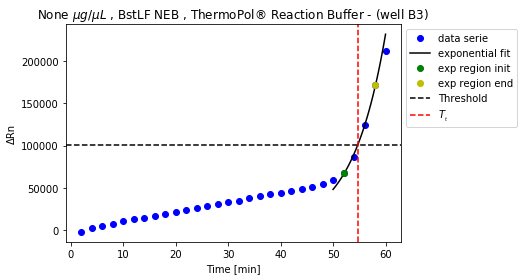

Tt value is: 54.705609068582646


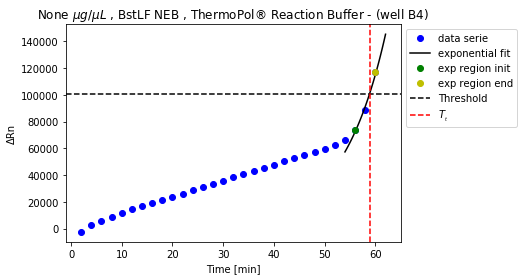

Tt value is: 58.863051647919654


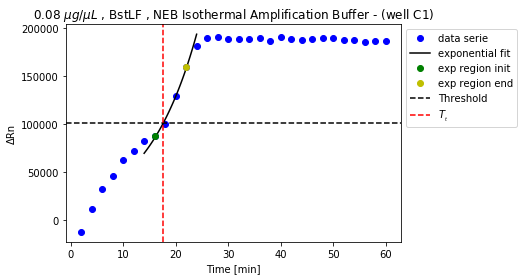

Tt value is: 17.616947641603414


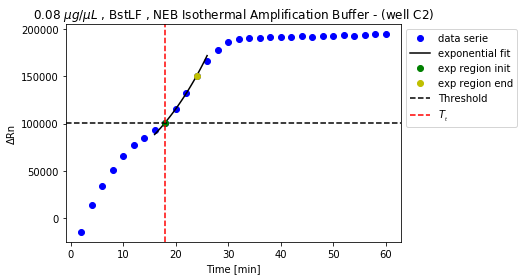

Tt value is: 17.968384830762794


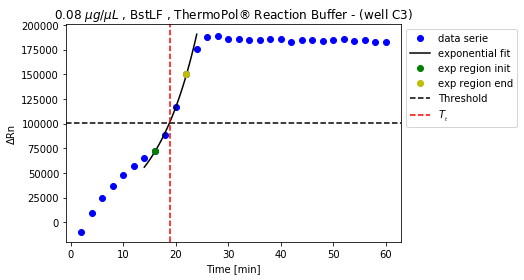

Tt value is: 18.824007396537624


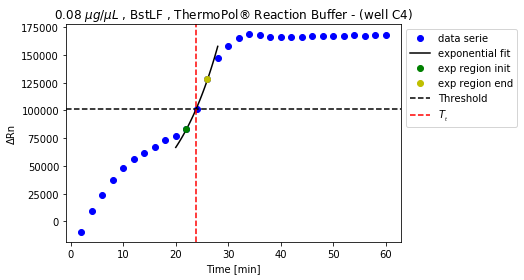

Tt value is: 23.845733958127155


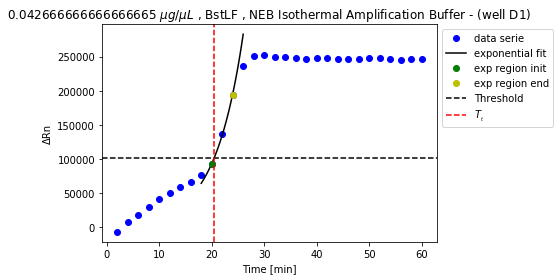

Tt value is: 20.43275905894209


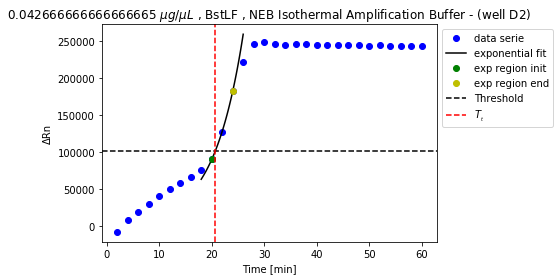

Tt value is: 20.64823706120229


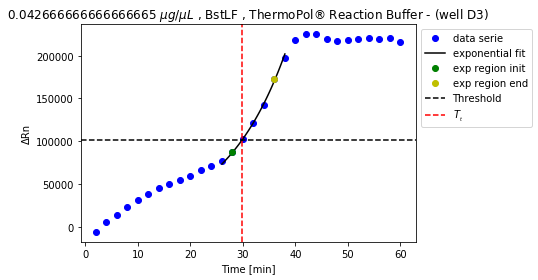

Tt value is: 29.78123629358903


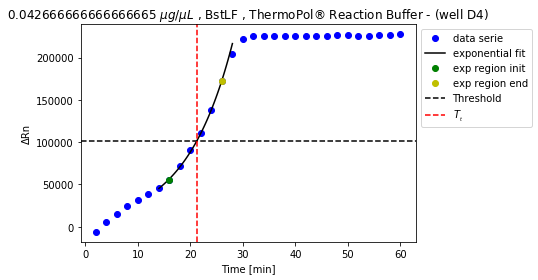

Tt value is: 21.166183930719853


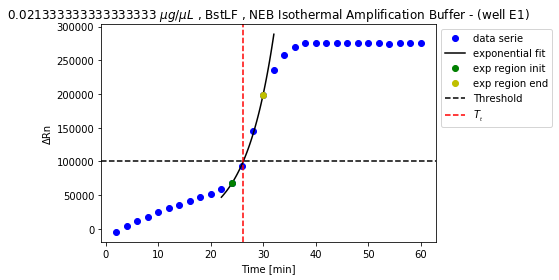

Tt value is: 26.209367865065534


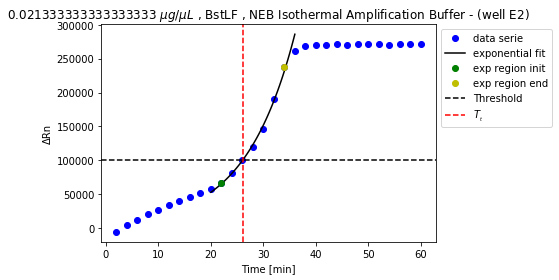

Tt value is: 26.109612698727858


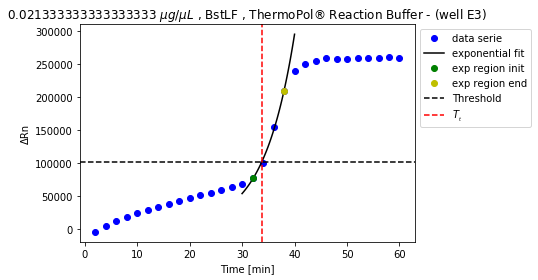

Tt value is: 33.729273562624684


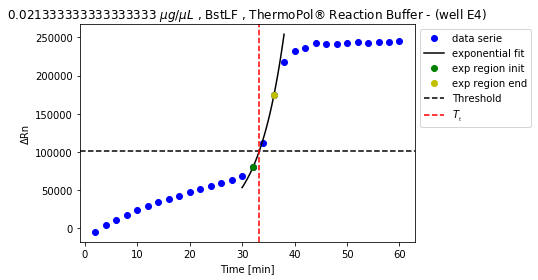

Tt value is: 33.263690392194874


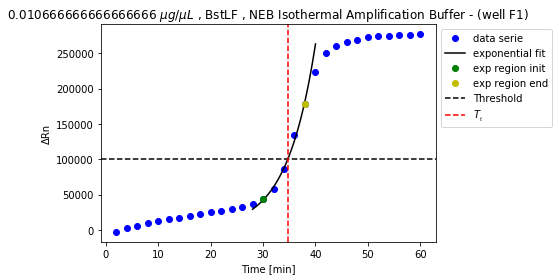

Tt value is: 34.758622982272286


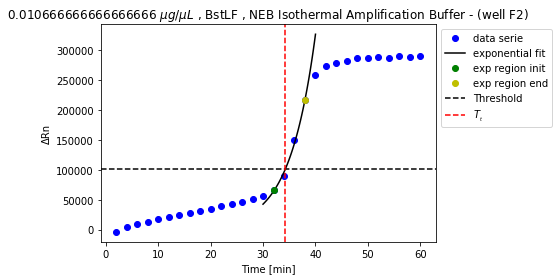

Tt value is: 34.229933356425846


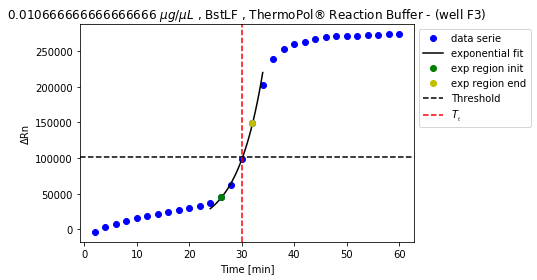

Tt value is: 30.14505878544634


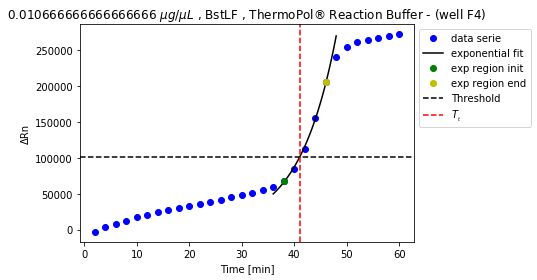

Tt value is: 41.01268906066621


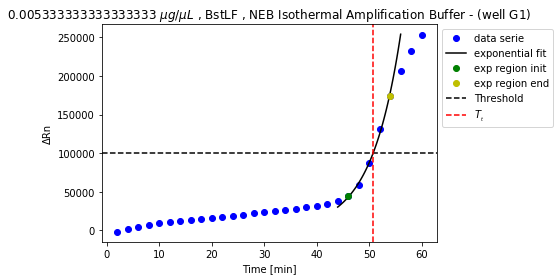

Tt value is: 50.79621910127209


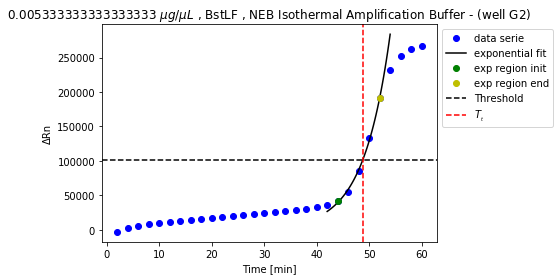

Tt value is: 48.7521503769458


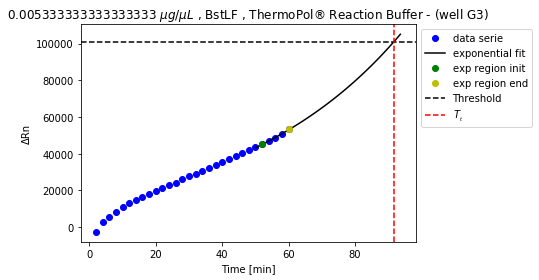

Tt value is: 91.62516596156634


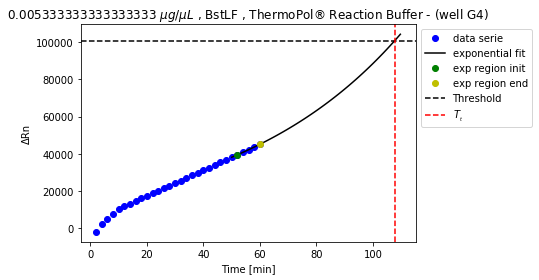

Tt value is: 107.67113271236768


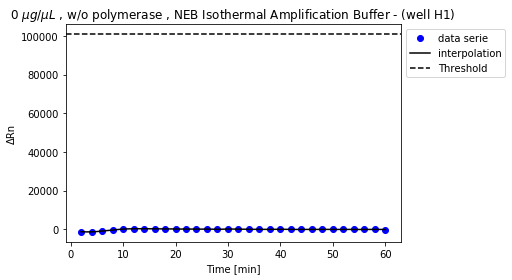

Tt value is: None


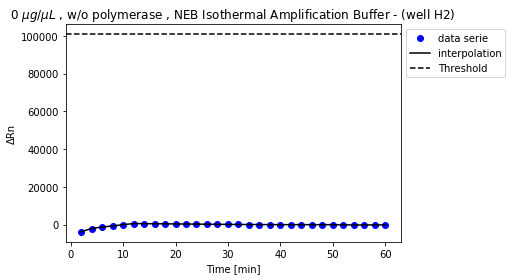

Tt value is: None


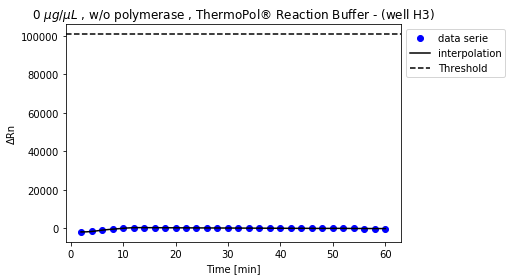

Tt value is: None


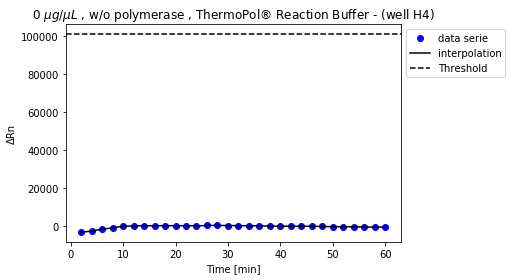

Tt value is: None


In [82]:
thr_value = thr_range[0]
clf_idx = 5
Tt_values, thr_figures = rdm.explore_thr(thr_value, well_sets[wset_idx].dsets[dset_idx], function = rdm.f_10exp_lineal,
           attr_name='exponential', lp_name='Amplification response region', 
           clf = well_sets[wset_idx].clfs[clf_idx] ,save = False)

In [83]:
rdm.print_list(figures)#,title)

[0] 'Amplification data Bst Units R3' figure
[1] 'Bst Units R3 - Melting' figure


32  lines were plotted



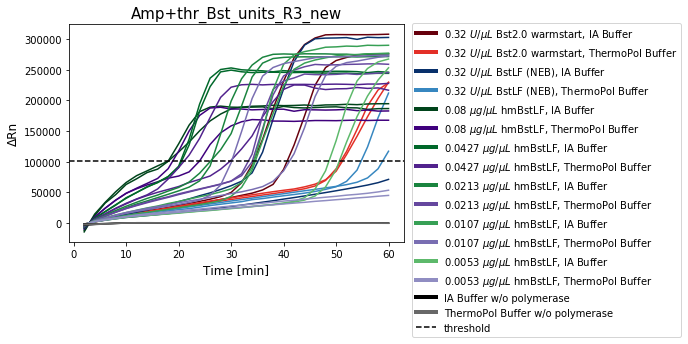

In [84]:
# choose the figure
fig_idx = 0

# copy and add threshold
fig_thr = rdm.copy_figure(figures[fig_idx])
fig_thr.thr_line = thr_value

# indicate the title
fig_thr.title = 'Amp+thr_Bst_units_R3_new'

#display it
rdm.display_figure(fig_thr,filename = 'Real_time_data/Plots/'+fig_thr.title) # )#

if threshold is fine: 
- add it as an attribute to data_set
- store the Tt value <br>

else: <br> 
- define a new threshold



In [85]:
# append the figure to figures and to well_set
figures.append(fig_thr)
well_set.fgs.append(fig_thr)

In [86]:
well_sets[wset_idx].dsets[dset_idx].threshold = thr_value
well_sets[wset_idx].dsets[dset_idx].Tt_values = Tt_values  ## Tt : Threshold time

#### Figure Management

In [ ]:
# then you can display any figure
well_sets[wset_idx].dsets[dset_idx].thr_figures[s_wells[0]][0]
# other way --> thr_figures[s_wells[0]]

In [ ]:
# or save it
fig = well_sets[wset_idx].dsets[dset_idx].thr_figures[s_wells[0]][0]
legend = well_sets[wset_idx].dsets[dset_idx].thr_figures[s_wells[0]][1]
rdm.save_fig('figura_test_save', fig, legend)

### Database update
Finally, store the elements of interest into the database

In [87]:
rdm.print_list(database.list_names)

[0] wells
[1] well_sets
[2] figures
[3] components
[4] reactions
[5] enzymes


In [88]:
## add all the new objects to the database
## .append_obj include only the elements which are not previosly stored in the database
database.append_objs('wells', wells)
database.append_objs('well_sets', well_sets)
database.append_objs('figures', figures)

In [89]:
# update the database
database.save()


there is a previous version of " LAMP_COVID.pkl " file

do you want to update it? (y/n): y

file " LAMP_COVID.pkl " was updated


In [213]:
rdm.print_list(s_wells[0].analysis)

[0] T°m peak has a value of [89.25018808513344, 121542.72322594177] ['T°', 'dF/dT']
[1] max signal has a value of [0.941669367470483, 277658.6874992762] 
[2] ['a', 'b', 'N'] has a value of [0.08485488439785396, -3.770163901672879, 294857.9375] 
[3] Amplification response region has a value of [17, 20, 23] 


The definitive threshold have to be up all the non-template control characteristic value. In case NTC have no step amplification it is just the maximum value reached by them. In case some of them display amplification, then threshold should be up their inferior limit.

In [214]:
rdm.print_list(well_set.clfs)

[0] 'Polymerase concentration in the reaction' classification
[1] 'Polymerase name' classification
[2] 'Buffer' classification
[3] 'Polymerase presence' classification
[4] 'Polymerase name and concentration' classification
[5] 'Polymerase name, concentration and buffer' classification
[6] 'Buffer and polymerase presence/absence' classification


In [96]:
clf_idx = 4  # it has to be the target classification (template/non template classification)
thr_range,sample_thrs,NTC_thrs = rdm.define_thr(well_sets[wset_idx],dset_idx,clf_idx)
#thr_range,sample_thrs,NTC_thrs = rdm.define_thr(well_sets[wset_idx],dset_idx,clf_idx)

41822.55859375
37057.51953125
57208.390625
62511.078125
50193.4765625
55552.2421875
70979.984375


In [97]:
# threshold valid range
thr_range

[99300.9140625, 122120.578125]

Figure saved!


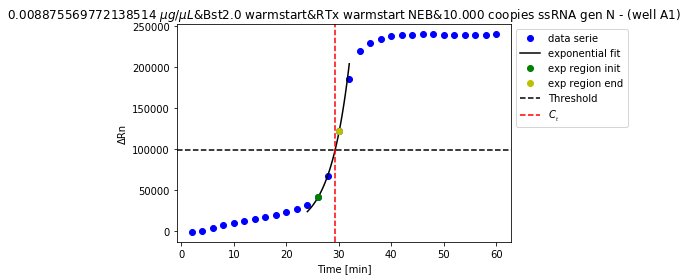

Ct value is: 29.310978371961674
Figure saved!


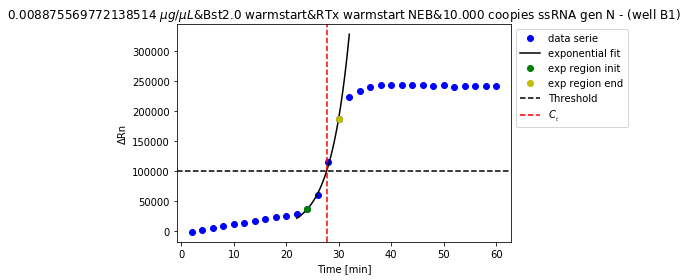

Ct value is: 27.659447754150683
Figure saved!


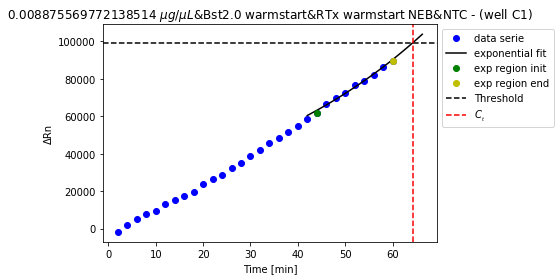

Ct value is: 64.28921956908329
Figure saved!


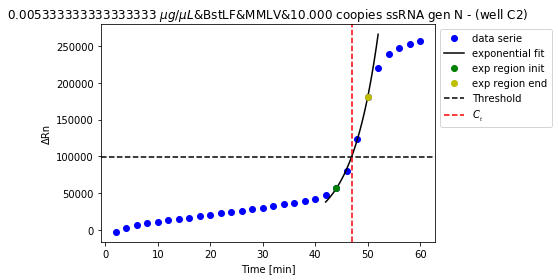

Ct value is: 46.931985964294135
Figure saved!


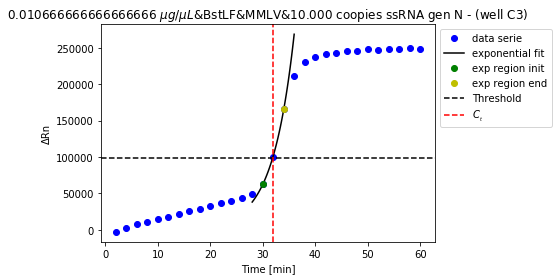

Ct value is: 31.917750091537638
Figure saved!


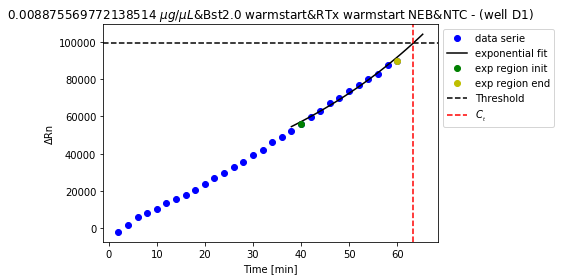

Ct value is: 63.31117625951641
Figure saved!


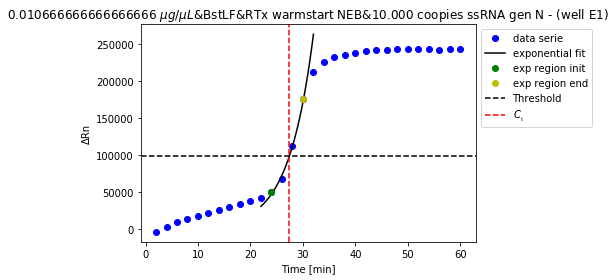

Ct value is: 27.422845957319343
Figure saved!


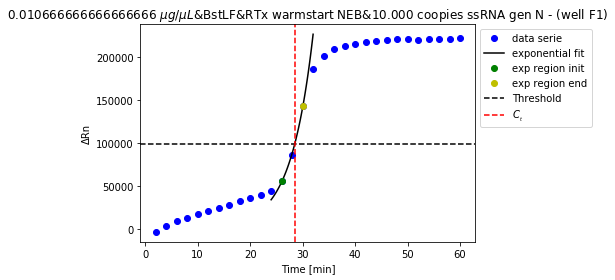

Ct value is: 28.50083374424002
Figure saved!


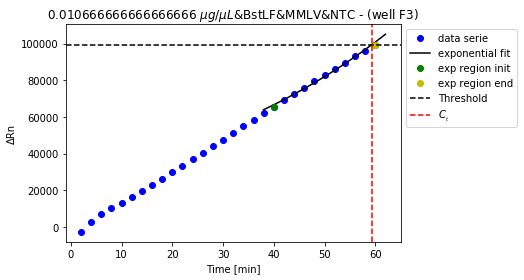

Ct value is: 59.27233463514969
Figure saved!


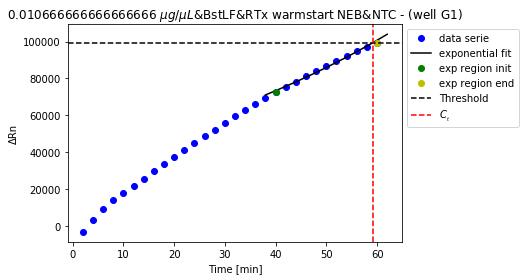

Ct value is: 59.10495833663732
Figure saved!


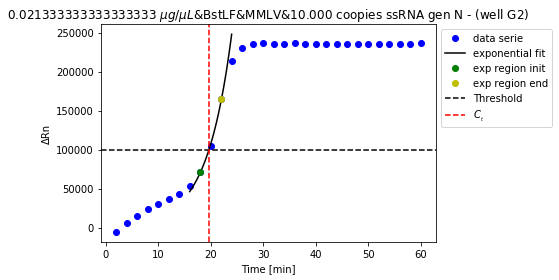

Ct value is: 19.64880699326149
Figure saved!


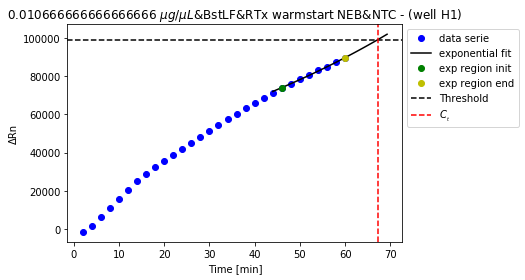

Ct value is: 67.24531311174535


In [99]:
thr_value = thr_range[0]
clf_idx = 7
Tt_values, thr_figures = rdm.explore_thr(thr_value, well_sets[wset_idx].dsets[dset_idx], function = rdm.f_10exp_lineal, 
           attr_name='exponential', lp_name='Amplification response region', 
           clf = well_sets[wset_idx].clfs[clf_idx] ,save = True)

In [100]:
rdm.print_list(figures)#,title)

[0] 'RT-LAMP_test' figure
[1] 'RT-LAMP_test - Melting' figure


12  lines were plotted



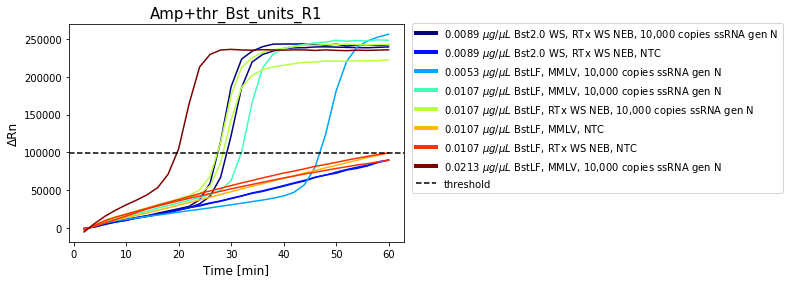

In [101]:
# choose the figure
fig_idx = 0

# copy and add threshold
fig_thr = rdm.copy_figure(figures[fig_idx])
fig_thr.thr_line = thr_value

# indicate the title
fig_thr.title = 'Amp+thr_Bst_units_R1'

#display it
rdm.display_figure(fig_thr)#,filename = 'Real_time_data/Plots/'+fig_thr.title) # )#

if threshold is fine: 
- add it as an attribute to data_set
- store the Tt value <br>

else: <br> 
- define a new threshold



In [102]:
# append the figure to figures and to well_set
figures.append(fig_thr)
well_set.fgs.append(fig_thr)

In [103]:
well_sets[wset_idx].dsets[dset_idx].threshold = thr_value
well_sets[wset_idx].dsets[dset_idx].Tt_values = Tt_values  ## Tt : Threshold time

##### Figure management

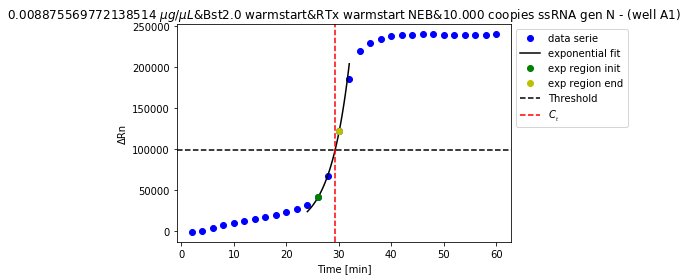

In [104]:
# then you can display any figure
well_sets[wset_idx].dsets[dset_idx].thr_figures[s_wells[0]][0]
# other way --> thr_figures[s_wells[0]]

In [106]:
# or save it
fig = well_sets[wset_idx].dsets[dset_idx].thr_figures[s_wells[0]][0]
legend = well_sets[wset_idx].dsets[dset_idx].thr_figures[s_wells[0]][1]
rdm.save_fig('figura_test_save', fig, legend)

### Database update
Finally, store the elements of interest into the database

In [107]:
rdm.print_list(database.list_names)

[0] wells
[1] well_sets
[2] figures
[3] components
[4] reactions
[5] enzymes


In [125]:
## add all the new objects to the database
## .append_obj include only the elements which are not previosly stored in the database
database.append_objs('wells', wells)
database.append_objs('well_sets', well_sets)
database.append_objs('figures', figures)
database.append_objs('reactions', reactions)

In [126]:
# update the database
database.save()


there is a previous version of " LAMP_COVID.pkl " file

do you want to update it? (y/n): y

file " LAMP_COVID.pkl " was updated


In [207]:
def explore_thr(thr, data_set, function = rdm.f_10exp_lineal, 
               attr_name='exponential', lp_name='Amplification response region',
               clf = None, save = False, ct_label = 'T', int_mode = 'quadratic'):

    """
    It displays the selected threshold value and it associated Threshold_Time(Tt) 
    or Cycle_Threshold (Ct) to evaluate it in detail and decide if it is fine.
    
    Displayed figures are stored as data_set attribute (data_set.thr_figures)
    if save == True, then figures are also exported as pdf in the workspace.
    
    function = function
        function used to approximate the data behaviour and compute Ct.
        * It has to include it's inverse definition to compute Ct.

    attr_name = List or str
        attr name which has the well parameters for function  

    lp_names = List or str
        parameters name of limits of fitted function that will be search in well.param 
        e.g. 'Amplification response region'
    
    clf: Classifcation object
        Classification used in plot titles
    
    save: boolean
        if True, figure is stored
    
    ct_label: string
        Cycle('C') or Time('T') threshold label
    
    int_mode : str
        interpolation kind in interpolate.interp1d
        (e.g.‘linear’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, 
        ‘previous’, ‘next’)
        
    
    """
    
    series = data_set.series
    wells = list(series.keys())
    
    fwells_params = getattr(data_set, attr_name)
    
    
    Cts = dict()       #{well: Tt or Ct value}
    figures = dict()   #{well: [matplotlib figure object, legend]}
    
    for well in wells:
        
        x = series[well].x
        y = series[well].y
        
        fig = plt.figure()
        pd, = plt.plot(x, y, 'bo', label = 'data serie' )
        
        lgd_lines = [pd]
        
        #search the required well parameter values
        for param in well.analysis:
            if param.name == lp_name:
                f_lims = param.value
      
        f_params = fwells_params[well].value
        
        
        if f_params != None:
            
            Ct = function(thr, f_params, inverse = True)
            
            Cts[well] = Ct     
            
            if Ct > x[f_lims[1]]:
                x_fit = np.linspace(x[f_lims[0]-1],Ct+x[0],50)
            
            else:
                x_fit = np.linspace(x[f_lims[0]-1],x[f_lims[1]]+x[0],50)
    
            fx_fit = function(x_fit, f_params)
    
            pf, = plt.plot(x_fit,fx_fit, 'k-', label = 'exponential fit')
            pi, = plt.plot(x[f_lims[0]],y[f_lims[0]],'go', label = 'exp region init')
            pe, = plt.plot(x[f_lims[1]],y[f_lims[1]],'yo', label = 'exp region end')
            
            lgd_lines.append(pf)
            lgd_lines.append(pi)
            lgd_lines.append(pe)
            
        else: #in case there is nt exponential fitting
            
            # Peform and plot an interpolation
            f_amp = interpolate.interp1d(x, y, kind = int_mode)
            x_itp = np.linspace(min(x),max(x),10*len(x))
            y_itp = f_amp(x_itp)
            
            pi, = plt.plot(x_itp, y_itp, 'k-', label = 'interpolation')
            lgd_lines.append(pi)
            
            # Get the "Ct" value
            
            cross = False  #become True if thr cross the serie
            
            # find the neighbour of Ct
            yt_1 = 0
            yt_2 = 0
            
            for yi in y_itp:
                
                if yi > thr:
                    yt_2 = yi
                    cross = True
                    break
                
                yt_1 = yi
            
            if cross == True:
                # Refinate the neighbour and assign Ct
                resolution  = 1000
                
                x_thr = np.linspace(yt_1,yt_2,resolution)
                y_thr = f_amp(x_thr)
                
                Ct = 0
                
                for i in range(0,resolution):
                    yi = y_thr[i]
                    
                    if yi > thr:
                        break
                    
                    Ct = yi    #use the inferior nearest element
            else:
                Ct = None
            
            

        ph = plt.axhline(thr , color='k', ls ='--', label = 'Threshold')
        lgd_lines.append(ph)
        
        if Ct != None:
            
            pct = plt.axvline(Ct, color='r', ls ='--', label = '$'+ct_label+'_{_t}$')
        
            lgd_lines.append(pct)
        
        if clf != None:
            
            for cls in clf.classes:
                if cls in well.caths:
                    title = cls.value
                    #title = clf.labels[cls]
                    spacer = cls.spacer
                    
                    if spacer != None:
                        title = title.replace(spacer,' , ')
                    title = title + ' - (well ' + str(well.wpos) +')'
                        
        else:
            title = str(well.s_name) + str(well.wpos)

        plt.title(title)
        plt.xlabel(str(data_set.x_name) + ' ['+str(data_set.x_units)+']')
        plt.ylabel(data_set.y_name)
        
        
        ax_lgd = [1 , 1]
        #axpos = plt.gca().get_position(original=False)
        #ax_lgd = [1 , axpos.y0-0.3]
        #ax_lgd = [axpos.x0 + axpos.width , axpos.y0 + axpos.height]
        
        lgd = plt.legend(handles = lgd_lines, loc='upper left',
                         bbox_to_anchor=ax_lgd)
                         #bbox_to_anchor=ax_lgd, ncol=len(lgd_lines) )#[1.01, 0.9])   
        
        figures[well] = [fig,lgd]   # add the figure and legend to the dictionary
        
        if save:
            print('Figure saved!')
            
            fname = str(well.s_name)+'('+str(well.wpos)+')'+"_thr"
            rdm.save_fig(fname, fig, lgd)

        plt.show()
        
        print(ct_label+'t value is: '+str(Ct))
    
    setattr(data_set,'thr_figures', figures)
    
    return(Cts, figures)

In [201]:

def exponential_region(data_set, 
                   p_name = 'Amplification response region', 
                   p_description = 'x vector index of exponential response region of the well amplification data',
                   derivative = 'forward',
                   save = False):
    #Data_set(name, group_names, wells, series, x_name, y_name, x_units, y_units, y_max, threshold)
    """
    This function let you identify the exponential region of each dataset togheter 
    the maximum signal value
    Using this information retrieves an aproximation to the whole Well_set threshold limits.
    
    Parameters
    ----------
    data_set = Data_set object with list of values series inside it
                and all the related information
                e.g. data_set.series[0] is a data serie.
    
    p_name = str 
        name with which save the response region limits Parameter object in each well
    
    p_description = str
        description Parameter object created
    
    derivative = second derivate mode. Integer
                could be {'forward','central','backward'}
    save: Boolean
        if True, each figure is saved in the workspace
        
    Return
    ------
    thr_limits : list
        It has [min_threshold, max_threshold], were those values are the max
        ans min admisible thresholds
        
    rr_limits: list
        each element is a list with the vector index of the limits points
        of response region. [init_exponential, end_exponential, init_max]
    
    """
    def response_reg_plot(x, y, ddx, ddy, p1, p2, p3, title, data_set, save = False):
        
        fig = plt.figure()
        plt.figure(figsize=(15,3))
        #### amplification plot #####
        
        fig1 = plt.subplot(121)
        plt.title(title)
        plt.ylabel('n'+str(data_set.y_name))
        
        xlabel = str(data_set.x_name)
        
        if data_set.x_units != '':
            xlabel = xlabel + ' ['+ str(data_set.x_units) + ']'
        
        plt.xlabel(xlabel)
        
        
        ## plot the functions ##
        l1, = plt.plot(x,y,'bo', label = 'serie')
        l2, = plt.plot(ddx ,ddy,'r-', label = '2nd derivative')
        
        lgd_lines = [l1,l2]    # to build the legend        
        
        ## plot the limits ##
        if p1[0] != -1  and p2[0] != -1 :
            
            xG = x[p1[0]]
            
            xY = x[p2[0]]
            
            # as ddy is shorther, it's necessary to be sure it's on range
            if p1[1] >= len(ddy):
                yG = ddy[-1]
            else:
                yG = ddy[p1[1]]  
            
            
            if p2[1] >= len(ddy):
                yY = ddy[-1]
            else:
                yY = ddy[p2[1]]
            
            plt.plot(xG,yG,'go')
            lG = plt.axvline(xG,color='g', ls ='--', label = 'init' )
            
            plt.plot(xY,yY,'yo')
            lY =plt.axvline(xY,color='y', ls ='--', label = 'end' )
            
            ## threshold line ##
            yp1 = y[p1[0]]
            lt = plt.axhline(yp1, color='k', ls ='--', label = 'min thresh' )
            
            lgd_lines.append(lG)
            lgd_lines.append(lY)
            lgd_lines.append(lt)
        
        ## maximum signal linear fit line ##  
        x_step = (x[1]-x[0])
        
        if p3 == -1:
            # when user input -1 --> y maximum value is used
            
            m_fit = [np.max(y)]
            p3 = np.argmax(y)

            x_m_fit = [ x[p3]-x_step/2 , x[p3] , x[p3]+x_step/2 ]
            y_m_fit =  m_fit[0] * np.ones(len(x_m_fit))
            
        else:

            len_remaining = len(x) - (p3) ## how many points remain for this fitting
                    
            if len_remaining > 1:
                
                max_slope = 0   # to force it be a flat line
                
                m_fm, m_fit, R2 = rdm.function_fit(np.asarray(x), y, init = p3, end =':', 
                              func = lambda x, b: rdm.f_linear(x, max_slope, b), 
                              p_start=[0.5],param_bounds=([-np.inf],[1.5]), 
                              display = False)
                                
                x_m_fit = m_fm[0]
                y_m_fit = m_fm[1]
            
            else:
                # len_remaining == 1
                
                m_fit = [y[-1]]
                x_m_fit = [ x[p3]-x_step/2 , x[p3] , x[p3]+x_step/2 ]
                y_m_fit = m_fit[0] * np.ones(len(x_m_fit))
        
        mf, = plt.plot(x_m_fit,y_m_fit, 'k-', label = 'fitting')
        
        ### Log plot ###
        plt.subplot(122)
        
        log10y = np.log10(y)
        
        plt.plot(x, log10y,'bo', label = 'serie')
        
        # other plot settings
        plt.title('Logarithmic ' + str(title))
        plt.ylabel('log10('+'n'+str(data_set.y_name)+')')
        plt.xlabel(xlabel)
        
        #plt.plot(x,y,'bo', label = 'serie')
        #plt.axhline(yp1, color='k', ls ='--', label = 'min thresh' )
        
        if p1[0] != -1  and p2[0] != -1:
            
            plt.axvline(xG,color='g', ls ='--', label = 'init' )
            plt.axvline(xY,color='y', ls ='--', label = 'end' )
            
            ### fit a line to the log(response region) ###
            print('exponential fit')
            
            exp_0 = p1[0]
            
            #replace "nan" values with a number 1 order of magnitud lower than min
            log10y[np.isnan(log10y)]= np.nanmin(log10y)-1
             
            
            l_fit_log, pl_log, R2 = rdm.function_fit(x, log10y,init = exp_0, end =p2[0]+1, p_start= [0.5,-2], 
                             param_bounds=([0,-np.inf],[np.inf,0]), display = False)
            
            # define the limits to display it #
            init = p1[0]-2
            if init < 0:
                init = 0
            
            end = p2[0]+3
            if end > len(x):
                end = len(x)
            
            # create the line #
            x_line = x[init:end]
            #print(x_line)
            
            l_log = rdm.f_linear(x_line, pl_log[0], pl_log[1])
            
            # plot it
            plt.plot(x_line, l_log, 'k-')
            
            ####
            
            # plot trhehold 
            plt.axhline(log10y[p1[0]], color='k', ls ='--', label = 'min thresh' )
                    
        
            ## exponential region fitting display ##
            exp_params = [pl_log[0], pl_log[1], 1]
            
            if end == len(x):
                exp_x_vals = x_line
            else:
                exp_x_vals = x_line[0:-1]
                
            exp_fit = rdm.f_10exp_lineal(exp_x_vals, exp_params)
            ef, = fig1.plot(exp_x_vals,exp_fit, 'k-', label = 'fitting')
            
            lgd_lines.append(ef)
        
        else:
            lgd_lines.append(mf)
            pl_log = None      # No exponential parameters
        
        ## create the figure legend ##
        lgd = fig1.legend(handles = lgd_lines, loc='upper left', 
                         bbox_to_anchor=(0.4, -0.25), ncol=len(lgd_lines))   
        
        
        if save:
            print('Figure saved!')
            
            fname = str(well.s_name)+'('+str(well.wpos)+')'+"_exp"
            rdm.save_fig(fname, fig, lgd)
        
        plt.show()
        
        if p1[0] != -1 and p2[0] != -1:
            print('\n* init (green) = [',xG,',',yG,']')
            print('* end (yellow) = [',xY,',',yY,']')
            print('* maximum region beggining : x =',x[p3])
            print('R^2 value (exp fitting) =', R2)
        
        else:
            print('* maximum region beggining : x =',x[p3])
        
        return(m_fit[0], pl_log)  #return fited parameters of interest
    
    ########################################
    
    ########################################
    ### initiate the elements to return ###
    
    rr_limits = []  # list of vector point index of response region limits
    thr_limits = []   # list threshold limits of each well
    
    # to define the whole set threshold limits
    #thr_min = 0         
    #thr_max =np.inf
    
    # to build the dataset attributes
    max_params = dict()
    exp_params = dict()
    wthr_params = dict()
    
    # initalize the point indexs of response region limits #
    p1 = []
    p2 = []
    
    # compute the maximum signal value in the dataset --> used for normalization
    
    wells = data_set.series.keys()
    
    y_max_all = max([max(data_set.series[well].y) for well in wells ])   
    
    ##############################
    ### start dataset analysis ###
    for well in wells:
        
        serie = data_set.series[well]
        x = np.asarray(serie.x)
        y = np.asarray(serie.y)
        
        
        delay = 0  # variable to correct the x range for the derivatives
        
        if derivative == 'forward':    
            delay = 0
            
        elif derivative == 'central':
            delay = 1
            
        elif derivative == 'backward': 
            delay = 2
        
        else:
            # in case of other input,default (forward) is used
            delay = 0
        
        ddy= (y[0:-2]+y[2:]-2*y[1:-1])/4   # second derivative
        ddx = x[0+delay:-2+delay]          # x range corrected
        
        ## normalization to ]-inf,1]  ##
        
        #norm_val = y.max()    # -> normlized by the maximum of each serie
        norm_val = y_max_all   # -> normlized by the maximum of all series in data_set
        ny = y/norm_val   
        
        #nddy = ddy/ddy.max()
        ddymax = max(ddy.max(),abs(ddy.min()))  # --> take the maximum absolute value
        nddy = ddy/ddymax
        
        # then use the 2nd derivative as approximation

        # second derivative min and max indexs
        p1_ddy = np.where(ddy== ddy.max())[0][0]        # ddy maximum point
        p2_ddy = np.where(ddy== ddy[p1_ddy:].min())[0][0]  # ddy minimum point after the maximum

        # serie data min and max index
        p1_y = p1_ddy + delay   # the derivative value is used to correct the index.
        p2_y = p2_ddy + delay

        p3 = p2_y + 2      #  default plateu region beggining
        while p3 >= len(x):  # check to be inside boundaries
            p3 = p3 - 1
        
        ## check if there is a previous versión of the parameters ##
        if serie.well.analysis:
            for parameter in serie.well.analysis:
                if parameter.name == p_name:
                    
                    print('\nThere is a stored '+str(p_name)+'\n')
                    print('\n** if you change it, this version will be replaced **\n')
                    
                    p1s_y = parameter.value[0]
                    p2s_y = parameter.value[1]
                    p3s = parameter.value[2]
                    
                    #check to be inside superior boundary
                    if p1s_y <= len(x):
                        p1_y = p1s_y
                        
                        # correct the index because 2nd derivative range is shorter
                        p1_ddy = p1_y - delay
                    
                    else:
                        print('Stored P1 value out of boundaries. New value was computed')
                    
                    if p2s_y <= len(x):
                        p2_y = p2s_y
                        
                        # correct the index because 2nd derivative range is shorter
                        p2_ddy = p2_y - delay
                    
                    else:
                        print('Stored P2 value out of boundaries. New value was computed')
                    
                    if p3s <= len(x):
                        p3 = p3s
                    
                    else:
                        print('Stored P1 value out of boundaries. New value was computed')
        
        # plotting setting
        xp = x
        yp = ny
        ddxp = ddx
        ddyp = nddy
        p_title = serie.name+'_'+ well.wpos
        
        p1 = [p1_y, p1_ddy] 
        p2 = [p2_y, p2_ddy]
        
                
        LF_params = response_reg_plot(xp, yp, ddxp, ddyp, p1, p2, p3, p_title, data_set)
        
        ##confirm the result and iterate
        
        if p1[0] != -1  and p2[0] != -1:
            print('\nAre the min and max values appropiate to the exponential region?')
            print('(NE: No Exponential region)')
            time.sleep(.1)
            confirm = input('(y/n/NE): ')
        
        else:
            print('There is no exponential region. Is it correct?')
            time.sleep(.1)
            confirm = input('(y/n): ')

        while not (confirm == 'y' or confirm == 'Y' or confirm == 'NE'):             

            plt.close()
            
            valid = False
            while valid == False:
                user_p1 = int(input('enter new x position of green line: '))#(current x ='+str(x_ymax) +' ): '))
                user_p2 = int(input('enter new x position of yellow line: '))# (current x ='+str(x_ymin) +' ): '))
                
                try:
                    u_p1_y = np.where(xp == user_p1)[0][0]
                    u_p2_y = np.where(xp == user_p2)[0][0]
                    
                    valid = True
                    
                except:
                    print('\nvalue(s) out of range, posible values are:\n')
                    print(xp)
                    print('\n')
                

            p1 = [u_p1_y, u_p1_y - delay] 
            p2 = [u_p2_y, u_p2_y - delay]

            LF_params = response_reg_plot(xp, yp, ddxp, ddyp, p1, p2, p3, p_title, data_set)

            print('\nare the new values appropiate?')
            confirm = input('(y/n/NE): ')
    
        if confirm == 'NE':
            
            p1[0] = -1  
            p2[0] = -1
            
            LF_params = response_reg_plot(xp, yp, ddxp, ddyp, p1, p2, p3, p_title, data_set)
        
        ##confirm the result of maximum region and iterate
        
        print('\nIs the start of maximum region appropiate?')
        time.sleep(.1)
        confirm = input('(y/n): ')

        while not (confirm == 'y' or confirm == 'Y'):             

            plt.close()
            
            valid = False
            while valid == False:
                
                user_p3 = int(input('enter new x start position: '))#(current x ='+str(x_ymax) +' ): '))

                
                if user_p3 == -1:
                    
                    p3 = user_p3
                    valid = True
                    
                else:
                    try:
                        p3 = np.where(xp == user_p3)[0][0]
                        valid = True

                    except:
                        print('\nvalues out of range, posible values are:\n')
                        print(xp)
                        print('\n')

            LF_params = response_reg_plot(xp, yp, ddxp, ddyp, p1, p2, p3, p_title, data_set)

            print('\nis the new value appropiate?')
            confirm = input('(y/n): ')
        
        ###### linear fits parameters assignation ####
        
        m_s = LF_params[0]
        max_signal = [m_s, m_s*norm_val]
        
        try:
            exp_linear = [LF_params[1][0], LF_params[1][1], norm_val]
        
        except:
            exp_linear = LF_params[1] 
        
        ## create the parameter objects
        maxS_name = "max signal"
        maxS_descrip = "maximum signal value [normalized, original]"
        maxS_p = rdm.Parameter(maxS_name, maxS_descrip, units = '', value=max_signal, properties='')
        
        exp_name = ['a','b','N']
        exp_descrip = "linear exponent parameters 'a','b', and the normalization parameter 'N'. \
        f(x) = N*10^(a*x+b)"
        exp_p = rdm.Parameter(exp_name, exp_descrip, units = '', value=exp_linear, properties='')
        
        ## add them to the dictionary
        max_params[well] = maxS_p
        exp_params[well] = exp_p


        ## Assign them
        rdm.well_param_assignation(maxS_p, serie.well, ask = False)
        rdm.well_param_assignation(exp_p, serie.well, ask = False)
        
        ###################################
        ### Assign the determined range values as "parameter" in 'analysis' attribute of well object

        p_value = [p1[0],p2[0],p3]  # vector index of response region points
        
        rr_parameter = rdm.Parameter(p_name, p_description, units = '', value=p_value, properties='') 
        
        rdm.well_param_assignation(rr_parameter, serie.well, ask = False)

        rr_limits.append(p_value) # create a list with the parameters

        ###################################
        ## evaluate the threshold limits
        if p1[0] != -1  and p2[0] != -1:
            y_rr_min = y[p1[0]]        #get the value of the function in the initial rr point
            y_rr_max = y[p2[0]]        #get the value of the function in the final rr point
        
        else:
            y_rr_min = np.amin(y)       
            y_rr_max = np.inf
        
        well_thrs = [y_rr_min, y_rr_max]
        ############
        thr_limits.append(well_thrs)
        
        # make it a parameter to assign to dataset
        wthr_name = "well threshold limits"
        wthr_descrip = "well threshold limits [thr_min, thr_max]"
        wthr_p = rdm.Parameter(wthr_name, wthr_descrip, units = '', value=well_thrs, properties='')
        wthr_params[well] = wthr_p 
    
    # assign the data_set attibutes
    setattr(data_set, 'max_signal', max_params)  # strore it as a data_set attribute 
    setattr(data_set, 'exponential', exp_params)  # strore it as a data_set attribute
    setattr(data_set, 'wthr_lims', wthr_params)  # strore it as a data_set attribute 
    setattr(data_set, 'y_max', y_max_all)  # store it as a data_set attribute

    return(thr_limits, rr_limits) 


In [24]:
classifications = list()    # create a list to store the classifications

In [25]:
#if it's fine, append to the classification list or replace someone
classifications.append(classification)
#classifications[-1] = classification

With `create_dataset` you are able to create sets of data for plotting. It allos you to further reduce the group by selecting just some desired labels (or sub labels) and/or some reduced list of wells.<br>
In the simplest way, just input the created classification

In [26]:
data_sets = list()

In [27]:
data_sets.append(rdm.create_dataset(classification))
#Amplification data BstLF Units R3

enter a name for the dataset: amplification
choose the data to use: 

[ 0 ] Amplification data

input the number: 0

" Amplification data " was selected

current series are: 

[ 0 ] Cycle
[ 1 ] ΔRn

choose x data index: 0

choose y data index: 1


Now you can properly define a figure and create it as an object.<br>
if there is already some figures, you can copy one of them with `copy_figure` and modify just some attributes afterwards.

In [6]:
wells = database.elements['wells']

In [8]:
s_wells = rdm.select_objects(wells, 'fname',['Bst_Units_3_data.xlsx'])

32 objects were selected based on ['fname'] attribute


In [33]:
for well in s_wells:
    n_value =  "Home made Isothermal Amplification Buffer (HM-IAB)"
    n_attribute = 'buffer'
    
    attr_to_new(well,'B2','s_name',n_attribute, n_value, ask = True)
    #print(well.s_name)


There is a previous version of buffer for A1 from Home made BstLF units estimation - rep 3 experiment in Bst_Units_3_data.xlsx file

It will be replaced. Please confirm (y/n): y

Attribute assigned

There is a previous version of buffer for A2 from Home made BstLF units estimation - rep 3 experiment in Bst_Units_3_data.xlsx file

It will be replaced. Please confirm (y/n): y

Attribute assigned

There is a previous version of buffer for B1 from Home made BstLF units estimation - rep 3 experiment in Bst_Units_3_data.xlsx file

It will be replaced. Please confirm (y/n): n
Old attribute version was keep and the new lost

There is a previous version of buffer for B2 from Home made BstLF units estimation - rep 3 experiment in Bst_Units_3_data.xlsx file

It will be replaced. Please confirm (y/n): y

Attribute assigned

There is a previous version of buffer for C1 from Home made BstLF units estimation - rep 3 experiment in Bst_Units_3_data.xlsx file

It will be replaced. Please confirm (y/n):

In [293]:
plt.get_cmap('Greens_r')(np.linspace(0, 1, 5))

array([[0.        , 0.26666667, 0.10588235, 1.        ],
       [0.13817762, 0.54608228, 0.27132641, 1.        ],
       [0.45767013, 0.76991926, 0.46502115, 1.        ],
       [0.78316032, 0.91483276, 0.75589389, 1.        ],
       [0.96862745, 0.98823529, 0.96078431, 1.        ]])

In [295]:
plt.get_cmap('jet')(np.linspace(0, 1, 5))

array([[0.        , 0.        , 0.5       , 1.        ],
       [0.        , 0.50392157, 1.        , 1.        ],
       [0.49019608, 1.        , 0.47754586, 1.        ],
       [1.        , 0.58169935, 0.        , 1.        ],
       [0.5       , 0.        , 0.        , 1.        ]])

In [ ]:
['BstHMD1','BstHMDE','BstHMDO','BstHMD20']

In [28]:
figures=list()  #create a list to store figure elements

In [30]:
#Data_serie(x, y, well_name, group, well_pos, well_idx)
#Data_set(set_name, group_names, idxs, series, x_name, y_name, x_units, y_units)
#Figure(data_set, colors, title, x_text, y_text, ax_tsize, x_lim, y_lim, lgd_text, lgd_lines, log_scale, thr_line )

#parameters to create a figure:
dataset_index = -1                 # data_set object index used in the figure
f_ds = data_sets[dataset_index]    
ds_group_names = f_ds.group_names    # data_set groups names
f_title = "RT-LAMP_test"
f_xtext = f_ds.x_name
f_ytext = f_ds.y_name
f_ax_text_size = 12
f_x_lim = None
f_y_lim = None
f_log_scale = False          # True or False
f_lgd_text = ds_group_names
f_color_list = list()        #initiate here and fill after define the lines colors
f_lgd_lines = list()         #initiate here and fill after define the lines colors


#####################################
# define color vectors for lines
#####################################

color_groups = ['Bst2','BstHM']
extras_name = 'Others'   # to indicate and display lines not indicated in color_groups --> it is important as a check!
color_groups.append(extras_name)

cmap_names = ['Blues_r','Reds_r','Greens_r','Greys_r']  # it has to be same lenght as color_groups + extra name
# to get a list of color available color maps, run this: list(plt.cm.datad.keys())

#### cathegorize the ds_group_names into a color_group #####

col_g_dic = {}

for g_name in color_groups:
    
    col_g_dic[g_name] = []
    

for ds_g_name in ds_group_names:   #each group name in dataset group names
    catergorized = False
    
    for g_name in color_groups:

        if g_name in ds_g_name: #if this color_group is part of this data_set group name

            col_g_dic[g_name].append(ds_g_name)
            catergorized = True   #--> to inidcate it was categorized
            break    # to cathegorize just one time
        
    if catergorized == False:
        # if isn´t in any group, it's categorized as "others group"

        col_g_dic[extras_name].append(ds_g_name)

print("color groups are: \n")
print(col_g_dic)


########## create colors vectors ###########

grouped_colors = {}
for c_group, cmap in zip(color_groups, cmap_names):
    grouped_colors[c_group] = plt.get_cmap(cmap)(np.linspace(0, 1, 2*len(col_g_dic[c_group]))) # 2*len() to avoid too light colors

line_colors = {}
for c_group in list(col_g_dic.keys()):
    group_names = col_g_dic[c_group]
    for i in range(0,len(group_names)): 
        line_colors[group_names[i]] = grouped_colors[c_group][i]

##### Define the color list #####
# this is a particular assignation way for this plot

for serie in f_ds.series:
    f_color_list.append(line_colors[serie.group])
 ## --> this way they are in the same order as the serie elements.

#####################################
# Finally, create the legend lines ##

#this is a particular definition for this plot
for txt in f_lgd_text:
    line = Line2D([0], [0], color = line_colors[txt], lw=4)
    f_lgd_lines.append(line)    
    
"""
if you want to make just one line legend for each color_groups:
f_lgd_text = color_groups
for txt in f_lgd_text:
    line = Line2D([0], [0], color = grouped_colors[txt], lw=4)
    f_lgd_lines.append(line)
"""
#######################################
###### create the figure element ###### 

figures.append(rdm.Figure(f_ds, f_color_list, f_title, f_xtext, f_ytext, f_ax_text_size, f_x_lim, f_y_lim , f_lgd_text, f_lgd_lines, f_log_scale))
#figures[-1] = (rdm.Figure(f_ds, f_color_list, f_title, f_xtext, f_ytext, f_ax_text_size, f_x_lim, f_y_lim , f_lgd_text, f_lgd_lines, f_log_scale))


color groups are: 

{'Bst2': ['Bst2+RTx'], 'BstHM': ['BstHM16+MML32', 'BstHM32+MMLV32', 'BstHM64+MMLV32'], 'Others': []}


7  lines were plotted



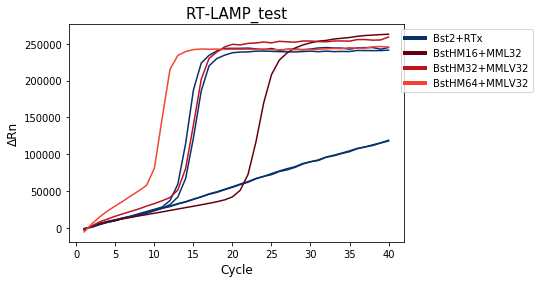

In [31]:
fig_idx = -1
rdm.display_figure(figures[fig_idx],filename = 'Real_time_data/Plots/'+figures[fig_idx].title) # )#

### Define dataset threshold

Here is convenient to understimate a bit the minimal value in each set because the dataset threshold will be $>=$ of that value


There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.12181804 -2.13000483]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99995373e-08 8.76368608e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.14922651 -3.52564495]


D:\Github\BstLF\rt_module\rt_data_manage.py:1222: RuntimeWarning: invalid value encountered in log10
  
D:\Github\BstLF\rt_module\rt_data_manage.py:1231: RuntimeWarning: invalid value encountered in log10
  plt.axvline(xY,color='y', ls ='--', label = 'end' )


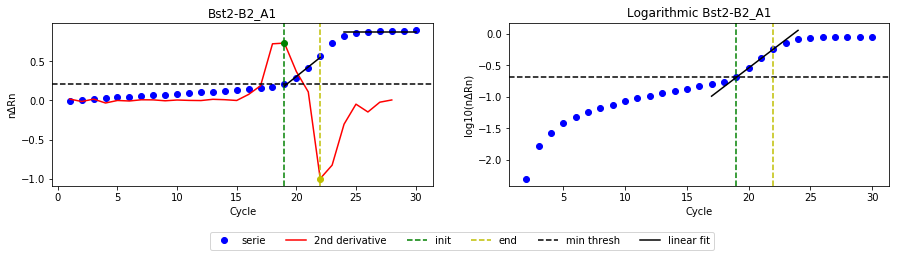


* init (green) = [ 19 , 0.7336738636194778 ]
* end (yellow) = [ 22 , -1.0 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.12167447 -1.71527308]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.98620925e-08 9.90093435e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.13858742 -2.86985909]


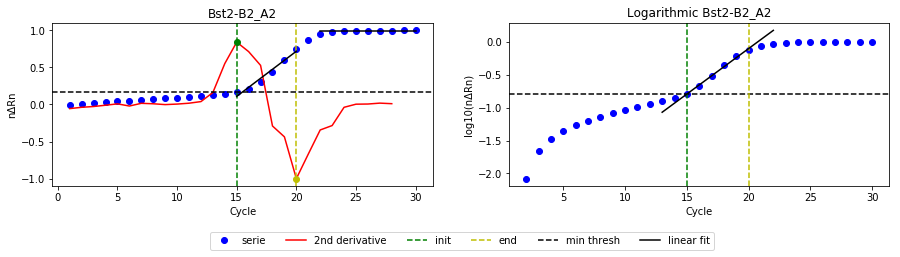


* init (green) = [ 15 , 0.8413716077314437 ]
* end (yellow) = [ 20 , -1.0 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.08536551 -1.84187283]
fitted <function f_linear at 0x000001A07B29F158> parameter values [5.68961855e-08 7.45678442e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.1005916  -3.06141502]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


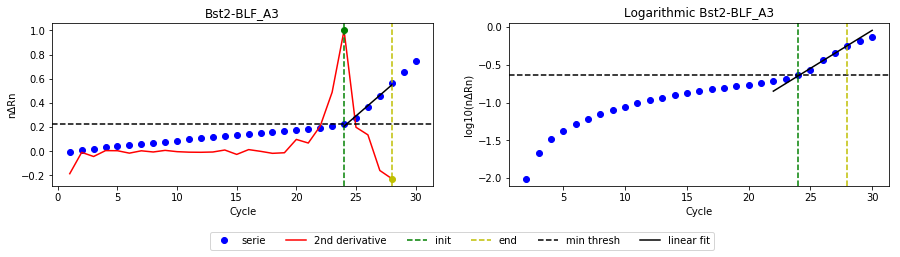


* init (green) = [ 24 , 1.0 ]
* end (yellow) = [ 28 , -0.22596307535500013 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.09025473 -1.95485514]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.90337803e-08 7.24123347e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.11470213 -3.40389384]


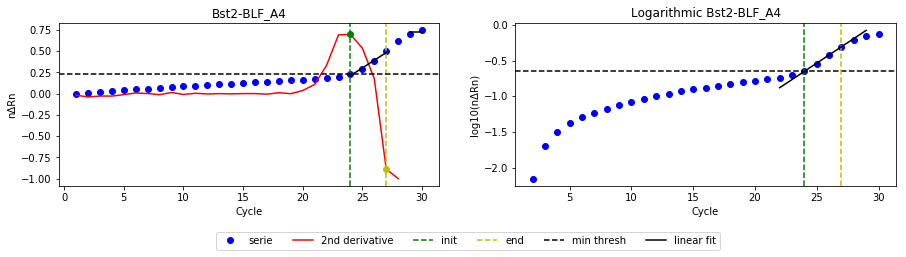


* init (green) = [ 24 , 0.6954756283103213 ]
* end (yellow) = [ 27 , -0.8870088185672431 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.14255492 -2.16884181]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99883260e-08 9.63600401e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.15836598 -3.27081147]


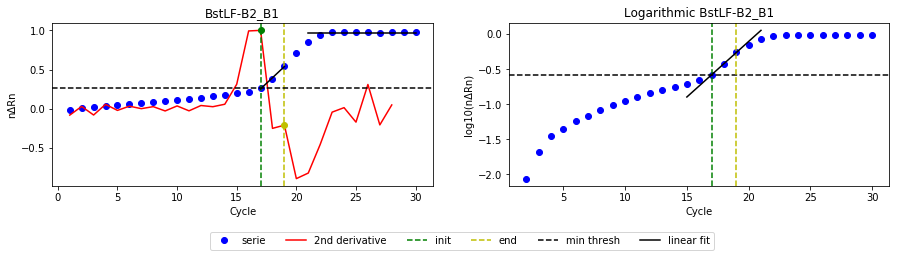


* init (green) = [ 17 , 1.0 ]
* end (yellow) = [ 19 , -0.20724423543572273 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.01244151 -0.14501982]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.02646601 -1.43445194]


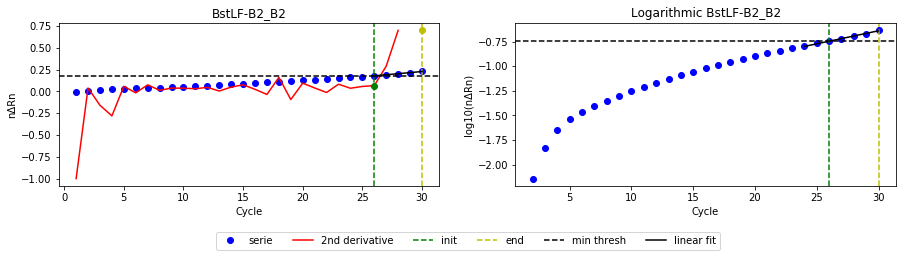


* init (green) = [ 26 , 0.0663925085467968 ]
* end (yellow) = [ 30 , 0.7001858916836868 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.11329055 -2.75020915]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.13652832 -4.21890133]


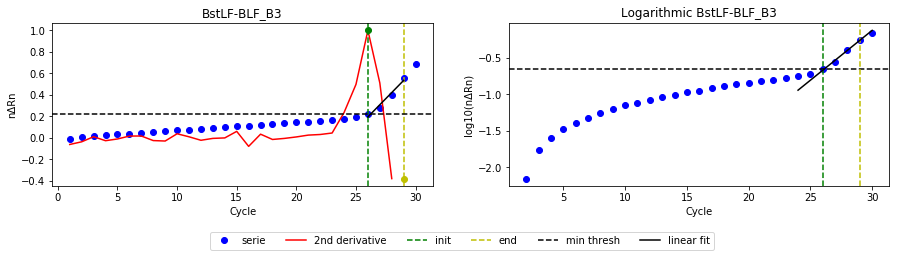


* init (green) = [ 26 , 1.0 ]
* end (yellow) = [ 29 , -0.3782815441741699 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.05410093 -1.26141545]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.08170965 -2.89119762]


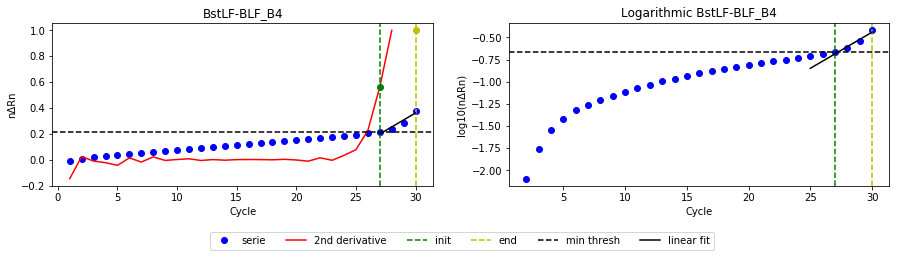


* init (green) = [ 27 , 0.563685839146603 ]
* end (yellow) = [ 30 , 1.0 ]

Are the min and max values appropiate to the response region?
(y/n): n
enter new x position of green line: 28
enter new x position of yellow line: 30
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.07066614 -1.74732835]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.100949   -3.45555204]


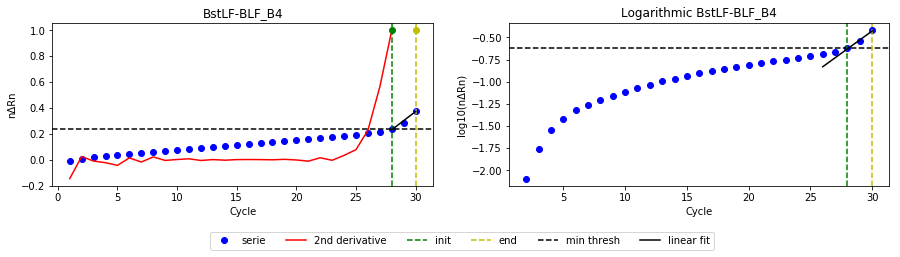


* init (green) = [ 28 , 1.0 ]
* end (yellow) = [ 30 , 1.0 ]

are the new values appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.07914348 -0.36435715]
fitted <function f_linear at 0x000001A07B29F158> parameter values [6.61884873e-17 6.11514608e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.08855764 -1.26452654]


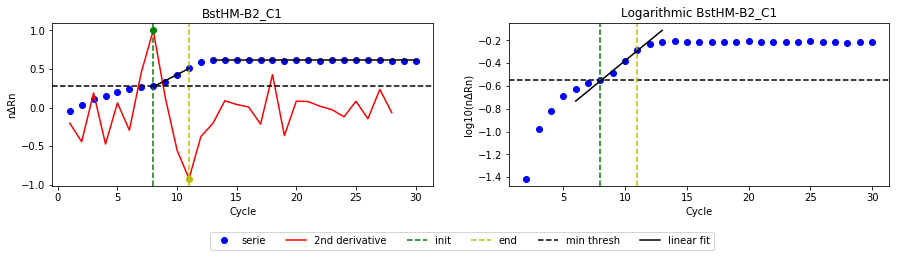


* init (green) = [ 8 , 1.0 ]
* end (yellow) = [ 11 , -0.9207048721210058 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.05344124 -0.15592652]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.9999881e-08 6.2054220e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.0576465  -1.00237605]


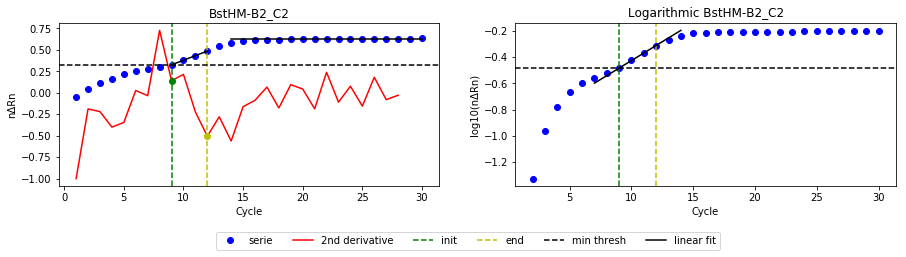


* init (green) = [ 9 , 0.13977050508659494 ]
* end (yellow) = [ 12 , -0.5054024136203987 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.08470229 -0.45684687]
fitted <function f_linear at 0x000001A07B29F158> parameter values [3.07021112e-19 6.00308383e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.10666684 -1.4884175 ]


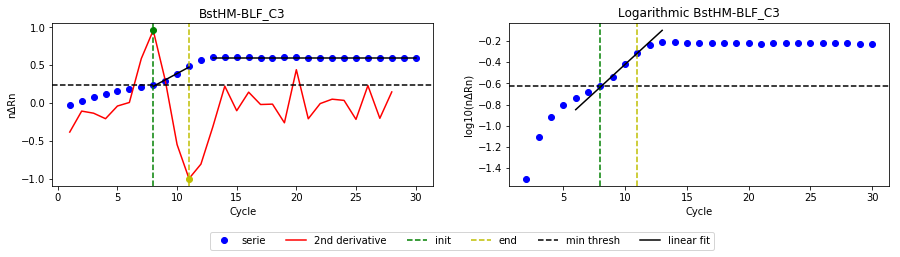


* init (green) = [ 8 , 0.9610946330982297 ]
* end (yellow) = [ 11 , -1.0 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.07274955 -0.53455807]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.97762736e-08 5.40670360e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.093402   -1.59808841]


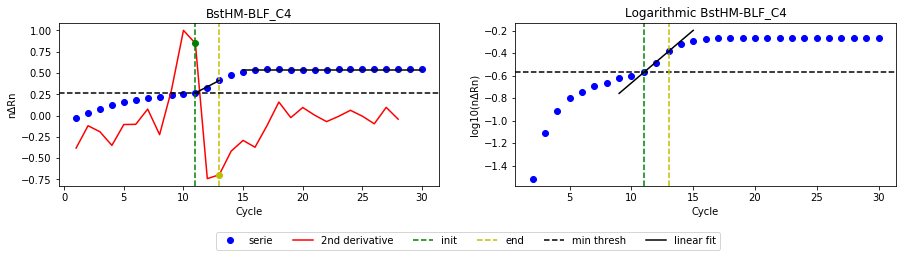


* init (green) = [ 11 , 0.8471452675741615 ]
* end (yellow) = [ 13 , -0.6952196912693527 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.1647836  -1.35446328]
fitted <function f_linear at 0x000001A07B29F158> parameter values [2.50122199e-17 8.05006055e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.16076197 -2.12687412]


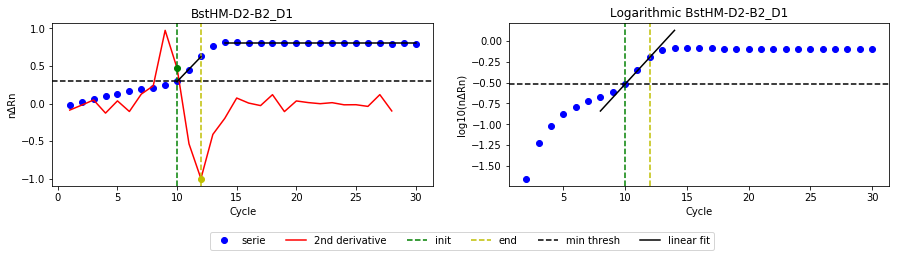


* init (green) = [ 10 , 0.4696273285714762 ]
* end (yellow) = [ 12 , -1.0 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.15050343 -1.22190201]
fitted <function f_linear at 0x000001A07B29F158> parameter values [2.77692299e-17 7.96608226e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.15337395 -2.06791967]


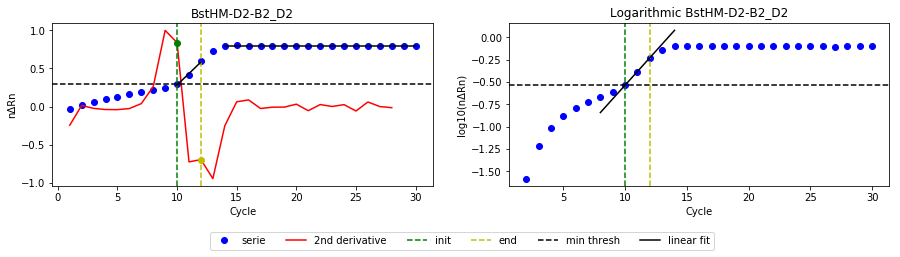


* init (green) = [ 10 , 0.8382340760374389 ]
* end (yellow) = [ 12 , -0.696956508921013 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.06849243 -0.68907133]
fitted <function f_linear at 0x000001A07B29F158> parameter values [8.45260426e-19 7.14788714e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.07337322 -1.57704151]


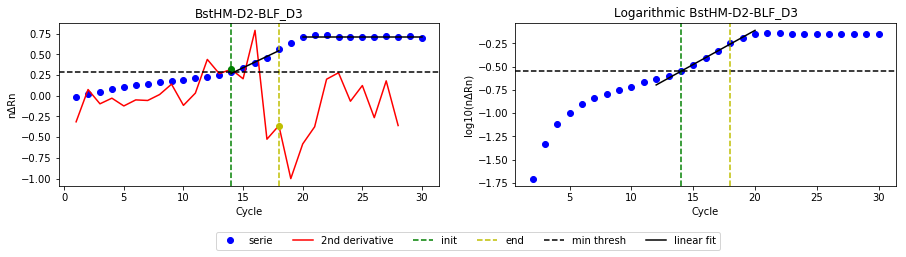


* init (green) = [ 14 , 0.3194118469359977 ]
* end (yellow) = [ 18 , -0.3602615321605588 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.07441899 -0.43590807]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.92595340e-08 7.33433394e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.09709929 -1.51207958]


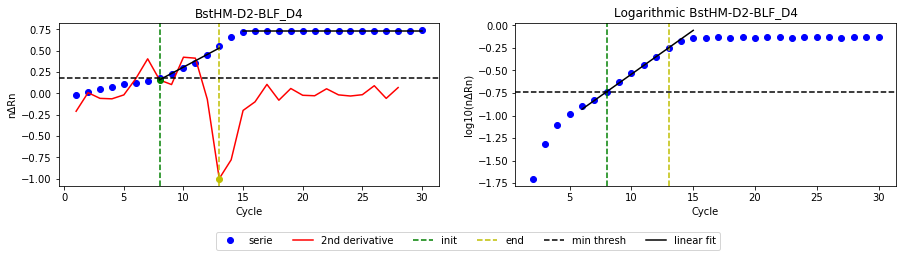


* init (green) = [ 8 , 0.1575811522454799 ]
* end (yellow) = [ 13 , -1.0 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.14351164 -1.52707118]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99987398e-08 8.89213593e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.15761121 -2.54991388]


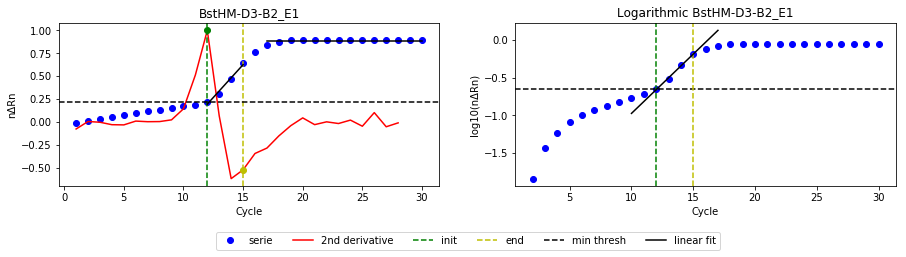


* init (green) = [ 12 , 1.0 ]
* end (yellow) = [ 15 , -0.5228109979829298 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.10049616 -0.983299  ]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99854972e-08 8.79353888e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.09322867 -1.70550483]


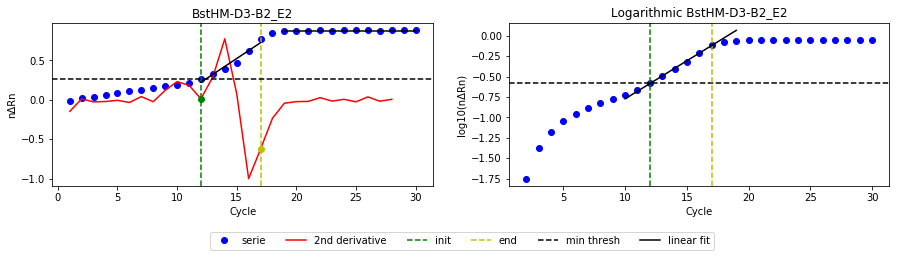


* init (green) = [ 12 , 0.014153381969414944 ]
* end (yellow) = [ 17 , -0.6245883742917215 ]

Are the min and max values appropiate to the response region?
(y/n): n
enter new x position of green line: 11
enter new x position of yellow line: 17
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.09034818 -0.82769659]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99854972e-08 8.79353888e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.09149344 -1.67889793]


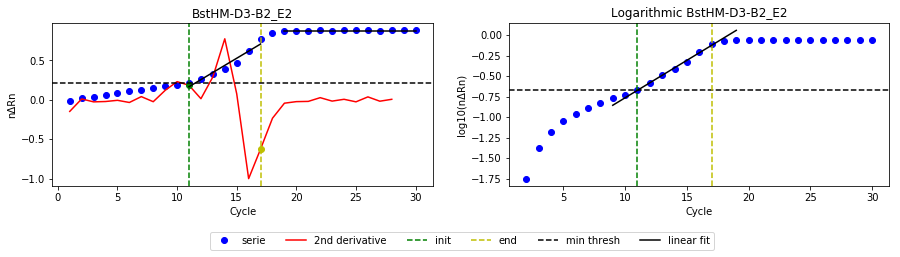


* init (green) = [ 11 , 0.18426656540920117 ]
* end (yellow) = [ 17 , -0.6245883742917215 ]

are the new values appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.14586377 -2.11450215]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99998289e-08 8.36049548e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.14850853 -2.98901132]


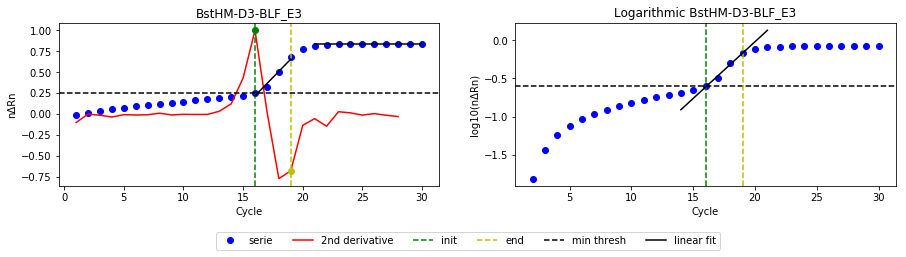


* init (green) = [ 16 , 1.0 ]
* end (yellow) = [ 19 , -0.6756503338844715 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.1541519  -2.22231425]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.86418942e-08 7.84336184e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.16939025 -3.30174118]


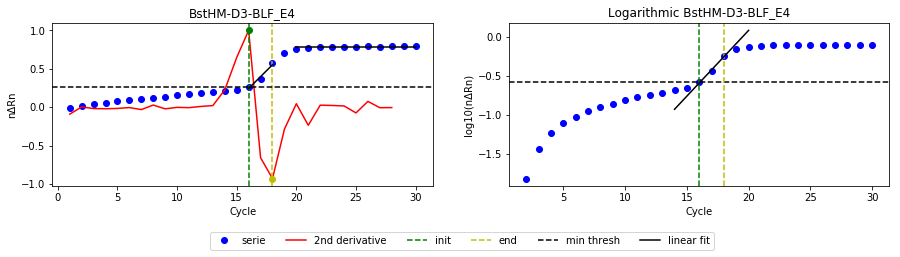


* init (green) = [ 16 , 1.0 ]
* end (yellow) = [ 18 , -0.9288206369893781 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.11242341 -1.58600022]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99998334e-08 8.76158217e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.15896825 -3.24722759]


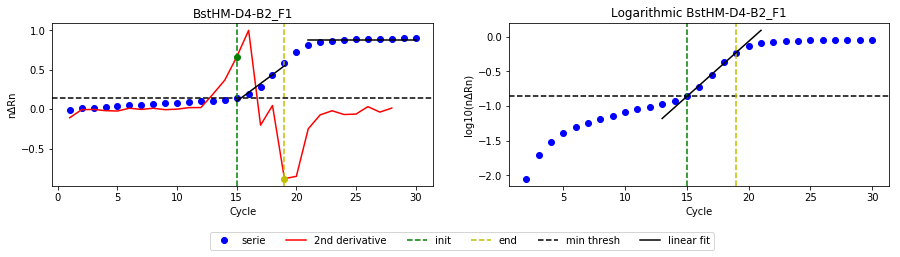


* init (green) = [ 15 , 0.6630716038647586 ]
* end (yellow) = [ 19 , -0.8813076139194591 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.16640716 -2.48718355]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99932568e-08 9.27642550e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.17699424 -3.51371944]


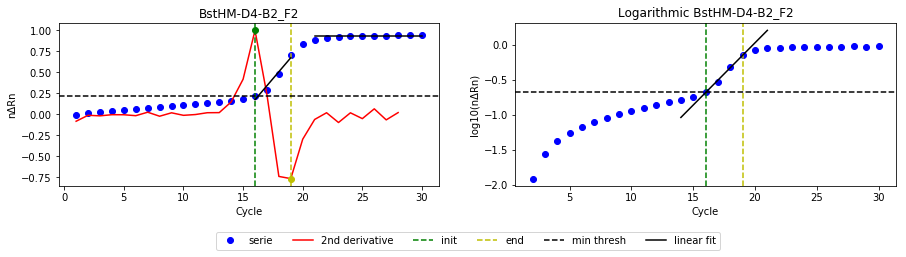


* init (green) = [ 16 , 1.0 ]
* end (yellow) = [ 19 , -0.7633857854327751 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.1131691  -1.35297141]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99999699e-08 8.63835876e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.17560926 -3.13134456]


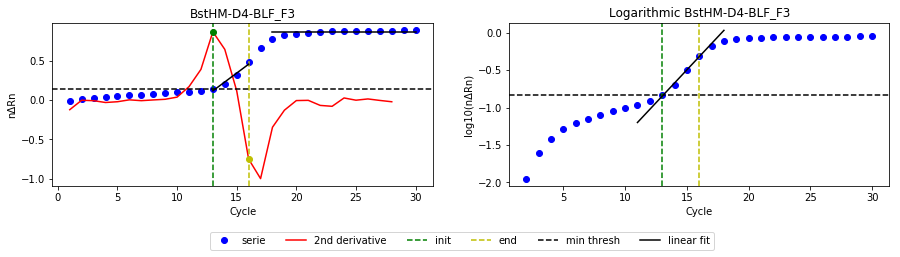


* init (green) = [ 13 , 0.8708004747935215 ]
* end (yellow) = [ 16 , -0.7513690386536647 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.11258138 -1.95637133]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99996136e-08 8.61339885e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.12245497 -2.99557267]


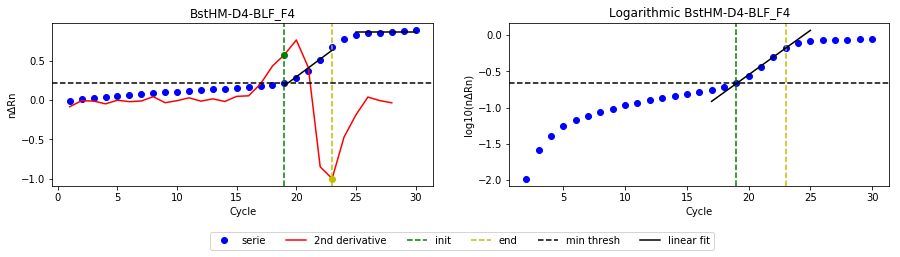


* init (green) = [ 19 , 0.5754512116670095 ]
* end (yellow) = [ 23 , -1.0 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.10787433 -2.3750892 ]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.62081335e-08 7.89551208e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.15420925 -4.40109224]


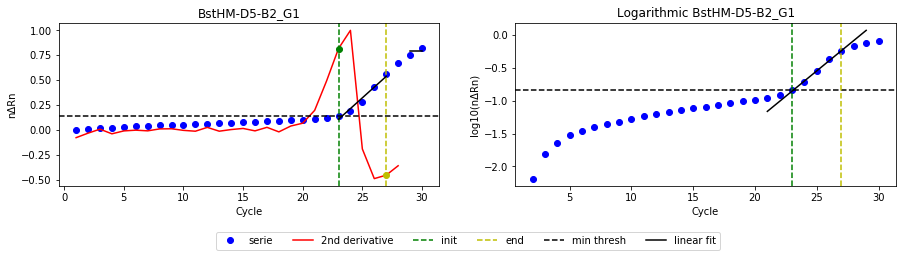


* init (green) = [ 23 , 0.8166841717365313 ]
* end (yellow) = [ 27 , -0.4553941566095086 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.12263592 -2.61412234]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99994199e-08 8.46761224e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.17122298 -4.65821306]


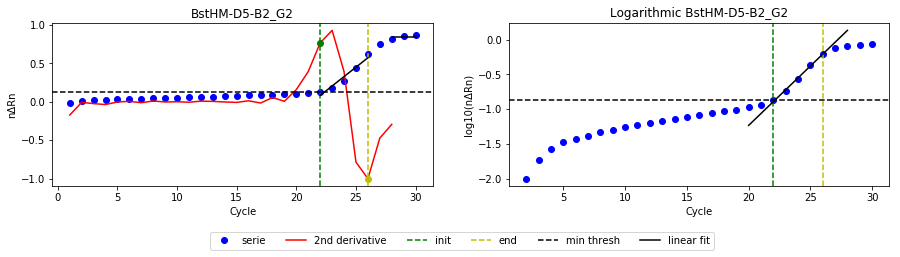


* init (green) = [ 22 , 0.7685625823331103 ]
* end (yellow) = [ 26 , -1.0 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.00650227 -0.02302686]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.01767101 -1.29402326]


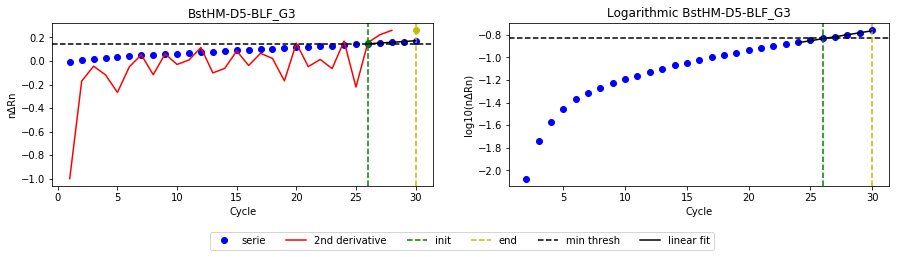


* init (green) = [ 26 , 0.156639369603198 ]
* end (yellow) = [ 30 , 0.26046647062629863 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [0.00462294 0.00757645]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.0146793  -1.27473733]


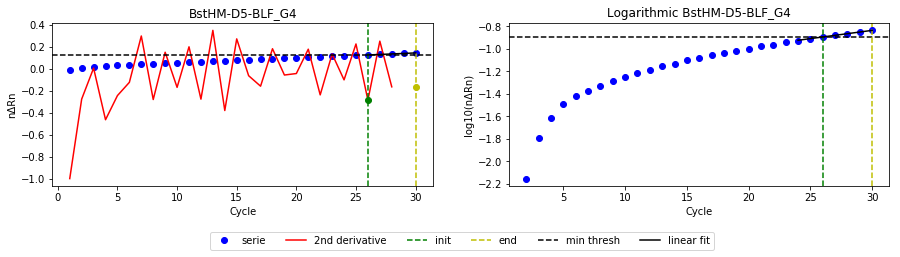


* init (green) = [ 26 , -0.28469492812886255 ]
* end (yellow) = [ 30 , -0.1629890770692562 ]

Are the min and max values appropiate to the response region?
(y/n): y


In [42]:
dataset_idx = 0
thr_lims, points = rdm.exponential_region(data_sets[dataset_idx], derivative ='forward')

Know it's time to define the the threshold value. It should be between the limits defined in the previous step (`thr_lims`).<br>
A first approach is to define it as `thr_lims[0]` but it could anyone

In [43]:
thr_lims

[100889.890625, 44994.703125]

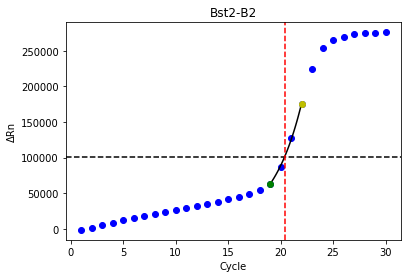

Ct value is: 20.379597063080066


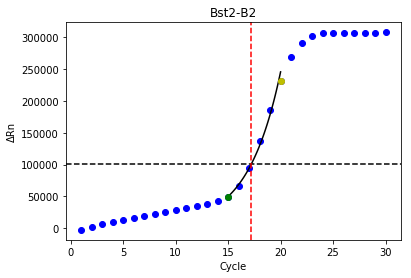

Ct value is: 17.212169940101333


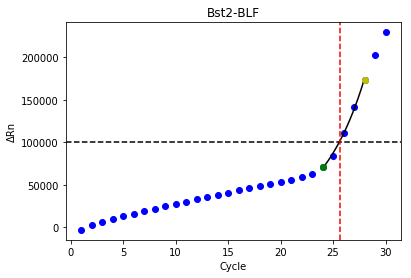

Ct value is: 25.617905706153493


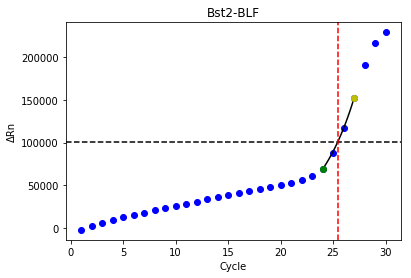

Ct value is: 25.45223043536747


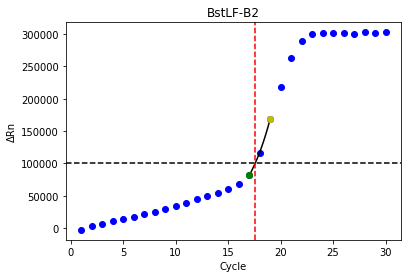

Ct value is: 17.594325941833088


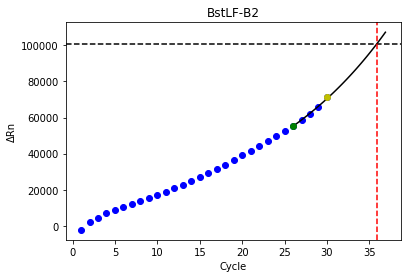

Ct value is: 35.894455062007296


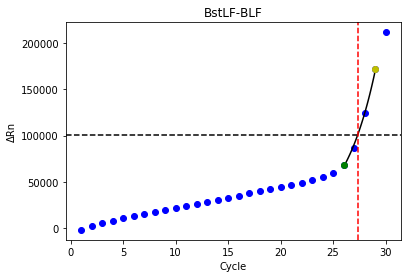

Ct value is: 27.352804534398537


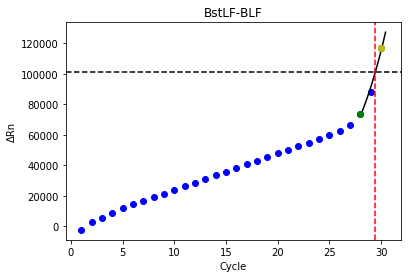

Ct value is: 29.43152582620138


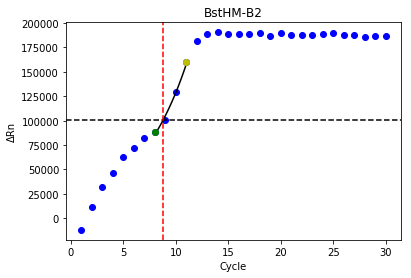

Ct value is: 8.808473870541775


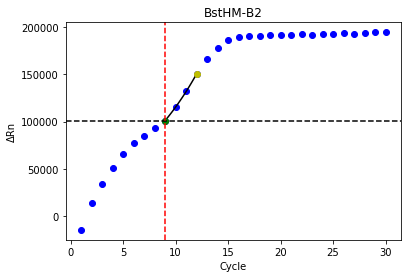

Ct value is: 8.984192417040198


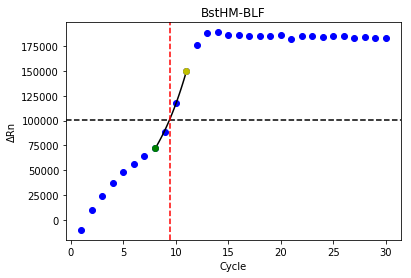

Ct value is: 9.412003698409917


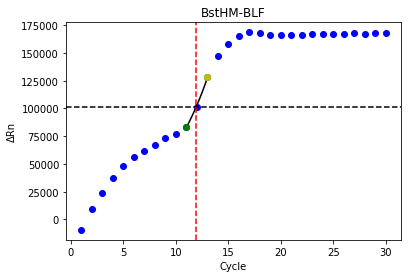

Ct value is: 11.92286698017417


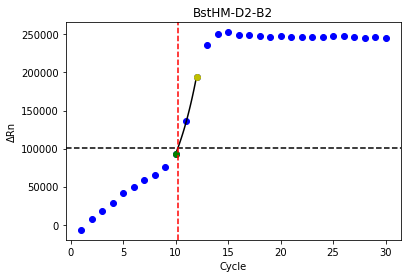

Ct value is: 10.216379574940754


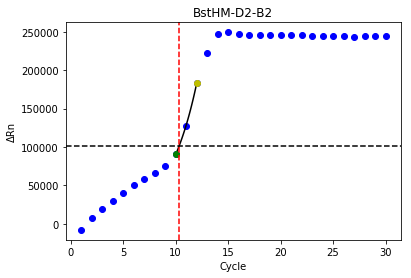

Ct value is: 10.324118629169401


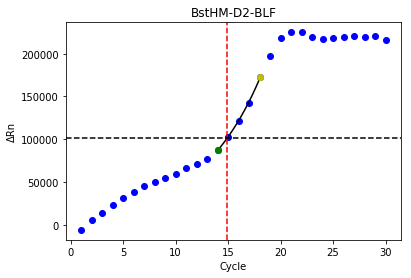

Ct value is: 14.890618145800815


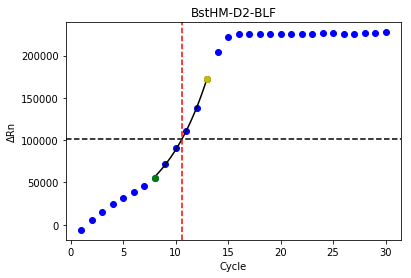

Ct value is: 10.583091965177081


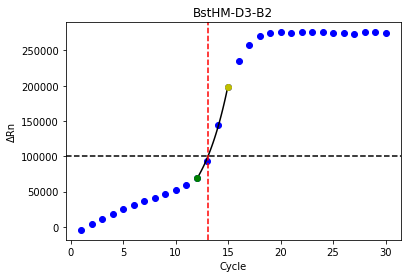

Ct value is: 13.104683938569547


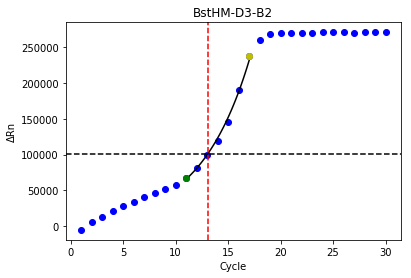

Ct value is: 13.054806315017485


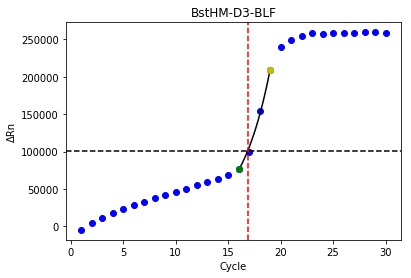

Ct value is: 16.864636787960126


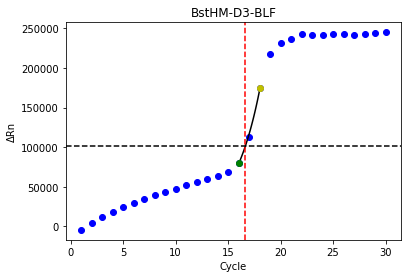

Ct value is: 16.631845196227456


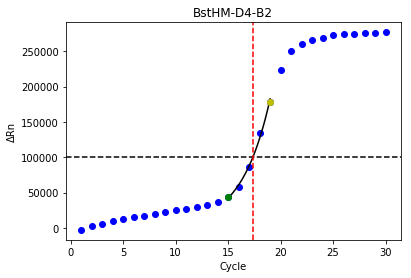

Ct value is: 17.37931149056052


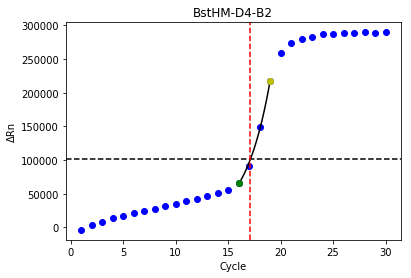

Ct value is: 17.114966678235866


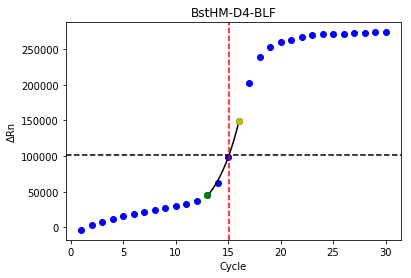

Ct value is: 15.072529392542016


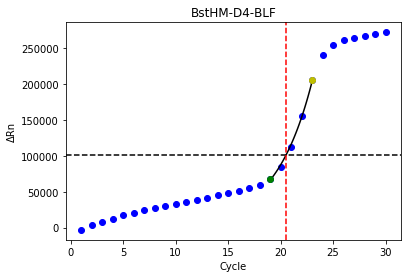

Ct value is: 20.506344529671694


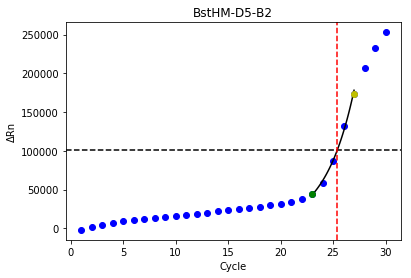

Ct value is: 25.39810955052911


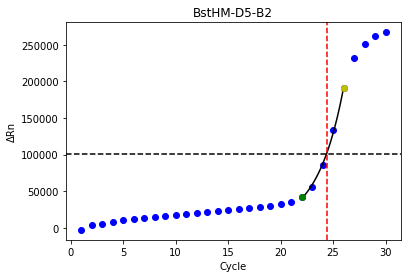

Ct value is: 24.376075188469436


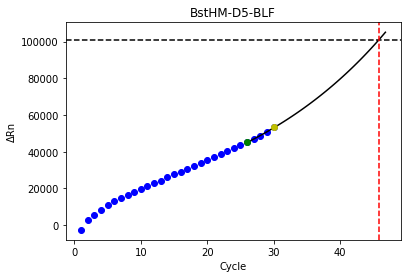

Ct value is: 45.8125825656303


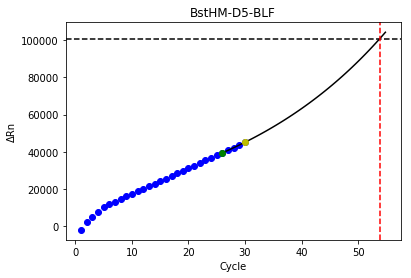

Ct value is: 53.835554158079596


[20.379597063080066,
 17.212169940101333,
 25.617905706153493,
 25.45223043536747,
 17.594325941833088,
 35.894455062007296,
 27.352804534398537,
 29.43152582620138,
 8.808473870541775,
 8.984192417040198,
 9.412003698409917,
 11.92286698017417,
 10.216379574940754,
 10.324118629169401,
 14.890618145800815,
 10.583091965177081,
 13.104683938569547,
 13.054806315017485,
 16.864636787960126,
 16.631845196227456,
 17.37931149056052,
 17.114966678235866,
 15.072529392542016,
 20.506344529671694,
 25.39810955052911,
 24.376075188469436,
 45.8125825656303,
 53.835554158079596]

In [44]:
thr_value = thr_lims[0]
rdm.explore_Ct(thr_value, data_sets[dataset_idx], function = rdm.f_10exp_lineal, fp_name=['a','b','N'], lp_name='Amplification response region')

if agree with the threshold value, then assign it to the *theshold* data_set attribute <br>
Also assign the Ct value as a parameter to each well.

In [45]:
thr_value = thr_lims[0]
# assign the threshold
data_sets[dataset_idx].threshold = thr_value

# assign the Ct values
for serie in data_sets[dataset_idx].series:
    well = serie.well
    rdm.assign_Ct(thr_value, well)


to determine the concentration:
<ol>
<li>assign the concentration to each BstHM</li> 
<li>fit a function</li>
<li>compute the reverse</li>
<li>compute the Bst2.0 and BstLF values</li>
</ol>

In [46]:
# Relation between name and concentration
name_concentration = {
    'BstHM-B2': 2.0,
    'BstHM-BLF':2.0,
    'D2' : 1.066666667,
    'D3' : 0.533333333,
    'D4' : 0.266666667,
    'D5' : 0.133333333
}

In [47]:
# assign the relation as a well parameter
for serie in data_sets[dataset_idx].series:
    well = serie.well
    for name in list(name_concentration.keys()):
        if name in well.s_name:
            
            concentration = name_concentration[name]
            print(well.s_name, 'is', concentration)
            setattr(well, 'Bst_concentration', concentration)

BstHM-B2 is 2.0
BstHM-B2 is 2.0
BstHM-BLF is 2.0
BstHM-BLF is 2.0
BstHM-D2-B2 is 1.066666667
BstHM-D2-B2 is 1.066666667
BstHM-D2-BLF is 1.066666667
BstHM-D2-BLF is 1.066666667
BstHM-D3-B2 is 0.533333333
BstHM-D3-B2 is 0.533333333
BstHM-D3-BLF is 0.533333333
BstHM-D3-BLF is 0.533333333
BstHM-D4-B2 is 0.266666667
BstHM-D4-B2 is 0.266666667
BstHM-D4-BLF is 0.266666667
BstHM-D4-BLF is 0.266666667
BstHM-D5-B2 is 0.133333333
BstHM-D5-B2 is 0.133333333
BstHM-D5-BLF is 0.133333333
BstHM-D5-BLF is 0.133333333


In [48]:
# select wells using AND logic
wells_HMB2=rdm.select_objects(wells, 's_name','BstHM')
wells_HMB2=rdm.select_objects(wells_HMB2, 's_name','B2')

# 1 create labels
label_wells = wells_HMB2
label_attr = ['s_name']  # list with the attribute names cathegories to use as well labels
labels, _, _ = rdm.get_attribute_labels(wells_HMB2 ,label_attr)

# 2 create cathegory objects, assign them to wells and create classification object 
classification_name = 'Rep3, BstHM in B2 well name classification'
classification = rdm.create_classification(label_wells, labels, classification_name)

20 objects were selected based on ['s_name'] attribute
10 objects were selected based on ['s_name'] attribute
non redundant list: 

0: 'BstHM-B2'
1: 'BstHM-D2-B2'
2: 'BstHM-D3-B2'
3: 'BstHM-D4-B2'
4: 'BstHM-D5-B2'

5 where created


wells in classification groups:

[ BstHM-B2 ] -->  ['C1', 'C2']
[ BstHM-D2-B2 ] -->  ['D1', 'D2']
[ BstHM-D3-B2 ] -->  ['E1', 'E2']
[ BstHM-D4-B2 ] -->  ['F1', 'F2']
[ BstHM-D5-B2 ] -->  ['G1', 'G2']


In [49]:
# create a parameter data serie
gs_clf = classification
ds_name = 'BstHM-B2, R3'
p_serie = rdm.param_data_serie(gs_clf, 'Ct', 'Bst_concentration', ds_name)
#(wells, yp_name, x_att_name ='Bst_concentration', ds_name, g_name)

In [50]:
## use a stored dataset to assign the data serie
d_bst_con = []
d_name = 'Bst concentration vs Ct'
for ds in database.elements['data_sets']:
    if ds.name == d_name:
        d_bst_con  = ds
        print(ds.__dict__)

{'name': 'Bst concentration vs Ct', 'group_names': ['BstLF', 'Bst2', 'BstHM'], 'wells': [], 'series': [<rt_module.rt_data_manage.Data_serie object at 0x000001A07B31ECC0>, <rt_module.rt_data_manage.Data_serie object at 0x000001A07B31ECF8>], 'x_name': 'BstLF concentration', 'y_name': 'Ct', 'x_units': '$\\mu g/ \\mu L$', 'y_units': '', 'y_max': 0, 'threshold': 91333.953125}


In [51]:
# assign the data serie
d_bst_con.series.append(p_serie)    # it modify the database.elements['data_sets'] too

In [52]:
# select wells using AND logic
wells_NE = rdm.select_objects(wells, 's_name',['BstHM','Bst2','BstLF','ND'], not_in = True)
#wells_NE=select_objects(wells_NE, 's_name','B2')

# 1 create labels
label_wells = wells_NE
label_attr = ['s_name']  # list with the attribute names cathegories to use as well labels
labels, _, _ = rdm.get_attribute_labels(label_wells ,label_attr)

# 2 create cathegory objects, assign them to wells and create classification object 
classification_name = 'Rep1, No Enzyme, well name classification'
classification = rdm.create_classification(label_wells, labels, classification_name)

4 objects were selected based on ['s_name'] attribute
non redundant list: 

0: 'B2'
1: 'BLF'

2 where created


wells in classification groups:

[ B2 ] -->  ['H1', 'H2']
[ BLF ] -->  ['H3', 'H4']


In [58]:
data_sets.append(rdm.create_dataset(classification))
#Amplification data BstLF Units, No Enzyme, R3

enter a name for the dataset: Amplification data BstLF Units, No Enzyme, R3
choose the data to use: 

[ 0 ] Amplification data

input the number: 0

" Amplification data " was selected

current series are: 

[ 0 ] Cycle
[ 1 ] ΔRn

choose x data index: 0

choose y data index: 1


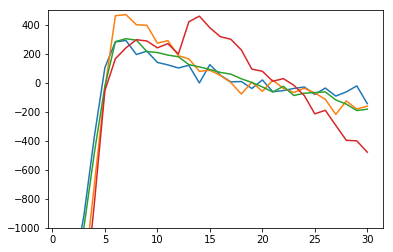

In [59]:
plt.figure()
for serie in data_sets[-1].series:
    x = serie.x
    y = serie.y
    plt.plot(x,y)
    plt.ylim(-1000,500)
    

In [60]:
## add all the new objects to the database
database.append_objs('wells', wells)
database.append_objs('classifications', classifications)
database.append_objs('data_sets', data_sets)
database.append_objs('figures', figures)

In [61]:
# update the database
database.save()


there is a previous version of " database_BstLF.pkl " file

do you want to update it? (y/n): y

file " database_BstLF.pkl " was updated


In [53]:
def select_objects(obj_list, att_name, att_values, not_in = False):
    """
    select the objects from obj_list which are "att_value" on attribute "att_name"
    if not_in  = True --> select the object which aren´t "att_value" on attribute "att_name"
    
    if att_value is list, then select the objects using OR logic over that att_values.
    
    if you want to select objects based on two att_names:
        - for AND logic selection, run this function with the second att_name 
          over the output list obtained with the first att_name 
        - for OR logic selection, run the function for each att_name over the 
          well_list. Then use nr_list function over them.
    
    well_list = list of well objects
    att_name = attribute name to select the wells
    att_values = attibute values to select the wells
    not_in = Boolean
        to perform positive or negative selection
    
    """    
    if type(att_name) != list:
        att_name = [att_name]
    
    if type(att_values) != list:
        att_values = [att_values]
    
    selected_objs = []
    for obj in obj_list:
        obj_value = obj.get_attrs(att_name)[0]
        
        if not_in == False:

            for att_value in att_values:
                if att_value in obj_value:      # if att_value is part or equal to obj_value
                    selected_objs.append(obj)
        else:
            select = True
            for att_value in att_values:
                if att_value in obj_value:   # if any att_value is part or equal to obj_value
                    select = False           # --> not select the object
                    
            if select == True:
                selected_objs.append(obj)
    
    print(str(len(selected_objs)),'objects were selected based on',str(att_name),'attribute')
    
    return(selected_objs)

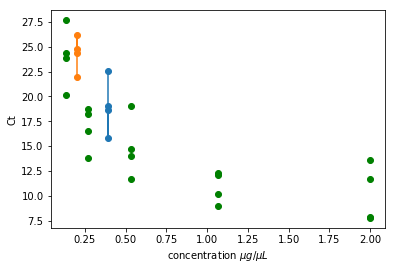

In [111]:
plot_parameter(data_sets[dataset_idx], 'Ct', ['Bst2', 'BstLF'], [0.39,0.2], x_att_name ='Bst_concentration')

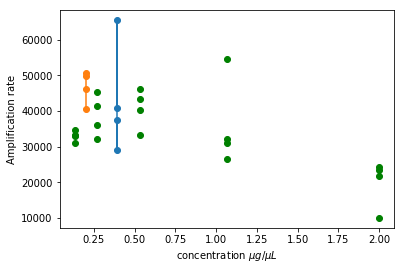

In [128]:
plot_parameter(data_sets[dataset_idx], 'Amplification rate', ['Bst2', 'BstLF'], [0.39,0.2], x_att_name ='Bst_concentration')

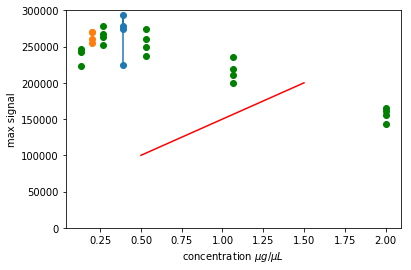

In [133]:
plot_parameter(data_sets[dataset_idx], 'max signal', ['Bst2', 'BstLF'], [0.39,0.2], x_att_name ='Bst_concentration')
plt.gca().set_ylim(0, 300000)
plt.gca().plot([0.5,1.5],[100000, 200000], '-r')

In [134]:
# select wells using AND logic
wells_HMB2=select_objects(wells, 's_name','BstHM')
wells_HMB2=select_objects(wells_HMB2, 's_name','B2')

# 1 create labels
label_wells = wells_HMB2
label_attr = ['s_name']  # list with the attribute names cathegories to use as well labels
labels, _, _ = get_attribute_labels(wells_HMB2 ,label_attr)

# 2 create cathegory objects, assign them to wells and create classification object 
classification_name = 'Rep1, BstHM in B2 well name classification'
classification = create_classification(label_wells, labels, classification_name)

20 objects were selected based on s_name attribute
10 objects were selected based on s_name attribute
non redundant list: 

0: 'BstHM-B2'
1: 'BstHM-D2-B2'
2: 'BstHM-D3-B2'
3: 'BstHM-D4-B2'
4: 'BstHM-D5-B2'

5 where created


wells in classification groups:

[ BstHM-B2 ] -->  ['C1', 'C2']
[ BstHM-D2-B2 ] -->  ['D1', 'D2']
[ BstHM-D3-B2 ] -->  ['E1', 'E2']
[ BstHM-D4-B2 ] -->  ['F1', 'F2']
[ BstHM-D5-B2 ] -->  ['G1', 'G2']


In [141]:
# Create concentration vs Ct dataset
d_name = 'Bst concentration vs Ct'
d_groups = ['BstLF','Bst2','BstHM']
d_wells = []
d_series = []
d_x_name = 'BstLF concentration'
d_y_name = 'Ct'
d_x_units = '$\mu g/ \mu L$'

data_sets.append(Data_set(d_name, d_groups, d_wells, d_series, d_x_name, d_y_name, d_x_units, y_units='', y_max=0, threshold=thr_value))

In [42]:
# create and assign a parameter data serie
gs_clf = classification
ds_name = 'BstHM-B2'
p_serie = param_data_serie(gs_clf, 'Ct', 'Bst_concentration', ds_name)
#(wells, yp_name, x_att_name ='Bst_concentration', ds_name, g_name)

data_sets[-1].series.append(p_serie)

NameError: name 'Data_serie' is not defined

In [171]:
data_sets[-1].series[0].__dict__

{'group': ['BstHM-B2',
  'BstHM-D2-B2',
  'BstHM-D3-B2',
  'BstHM-D4-B2',
  'BstHM-D5-B2'],
 'name': 'BstHM-B2',
 'well': [<__main__.Well at 0x186bdc2e6d8>,
 'well_id': [['C1', 'Bst_Units_1_data.xlsx'],
  ['C2', 'Bst_Units_1_data.xlsx'],
  ['D1', 'Bst_Units_1_data.xlsx'],
  ['D2', 'Bst_Units_1_data.xlsx'],
  ['E1', 'Bst_Units_1_data.xlsx'],
  ['E2', 'Bst_Units_1_data.xlsx'],
  ['F1', 'Bst_Units_1_data.xlsx'],
  ['F2', 'Bst_Units_1_data.xlsx'],
  ['G1', 'Bst_Units_1_data.xlsx'],
  ['G2', 'Bst_Units_1_data.xlsx']],
 'x': [2.0,
  2.0,
  1.066666667,
  1.066666667,
  0.533333333,
  0.533333333,
  0.266666667,
  0.266666667,
  0.133333333,
  0.133333333],
 'y': [7.840417094524441,
  7.7828348192175705,
  8.976009825620014,
  10.187011227311606,
  11.69858120777075,
  13.967375420153257,
  13.772977346107417,
  18.245725995092474,
  24.39898623167684,
  23.82158100447245]}

fitted <function f_reciprocal at 0x00000186BFD2F158> parameter values [4.24391331 0.72982168 5.48417601]


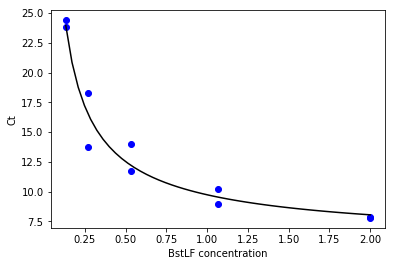

In [212]:
dser_num = 0  # number of the Data_serie to be used
p_fit = fit_concentration(data_sets[-1],dser_num)

fitted <function f_exp_rec at 0x00000186BE4E49D8> parameter values [25.560866   58.57987334  8.72026885]


array([25.560866  , 58.57987334,  8.72026885])

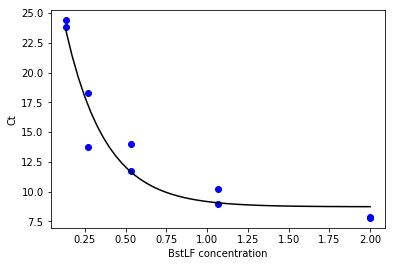

In [213]:
dser_num = 0
fit_concentration(data_sets[-1],dser_num, function=f_exp_rec)


It seem it behaves like reciprocal and not like exponential.<br>
Now, left to compute the bst2 concentration value with the fitted function and assign it to them. <br>
Then perform the same with the other series and compute the mean.

In [211]:
def fit_concentration(d_set,d_serie_num, function=f_reciprocal):
    
    serie = d_set.series[d_serie_num]
    x = serie.x
    y = serie.y
    
    x_fx, p_fit = function_fit(x, y,init = 0, func = function, p_start= [1,2,0], 
                         param_bounds=([0,0.1,0],[np.inf,np.inf,np.inf]), display = False)
    
    x_fit = np.linspace(x[0],x[-1])
    y_fit = function(x_fit, p_fit[0],p_fit[1],p_fit[2])
    
    plt.figure()
    plt.plot(x,y,'bo', label = serie.name)
    plt.plot(x_fit,y_fit, 'k-', label = 'fitting')
    plt.xlabel(d_set.x_name)
    plt.ylabel(d_set.y_name)
    
    return(p_fit)

In [43]:
def param_data_serie(clf, yp_name, x_att_name, ds_name):
    #(wells, yp_name, x_att_name ='Bst_concentration', ds_name):
    """
    clf: classification object
        classification object to be used 
    
    yp_name : str
        name of the parameter (from "well.analysis") to be used in the y axys 
   
    x_att_name: str
        well attribute name to be used in the x axys
        
    ds_name : dataset name
    
    
    """
    x_list = list()
    y_list = list()
    
    for well in clf.wells:
        
        for param in well.analysis:
                if param.name == yp_name:
                    
                    y = param.value
                    break

        
        x = getattr(well, x_att_name)
            
        x_list.append(x)
        y_list.append(y)
        
    
    g_names = list(clf.groups.keys())
    
    data_serie = rdm.Data_serie(x_list, y_list, ds_name, g_names, clf.wells, clf.wells_id)
    return(data_serie)
    

Super!! <br>
ahora lo que hay que hacer es ajustar una función para cada uno de estos tres, y en cada caso ver que pasa si se agrupan por buffer --> 3 ajustes por cada parametro (buffer B2, Buffer BstLF y sin distinguir).
con eso se puede calcular la función inversa y el valor apropiado de concentración asociado.
luego se obtiene el optimo tbn.
repetir esto para los otros set de datos y luego promediar.


In [189]:
def f_reciprocal(x, a, b, c):
    """
    compute the reciprocal function value with given parameters
    
    Parameters
    ----------
        x: int or vector
            independent variable values
                
        a: double
            numerator parameter
        
        b: double
           exponent parameter. b = [1, inf]
        
        c: double
           y asymptotic parameter
           
        
    Returns
    -------
        evaluated reciprocal function with the given parameters for the given x
    """
    fx = a*(x**(-b))+c
    
    return(fx)

In [198]:
def f_exp_rec(x, a, b, c):
    """
    compute the exponential reciprocal function value with given parameters
    
    Parameters
    ----------
        x: int or vector
            independent variable values
                
        a: double
            numerator parameter
        
        b: double
           denominator parameter. b = [1, inf]
        
        c: double
           y asymptotic parameter
           
        
    Returns
    -------
        evaluated reciprocal function with the given parameters for the given x
    """
    fx = a/(b**(x))+c
    
    return(fx)

In [ ]:
def plot_param_ds(data_serie, p_marker):
    """
    
    data_serie: Data_serie object
    
    
    p_marker: plot marker to be used
    
    
    """
    plt.plot(data_serie.x, data_serie.y, p_marker)
    plt.xlabel('concentration $\mu g/ \mu L$')
    plt.ylabel(param_name)#('C$_t$')
    #return(fig,ax)

In [127]:
def plot_parameter(data_set, param_name, other_g, x_aux, x_att_name ='Bst_concentration'):
   #plot_parameter(data_sets[dataset_idx], param_name, ['Bst2', 'BstLF'], [0.39,0.2], x_att_name ='Bst_concentration')
    """
    
    param_name : str
        name of the parameter to be used in the y axys
   
    x_att_name: str
        well attribute name to be used in the x axys
        
    other_g: list
        names (or parts os the name) of other groups to be included
        e.g. ['Bst2', 'BstLF']
        
    x_aux: list
        list with the x value of each other_group.
    
    
    """

    x_list = []
    y_list = []
    
    x_other = {}
    y_other = {}
    for name in other_g:
        x_other[name] = list()
        y_other[name] = list()
    
    for serie in data_set.series:
        well = serie.well

        for param in well.analysis:
                if param.name == param_name:
                    
                    if type(param.value) == list:
                        p_value = param.value[1]   #take the "original" value
                        break
                    
                    else:
                        p_value = param.value
                        break

        
        if x_att_name in list(well.__dict__):

            x = getattr(well, x_att_name)
                        
            x_list.append(x)
            y_list.append(p_value)
            
        else:
            
            for i in range(0, len(other_g)):
                if other_g[i] in well.s_name:
                    y_other[other_g[i]].append(p_value)
                    x_other[other_g[i]].append(x_aux[i])



    fig, ax = plt.figure()
    plt.plot(x_list,y_list, 'go')
    for name in other_g:
        plt.plot(x_other[name], y_other[name], marker = 'o')
    plt.xlabel('concentration $\mu g/ \mu L$')
    plt.ylabel(param_name)#('C$_t$')
    #return(fig,ax)

In [613]:
a = [param.name for param in data_sets[dataset_idx].series[0].well.analysis]
print(a)

['Amplification response region', 'Amplification rate', 'max signal', ['a', 'b', 'N'], 'Ct']


In [663]:
database.__dict__

{'description': 'this database include experiments and analysis performed around home made BstLF home made production and testing on RT-LAMP COVID detection',
 'elements': {'classifications': [<__main__.Classification at 0x1815f0ebc88>],
  'data_sets': [<__main__.Data_set at 0x18162716dd8>],
  'figures': [<__main__.Figure at 0x18160dfef60>,
  'wells': [<__main__.Well at 0x1815e6389b0>,
   <__main__.Well at 0x1815ecf10f0>]},
 'filename': 'database_BstLF',
 'folder': 'Real_time_data/Database/',
 'list_names': ['wells', 'classifications', 'data_sets', 'figures'],
 'name': 'BstLF COVID experiments'}

In [214]:
database.elements['wells'] = wells
database.elements['classifications'] = classifications
database.elements['data_sets'] = data_sets
database.elements['figures'] = figures
save_database(database)


there is a previous version of " database_BstLF.pkl " file

do you want to update it? (y/n): y

file " database_BstLF.pkl " was updated
